# Etape 0 : Charger des bibliothèques


In [2]:
# Importation et installation des bibliothèques nécessaires pour le projet scoring

# Bibliothèques pour la manipulation des données et les visualisations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Outils de modélisation et de sélection des caractéristiques
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.feature_selection import chi2, SelectKBest, SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
!pip install catboost
import catboost as cb

# Outils pour la normalisation, l'imputation, et la gestion des valeurs manquantes
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.compose import ColumnTransformer
import missingno as msno

# Outils pour les métriques et l'évaluation de la performance du modèle
from sklearn.metrics import recall_score, precision_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, f1_score
from sklearn.metrics import make_scorer, roc_auc_score
from imblearn.over_sampling import SMOTE  # Importation de SMOTE pour le traitement du déséquilibre des classes
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # Utilisation de ImbPipeline pour gérer les étapes du pipeline avec SMOTE
from xgboost import plot_importance

# Outils avancés pour le traitement et l'optimisation des modèles
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency, pointbiserialr

# Autres outils supplémentaires
import shap  # Bibliothèque pour l'interprétation des modèles
import time  # Mesure du temps d'exécution des processus
from joblib import Memory  # Utilisé pour la mise en cache
from IPython.display import display  # Pour afficher des résultats dans les notebooks

# Installations nécessaires
!pip install imbalanced-learn
!pip install openpyxl
!pip install optuna

# Outils Google Colab et fichiers
from google.colab import files

# Installation et configuration de LazyPredict pour simplifier les comparaisons de modèles
!pip install git+https://github.com/shankarpandala/lazypredict.git@master
import lazypredict
# Ouvrir le code source de LazyPredict pour corriger le bug mis à jour en sparse_output=False
!sed -i 's/sparse=False/sparse_output=False/g' /usr/local/lib/python3.10/dist-packages/lazypredict/Supervised.py
from lazypredict.Supervised import LazyClassifier

# Report pour le dataset
!pip install ydata_profiling
from ydata_profiling import ProfileReport

# Targetencoding
!pip install category_encoders
import category_encoders as ce


from category_encoders import TargetEncoder

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.8 MB/s eta 0:00:00
  Cloning https://github.com/shankarpandala/lazypredict.git (to revision master) to /tmp/pip-req-build-jxnwn3oh
  Running command git clone --filter=blob:none --quiet https://github.com/shankarpandala/lazypredict.git /tmp/pip-req-build-jxnwn3oh
  Running command git checkout -b master --track origin/master
  Switched to a new branch 'master'
  Branch 'master' set up to track remote branch 'master' from 'origin'.
  Resolved https://github.com/shankarpandala/lazypredict.git to commit 81c27db709ec5a339d8e2467dbb8a4a8652d3967
  Preparing metadata (setup.py) ... done
  Using cached pytest_runner-6.0.1-py3-none-any.whl.metadata (7.3 kB)
Using cached pytest_runner-6.0.1-py3-none-a


# Etape 1 : Télécharger les fichiers train et test

## Fichiers train.csv

### df - train_participants

In [3]:
# Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')  # Montez le Drive pour accéder aux fichiers

# Spécifiez le chemin du fichier dans votre Drive
file_path = '/content/drive/My Drive/Colab Notebooks/Data/train_participants.csv' # Remplacez 'folder_name' par le nom du dossier où se trouve le fichier

# Charger le fichier CSV depuis le Drive
import pandas as pd
df = pd.read_csv(file_path)  # Chargez le fichier CSV
print(df.head())  # Affichez les premières lignes du fichier

Mounted at /content/drive
  participant_id session  sex   age      diagnosis             study   site  \
0        CH7098a      V1 0.00 20.00  schizophrenia  SCHIZCONNECT-VIP     NU   
1      A00024535      V1 0.00 26.00        control  SCHIZCONNECT-VIP    MRN   
2         CC7563      V1 1.00 28.00        control  SCHIZCONNECT-VIP  WUSTL   
3         CC3945      V1 1.00 21.00        control  SCHIZCONNECT-VIP  WUSTL   
4        CH8853b      V1 1.00 21.00        control  SCHIZCONNECT-VIP     NU   

      TIV  CSF_Vol  GM_Vol  WM_Vol  
0 1712.36   375.53  747.09  586.39  
1 1700.60   399.49  721.13  579.45  
2 1449.33   220.83  661.03  566.50  
3 1184.70   201.58  560.05  423.02  
4 1518.20   291.54  705.38  520.81  


### df_rois - train_rois

In [4]:
# Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')  # Montez le Drive pour accéder aux fichiers

# Spécifiez le chemin du fichier dans votre Drive
file_path = '/content/drive/My Drive/Colab Notebooks/Data/train_rois.csv' # Remplacez 'folder_name' par le nom du dossier où se trouve le fichier

# Charger le fichier CSV depuis le Drive
import pandas as pd
df_rois = pd.read_csv(file_path)  # Chargez le fichier CSV
print(df_rois.head())  # Affichez les premières lignes du fichier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  participant_id session  run     TIV  CSF_Vol  GM_Vol  WM_Vol  \
0        CH7098a      V1    1 1712.36   375.53  747.09  586.39   
1      A00024535      V1    1 1700.60   399.49  721.13  579.45   
2         CC7563      V1    1 1449.33   220.83  661.03  566.50   
3         CC3945      V1    1 1184.70   201.58  560.05  423.02   
4        CH8853b      V1    1 1518.20   291.54  705.38  520.81   

   l3thVen_GM_Vol  r3thVen_GM_Vol  l4thVen_GM_Vol  ...  lSupParLo_CSF_Vol  \
0            0.06            0.06            0.06  ...               7.49   
1            0.05            0.04            0.05  ...               9.02   
2            0.12            0.09            0.07  ...               4.22   
3            0.10            0.08            0.04  ...               3.68   
4            0.07            0.07            0.05  ...               7.23   

   rSupParL

### df_vbm - train_vbm

In [5]:
# Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')  # Montez le Drive pour accéder aux fichiers

# Spécifiez le chemin du fichier dans votre Drive
file_path = '/content/drive/My Drive/Colab Notebooks/Data/train_vbm.npz'  # Remplacez 'folder_name' par le nom du dossier où se trouve le fichier

# Charger le fichier corrigé
df_vbm = np.load(file_path, allow_pickle=True)

# Afficher les noms et les shapes des arrays
print("Les arrays (tableaux) disponibles dans le fichier .npz avec leur shape :")
for key in df_vbm.keys():
    print(f"{key}: shape = {df_vbm[key].shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Les arrays (tableaux) disponibles dans le fichier .npz avec leur shape :
imgs_arr: shape = (410, 1, 121, 145, 121)
mask_arr: shape = (121, 145, 121)
affine: shape = (4, 4)
participant_id: shape = (410,)


## Fichiers test.csv

### test_participants

In [6]:
# Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')  # Montez le Drive pour accéder aux fichiers

# Spécifiez le chemin du fichier dans votre Drive
file_path = '/content/drive/My Drive/Colab Notebooks/Data/test_participants.csv' # Remplacez 'folder_name' par le nom du dossier où se trouve le fichier

# Charger le fichier CSV depuis le Drive
import pandas as pd
test = pd.read_csv(file_path)  # Chargez le fichier CSV
print(test.head())  # Affichez les premières lignes du fichier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  participant_id session  sex   age      diagnosis             study   site  \
0         NM4153      V1 1.00 27.00  schizophrenia  SCHIZCONNECT-VIP  WUSTL   
1         NM5747      V1 1.00 51.00  schizophrenia  SCHIZCONNECT-VIP  WUSTL   
2         CC2199      V1 0.00 17.00  schizophrenia  SCHIZCONNECT-VIP  WUSTL   
3        CH8004a      V1 1.00 36.00        control  SCHIZCONNECT-VIP     NU   
4         NM6683      V1 1.00 31.00  schizophrenia  SCHIZCONNECT-VIP  WUSTL   

      TIV  CSF_Vol  GM_Vol  WM_Vol  
0 1226.46   228.02  558.66  439.13  
1 1179.78   268.75  467.45  442.87  
2 1553.70   236.75  743.35  572.85  
3 1103.63   208.79  503.24  391.21  
4 1330.94   280.11  594.43  455.57  


### test_rois

In [7]:
# Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')  # Montez le Drive pour accéder aux fichiers

# Spécifiez le chemin du fichier dans votre Drive
file_path = '/content/drive/My Drive/Colab Notebooks/Data/test_rois.csv' # Remplacez 'folder_name' par le nom du dossier où se trouve le fichier

# Charger le fichier CSV depuis le Drive
import pandas as pd
test_rois = pd.read_csv(file_path)  # Chargez le fichier CSV
print(test_rois.head())  # Affichez les premières lignes du fichier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  participant_id session  run     TIV  CSF_Vol  GM_Vol  WM_Vol  \
0         NM4153      V1    1 1226.46   228.02  558.66  439.13   
1         NM5747      V1    1 1179.78   268.75  467.45  442.87   
2         CC2199      V1    1 1553.70   236.75  743.35  572.85   
3        CH8004a      V1    1 1103.63   208.79  503.24  391.21   
4         NM6683      V1    1 1330.94   280.11  594.43  455.57   

   l3thVen_GM_Vol  r3thVen_GM_Vol  l4thVen_GM_Vol  ...  lSupParLo_CSF_Vol  \
0            0.05            0.04            0.05  ...               3.52   
1            0.06            0.05            0.05  ...               5.54   
2            0.08            0.07            0.06  ...               3.55   
3            0.06            0.05            0.05  ...               5.55   
4            0.09            0.07            0.05  ...               6.82   

   rSupParL

## Concaténer les fichiers

### df & df_rois - test & test_rois

In [10]:
df.shape
df.columns

Index(['participant_id', 'session', 'sex', 'age', 'diagnosis', 'study', 'site',
       'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol'],
      dtype='object')

In [11]:
df_rois.shape
df_rois.columns

Index(['participant_id', 'session', 'run', 'TIV', 'CSF_Vol', 'GM_Vol',
       'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=291)

In [8]:
# Remplacer les valeurs dans la feature cible
df['diagnosis'] = df['diagnosis'].replace({'control': 0, 'schizophrenia': 1})
print("Valeurs uniques de la colonne 'diagnosis' après encodage dans df:", df['diagnosis'].unique())

# Fusionner deux dataframes par 'participant_id'
# Priorité aux colonnes de df_rois en cas de doublons
df_merged_rois = pd.merge(df, df_rois, on='participant_id', how='inner', suffixes=('_df', ''))

# Supprimer les doublons de colonnes en gardant celles de df_rois
# On garde uniquement les colonnes qui ne proviennent pas de df (suffixe '_df' supprimé)
df_merged_rois = df_merged_rois.loc[:, ~df_merged_rois.columns.str.endswith('_df')]

# # Afficher les premières lignes pour vérifier le résultat
# print(df_merged_rois.head())

# Vérifier la taille et les colonnes du dataframe fusionné
print("Shape du dataframe fusionné :", df_merged_rois.shape)
print("Colonnes du dataframe fusionné :", df_merged_rois.columns.tolist())
print("Valeurs uniques de la colonne 'diagnosis' après encodage dans df_merged_rois:", df_merged_rois['diagnosis'].unique())

###########################################################################
# Remplacer les valeurs dans la feature cible
test['diagnosis'] = test['diagnosis'].replace({'control': 0, 'schizophrenia': 1})
print("Valeurs uniques de la colonne 'diagnosis' après encodage dans test:", test['diagnosis'].unique())

# Fusionner deux dataframes par 'participant_id'
# Priorité aux colonnes de test_rois en cas de doublons
test_merged_rois = pd.merge(test, test_rois, on='participant_id', how='inner', suffixes=('_test', ''))

# Supprimer les doublons de colonnes en gardant celles de test_rois
# On garde uniquement les colonnes qui ne proviennent pas de test (suffixe '_test' supprimé)
test_merged_rois = test_merged_rois.loc[:, ~test_merged_rois.columns.str.endswith('_test')]

# # Afficher les premières lignes pour vérifier le résultat
# print(test_merged_rois.head())

# Vérifier la taille et les colonnes du dataframe fusionné
print("Shape du dataframe fusionné :", test_merged_rois.shape)
print("Colonnes du dataframe fusionné :", test_merged_rois.columns.tolist())
print("Valeurs uniques de la colonne 'diagnosis' après encodage dans test_merged_rois:", test_merged_rois['diagnosis'].unique())

Valeurs uniques de la colonne 'diagnosis' après encodage dans df: [1 0]
Shape du dataframe fusionné : (410, 296)
Colonnes du dataframe fusionné : ['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session', 'run', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_GM_Vol', 'rThaPro_GM_Vol', 'lVenVen_GM_Vol', 'rVenVen_GM_Vol', 'lOC_GM_Vol', 'rOC_GM_Vol', 'lCbeLoCbe1-5_GM_Vol', 'rCbeLoCbe1-5_GM_Vol', 'lCbeLoCbe6-7_GM_Vol', 'rCbeLoCbe6-7_GM_Vol', 'lCbeLoCbe8-10_GM_Vol', 'rCbeLoCbe8-10_GM_Vol', '

### 3 dfs

# Etape 2 : EDA

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("report.html")
# Download the report as an HTML file
files.download("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Identifier des colonnes dans df

In [ ]:
# Replace 'diagnosis' column to 0 and 1
df['diagnosis'] = df['diagnosis'].replace({'control': 0, 'schizophrenia': 1})

# Features and target selection
X = df[['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'site']]
y = df['diagnosis']

In [ ]:
def categorize_features(df, X):
    """
    Categorize features into numerical and categorical based on their data types.

    Args:
        df (pd.DataFrame): The input dataframe.
        X (pd.DataFrame): Subset of dataframe to analyze.

    Returns:
        dict: A dictionary containing two keys:
            - 'numerical_features': List of numerical feature columns.
            - 'categorical_features': List of categorical feature columns.
    """
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    return {
        'numerical_features': numerical_features,
        'categorical_features': categorical_features
    }

# Apply the function to the dataset
X = df[['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'site']]
feature_categories = categorize_features(df, X)
feature_categories

{'numerical_features': ['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol'],
 'categorical_features': ['site']}

## Matrices de corrélation

### df

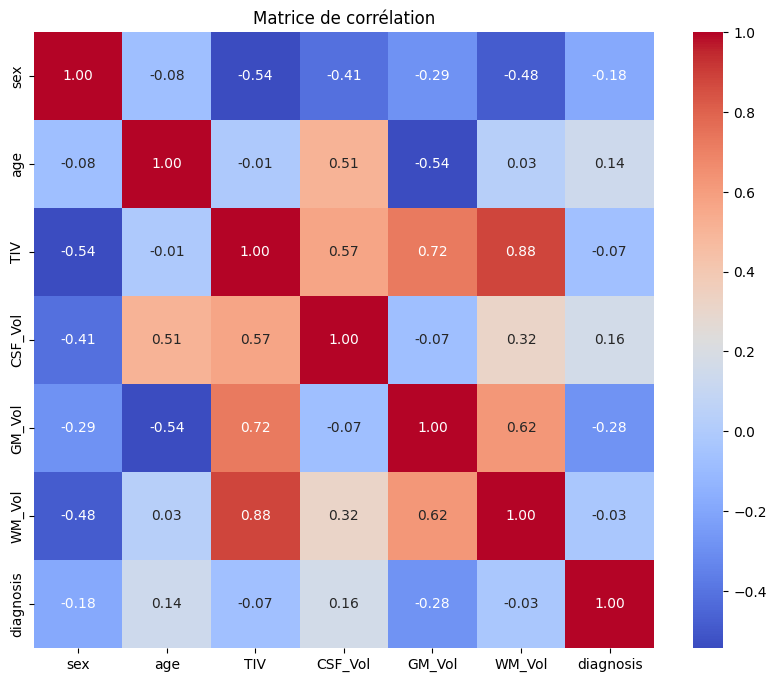

In [ ]:
# Features and target selection
X = df[['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'site']]
y = df['diagnosis']

numerical_features = ['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']
categorical_features = ['site']

# Utiliser le coefficient de corrélation de Pearson
correlation_matrix = df[numerical_features + ['diagnosis']].corr()

# Tracer une heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

### df_merged_rois

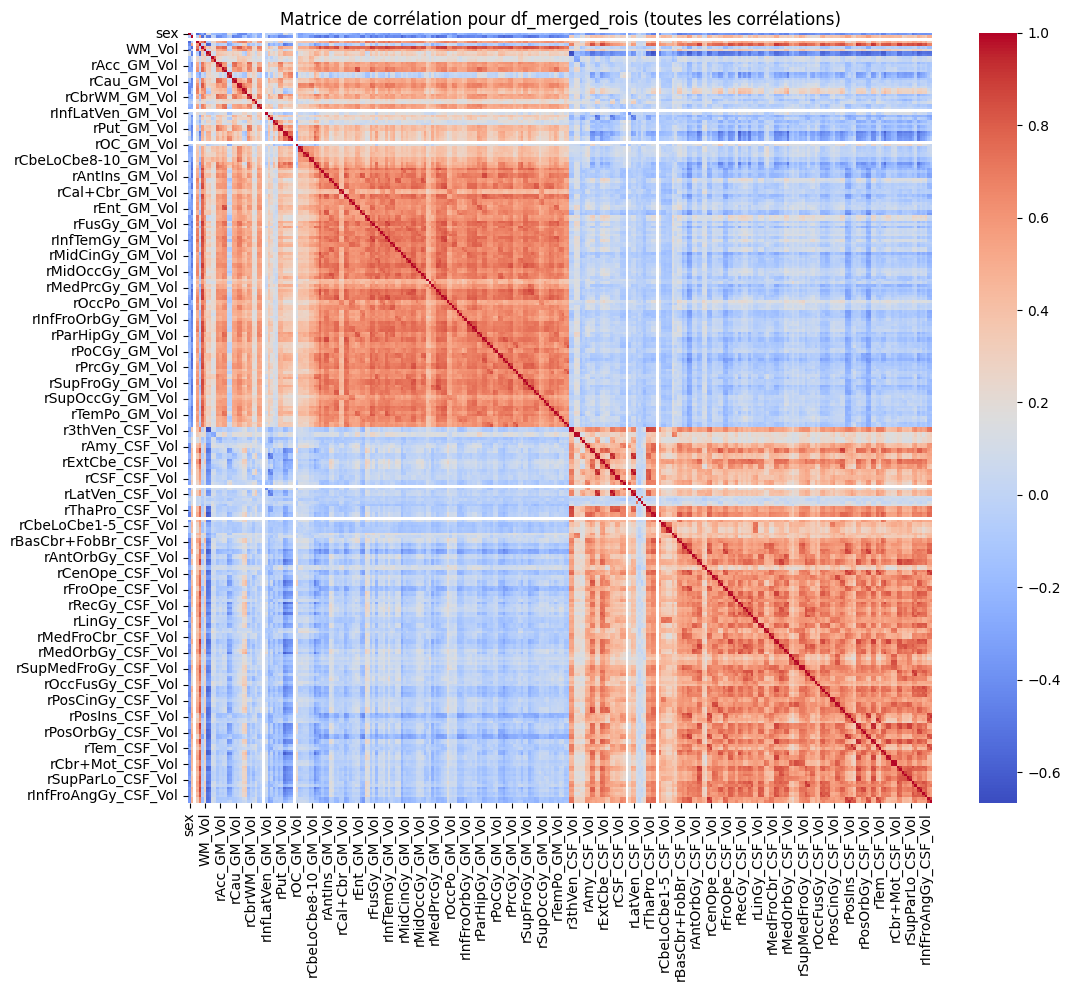

In [22]:
# Supprimer les colonnes non nécessaires
df_merged_rois_cleaned = df_merged_rois.drop(columns=['participant_id', 'session', 'run', 'study', 'site'])

# Sélectionner toutes les colonnes restantes qui sont numériques
numerical_features_rois = df_merged_rois_cleaned.columns.tolist()  # Toutes les colonnes restantes

# Calculer la matrice de corrélation
correlation_matrix_rois = df_merged_rois_cleaned.corr()

# Tracer une heatmap sans masquer les valeurs
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_rois, cmap='coolwarm', cbar=True)
plt.title('Matrice de corrélation pour df_merged_rois (toutes les corrélations)')
plt.show()

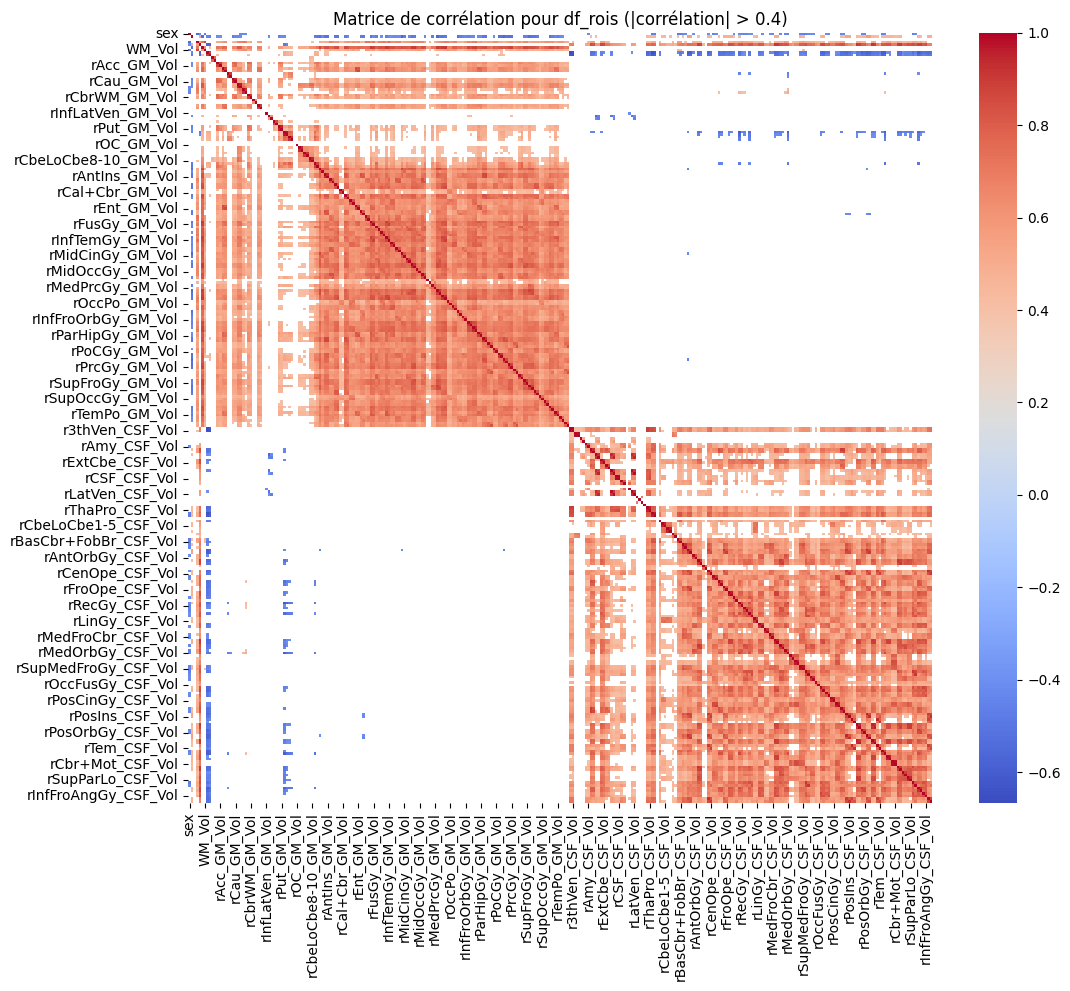

In [24]:
# Supprimer les colonnes non nécessaires
df_merged_rois_cleaned = df_merged_rois.drop(columns=['participant_id', 'session', 'run', 'study', 'site'])

# Sélectionner toutes les colonnes restantes qui sont numériques
numerical_features_rois = df_merged_rois_cleaned.columns.tolist()  # Toutes les colonnes restantes

# Calculer la matrice de corrélation
correlation_matrix_rois = df_merged_rois_cleaned.corr()

# Appliquer un masque pour masquer les valeurs |corrélation| < 0.4
mask = np.abs(correlation_matrix_rois) < 0.4  # Mask pour cacher |corr| < 0.4

# Tracer une heatmap avec le masque, sans afficher les annotations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_rois, mask=mask, cmap='coolwarm', cbar=True)
plt.title('Matrice de corrélation pour df_merged_rois (|corrélation| > 0.4)')
plt.show()

In [29]:
# Supprimer les colonnes non nécessaires
df_merged_rois_cleaned = df_merged_rois.drop(columns=['participant_id', 'session', 'run', 'study', 'site'])

# Calculer la matrice de corrélation
correlation_matrix_rois = df_merged_rois_cleaned.corr()

# Filtrer les valeurs avec |corrélation| > 0.5
# On crée un DataFrame à partir de la matrice de corrélation
correlation_df = correlation_matrix_rois.stack().reset_index()
correlation_df.columns = ['Variable_1', 'Variable_2', 'Correlation']

# Éviter les doublons A-B et B-A
correlation_df['pair'] = correlation_df.apply(lambda row: tuple(sorted([row['Variable_1'], row['Variable_2']])), axis=1)
correlation_df = correlation_df.drop_duplicates(subset='pair').drop(columns='pair')

# Garder les valeurs avec |corr| > 0.5 et exclure les auto-corrélations (x avec x)
filtered_correlation = correlation_df[
    (np.abs(correlation_df['Correlation']) > 0.5) &  # Garder les corrélations |corr| > 0.5
    (correlation_df['Variable_1'] != correlation_df['Variable_2'])  # Exclure les auto-corrélations
]

# Trier par Variable_1 (alphabetiquement) puis par Variable_2
sorted_correlation = filtered_correlation.sort_values(by=['Variable_1', 'Variable_2'])

# Configurer Pandas pour afficher toutes les lignes
pd.set_option('display.max_rows', None)  # Aucun troncage pour les lignes
pd.set_option('display.max_columns', None)  # Aucun troncage pour les colonnes
pd.set_option('display.width', None)  # Pas de limite pour la largeur

# Afficher la liste des variables et corrélations
print("Liste des corrélations significatives (|corrélation| > 0.5):")
print(sorted_correlation)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
15872          rAngGy_GM_Vol    lInfFroAngGy_GM_Vol         0.66
15832          rAngGy_GM_Vol       lInfFroGy_GM_Vol         0.66
15834          rAngGy_GM_Vol    lInfFroOrbGy_GM_Vol         0.59
15802          rAngGy_GM_Vol       lInfOccGy_GM_Vol         0.79
15804          rAngGy_GM_Vol       lInfTemGy_GM_Vol         0.77
15808          rAngGy_GM_Vol       lLatOrbGy_GM_Vol         0.69
15806          rAngGy_GM_Vol          lLinGy_GM_Vol         0.68
15812          rAngGy_GM_Vol      lMedFroCbr_GM_Vol         0.67
15818          rAngGy_GM_Vol       lMedOrbGy_GM_Vol         0.73
15820          rAngGy_GM_Vol       lMedPoCGy_GM_Vol         0.50
15822          rAngGy_GM_Vol       lMedPrcGy_GM_Vol         0.60
15810          rAngGy_GM_Vol       lMidCinGy_GM_Vol         0.72
15814          rAngGy_GM_Vol       lMidFroGy_GM_Vol         0.79
15816          rAngGy_GM_Vol       lMidOccGy_GM_Vol         0.78
15826          rAngGy_GM_Vol     

In [60]:
# Supprimer les colonnes non nécessaires
df_merged_rois_cleaned = df_merged_rois.drop(columns=['participant_id', 'session', 'run', 'study', 'site'])

# Calculer la matrice de corrélation
correlation_matrix_rois = df_merged_rois_cleaned.corr()

# Filtrer les valeurs avec |corrélation| > 0.5
# On crée un DataFrame à partir de la matrice de corrélation
correlation_df = correlation_matrix_rois.stack().reset_index()
correlation_df.columns = ['Variable_1', 'Variable_2', 'Correlation']

# Éviter les doublons A-B et B-A
correlation_df['pair'] = correlation_df.apply(lambda row: tuple(sorted([row['Variable_1'], row['Variable_2']])), axis=1)
correlation_df = correlation_df.drop_duplicates(subset='pair').drop(columns='pair')

# Garder les valeurs avec |corr| > 0.5 et exclure les auto-corrélations (x avec x)
filtered_correlation = correlation_df[
    (np.abs(correlation_df['Correlation']) > 0.5) &  # Garder les corrélations |corr| > 0.5
    (correlation_df['Variable_1'] != correlation_df['Variable_2'])  # Exclure les auto-corrélations
]

# Ajouter deux colonnes pour afficher les corrélations avec la variable cible 'diagnosis'
filtered_correlation['Correlation_V1_Diagnosis'] = filtered_correlation['Variable_1'].apply(
    lambda var: correlation_matrix_rois.loc[var, 'diagnosis'] if var in correlation_matrix_rois.index else np.nan
)
filtered_correlation['Correlation_V2_Diagnosis'] = filtered_correlation['Variable_2'].apply(
    lambda var: correlation_matrix_rois.loc[var, 'diagnosis'] if var in correlation_matrix_rois.index else np.nan
)

# Afficher le DataFrame avec les colonnes ajoutées
print("Liste des corrélations significatives (|corrélation| > 0.5) avec corrélations avec 'diagnosis' :")
print(filtered_correlation[['Variable_1', 'Variable_2', 'Correlation',
                            'Correlation_V1_Diagnosis', 'Correlation_V2_Diagnosis']].head())


Liste des corrélations significatives (|corrélation| > 0.5) avec corrélations avec 'diagnosis' :
    Variable_1        Variable_2  Correlation  Correlation_V1_Diagnosis  Correlation_V2_Diagnosis
3          sex               TIV        -0.54                     -0.18                     -0.07
291        age           CSF_Vol         0.51                      0.14                      0.16
292        age            GM_Vol        -0.54                      0.14                     -0.28
336        age  lAntCinGy_GM_Vol        -0.52                      0.14                     -0.31
338        age    lAntIns_GM_Vol        -0.51                      0.14                     -0.36


## VIF - Etude de la multicolinéarité

In [38]:
# Import des bibliothèques nécessaires
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
import numpy as np

# Supprimer les colonnes non nécessaires
df_merged_rois_cleaned = df_merged_rois.drop(columns=['participant_id', 'session', 'run', 'study', 'site'])

# Liste des colonnes avant le traitement
original_features = df_merged_rois_cleaned.columns.tolist()

# S'assurer que seules les colonnes numériques sont utilisées
df_merged_rois_cleaned = df_merged_rois_cleaned.select_dtypes(include=[np.number])

# Liste des colonnes numériques
numeric_features = df_merged_rois_cleaned.columns.tolist()

# Chercher des colonnes non-traitées (non-numeric)
non_numeric_features = list(set(original_features) - set(numeric_features))
if len(non_numeric_features) > 0:
    print("\n### Colonnes non numériques (non analysées dans VIF): ###")
    for feature in sorted(non_numeric_features):
        print(f"- {feature}")
else:
    print("\n### Aucune colonne non numérique ###")

# Calculer VIF pour toutes les colonnes restantes
# 1. Ajouter une constante pour le calcul de VIF
X_with_constant = add_constant(df_merged_rois_cleaned)

# 2. Calculer VIF pour chaque colonne
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_constant.columns  # Noms des colonnes
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# Exclure la colonne "const" de l'analyse finale
vif_data = vif_data[vif_data["Feature"] != "const"]

# Vérifier các cột bị thiếu sau khi tính VIF
analyzed_features = vif_data["Feature"].tolist()
missing_features = list(set(numeric_features) - set(analyzed_features))

if len(missing_features) > 0:
    print("\n### Colonnes manquantes (non analysées dans VIF): ###")
    for feature in sorted(missing_features):
        print(f"- {feature}")
else:
    print("\n### Toutes les colonnes numériques ont été analysées dans VIF ###")

# Afficher les résultats VIF
print("\n### Résultats VIF ###")
print(vif_data)

# Filtrer les colonnes avec VIF > 10
vif_threshold = 10
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold].copy()
low_vif_features = vif_data[vif_data["VIF"] <= vif_threshold].copy()

# Trier les colonnes avec VIF élevé par ordre alphabétique
high_vif_features_sorted = high_vif_features.sort_values(by="Feature")
low_vif_features_sorted = low_vif_features.sort_values(by="Feature")

# Afficher les résultats sous forme de colonnes
print(f"\n### Colonnes avec VIF > {vif_threshold} triées par ordre alphabétique ###")
for feature, vif in zip(high_vif_features_sorted["Feature"], high_vif_features_sorted["VIF"]):
    print(f"Feature: {feature}, VIF: {vif:.2f}")

print(f"\n### Colonnes avec VIF <= {vif_threshold} triées par ordre alphabétique ###")
for feature, vif in zip(low_vif_features_sorted["Feature"], low_vif_features_sorted["VIF"]):
    print(f"Feature: {feature}, VIF: {vif:.2f}")

# Afficher le nombre de colonnes avec VIF > vif_threshold et <= vif_threshold
num_high_vif_features = len(high_vif_features_sorted)
num_low_vif_features = len(low_vif_features_sorted)

print(f"\n### Nombre total de colonnes avec VIF > {vif_threshold}: {num_high_vif_features} ###")
print(f"### Nombre total de colonnes avec VIF <= {vif_threshold}: {num_low_vif_features} ###")

# Vérification: total des colonnes après VIF
total_columns_vif = len(high_vif_features_sorted) + len(low_vif_features_sorted)
print(f"\n### Nombre total de colonnes analysées (avec VIF): {total_columns_vif} ###")

# Vérification: total des colonnes initiales dans df_merged_rois_cleaned
total_columns_initial = len(original_features)
print(f"### Nombre total de colonnes initiales: {total_columns_initial} ###")

print("\n### Vérification des valeurs NaN ou Inf dans VIF ###")
print(vif_data[vif_data["VIF"].isna()])
print(vif_data[np.isinf(vif_data["VIF"])])



### Aucune colonne non numérique ###

### Toutes les colonnes numériques ont été analysées dans VIF ###

### Résultats VIF ###
                  Feature       VIF
1                     sex      9.74
2                     age     15.23
3               diagnosis      4.45
4                     TIV 196153.15
5                 CSF_Vol  43469.75
..                    ...       ...
287        rTemPo_CSF_Vol     49.37
288  lInfFroAngGy_CSF_Vol     26.24
289  rInfFroAngGy_CSF_Vol     32.84
290     lTemTraGy_CSF_Vol     64.57
291     rTemTraGy_CSF_Vol     51.20

[291 rows x 2 columns]

### Colonnes avec VIF > 10 triées par ordre alphabétique ###
Feature: CSF_Vol, VIF: 43469.75
Feature: GM_Vol, VIF: 3350556.96
Feature: TIV, VIF: 196153.15
Feature: WM_Vol, VIF: 35958.05
Feature: age, VIF: 15.23
Feature: l3thVen_CSF_Vol, VIF: 693.86
Feature: l3thVen_GM_Vol, VIF: 44.97
Feature: l4thVen_CSF_Vol, VIF: 164.74
Feature: l4thVen_GM_Vol, VIF: 14.98
Feature: lAcc_GM_Vol, VIF: 36.24
Feature: lAmy_CSF_Vol, 

In [37]:
# Obtenir la liste des colonnes avec un VIF = NaN
nan_columns = vif_data[vif_data["VIF"].isna()]["Feature"].tolist()

# Afficher les valeurs uniques pour chaque colonne ayant un VIF = NaN
print("\n### Valeurs uniques pour les colonnes avec VIF = NaN ###")
for col in nan_columns:
    # Extraire les valeurs uniques de la colonne
    unique_values = df_merged_rois_cleaned[col].unique()

    # Afficher le nom de la colonne, le nombre de valeurs uniques et les valeurs elles-mêmes
    print(f"Feature: {col}, Unique Values ({len(unique_values)}): {unique_values}")


### Valeurs uniques pour les colonnes avec VIF = NaN ###
Feature: lInfLatVen_GM_Vol, Unique Values (1): [0.]
Feature: lOC_GM_Vol, Unique Values (1): [0.]
Feature: lInfLatVen_CSF_Vol, Unique Values (1): [0.]
Feature: lOC_CSF_Vol, Unique Values (1): [0.]


In [39]:
# Étape 1: Définir les colonnes sélectionnées avec VIF <= 10
# Ces colonnes sont celles affichées dans votre image (avec un VIF faible)
selected_columns_vif = [
    'diagnosis', 'lAcc_CSF_Vol', 'lPal_CSF_Vol', 'lPut_CSF_Vol', 'rAcc_CSF_Vol',
    'rInfLatVen_GM_Vol', 'rOC_GM_Vol', 'rPal_CSF_Vol', 'rPut_CSF_Vol', 'sex'
]

# Étape 2: Préparer le DataFrame X (features) et y (target)
# Filtrer les colonnes sélectionnées uniquement dans df_merged_rois_cleaned
X = df_merged_rois[selected_columns_vif].drop(columns=['diagnosis'])  # Exclure 'diagnosis' des features
y = df_merged_rois['diagnosis']  # Variable cible

# Étape 3: Préparer les transformations pour les colonnes numériques et catégoriques
# Les colonnes numériques sont toutes sauf 'sex'
numerical_features = [col for col in selected_columns_vif if col not in ['sex', 'diagnosis']]
categorical_features = ['sex']  # Variable catégorique (si applicable)

# Créer le préprocesseur pour les colonnes numériques et catégoriques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardiser les colonnes numériques
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Encodage one-hot pour les colonnes catégoriques
    ])

# Étape 4: Initialiser le modèle Logistic Regression
logreg_classifier = LogisticRegression(
    max_iter=1000,               # Nombre maximum d'itérations
    class_weight='balanced',     # Gérer les classes déséquilibrées
    random_state=42,             # Reproductibilité
    multi_class='auto'           # Multi-classes automatique
)

# Étape 5: Créer le pipeline avec préprocesseur et modèle
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Étape de prétraitement
    ('classifier', logreg_classifier)  # Modèle de classification
])

# Étape 6: Définir une grille de paramètres étendue pour GridSearchCV
param_grid = {
    # Type de régularisation: L1 (Lasso), L2 (Ridge) et ElasticNet (combinaison)
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],

    # Hyperparamètre de régularisation: Plus petit C signifie plus de régularisation
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],

    # Méthodes d'optimisation compatibles avec les pénalités
    'classifier__solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],

    # L1 ratio (uniquement pour ElasticNet, utilisé avec 'saga')
    'classifier__l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Facultatif: Ignoré sauf si penalty='elasticnet'
}

# Étape 7: Configurer la validation croisée (StratifiedKFold)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#############################################################
# Enregistrer l'heure de début
start_time = time.time()
print("GridSearchCV commence à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

# Étape 8: Utiliser GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=stratified_kfold,
    scoring='roc_auc',  # Évaluation avec le score ROC AUC
    n_jobs=-1,
    verbose=1
)

# Ajuster GridSearchCV sur les données
grid_search.fit(X, y)

# Enregistrer l'heure de fin
end_time = time.time()
print("GridSearchCV se termine à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))
print("Temps total d'exécution : {:.2f} secondes".format(end_time - start_time))

# Afficher les meilleurs paramètres et le meilleur score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")

#############################################################
# Étape 9: Valider le modèle sur 5 plis (folds)
pipeline.set_params(**grid_search.best_params_)  # Mettre à jour les meilleurs paramètres
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_roc_auc_scores = []
val_roc_auc_scores = []

# Validation croisée
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    # Diviser les données en train et validation
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Entraîner le modèle
    pipeline.fit(X_train, y_train)

    # Prédictions sur train et validation
    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    # Calculer le ROC AUC
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)
    train_roc_auc_scores.append(train_roc_auc)
    val_roc_auc_scores.append(val_roc_auc)

    # Afficher les résultats pour chaque pli
    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc:.4f}")

# Moyenne des scores ROC AUC
mean_train_roc_auc = sum(train_roc_auc_scores) / len(train_roc_auc_scores)
mean_val_roc_auc = sum(val_roc_auc_scores) / len(val_roc_auc_scores)

print(f"\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

#############################################################
# Étape 10: Tester le modèle sur les données de test
# Charger les données de test
X_test = test_merged_rois[selected_columns_vif].drop(columns=['diagnosis'])  # Filtrer les colonnes
y_test = test_merged_rois['diagnosis']  # Cible

# Prétraiter et prédire
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_proba = pipeline.named_steps['classifier'].predict_proba(X_test_processed)[:, 1]
y_test_pred = pipeline.named_steps['classifier'].predict(X_test_processed)

# Calculer les scores sur le test
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(y_test, y_test_pred, target_names=['control', 'schizophrenia'])

# Afficher les résultats sur le test
print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

GridSearchCV commence à : 2025-01-10 18:22:07
Fitting 5 folds for each of 12 candidates, totalling 60 fits
GridSearchCV se termine à : 2025-01-10 18:22:11
Temps total d'exécution : 4.17 secondes
Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best ROC AUC Score: 0.6214347601189707

### Résultats pour le pli (fold) 1 ###
Train ROC AUC: 0.6717
Validation ROC AUC: 0.5885

### Résultats pour le pli (fold) 2 ###
Train ROC AUC: 0.6568
Validation ROC AUC: 0.6160

### Résultats pour le pli (fold) 3 ###
Train ROC AUC: 0.6634
Validation ROC AUC: 0.5891

### Résultats pour le pli (fold) 4 ###
Train ROC AUC: 0.6472
Validation ROC AUC: 0.6943

### Résultats pour le pli (fold) 5 ###
Train ROC AUC: 0.6564
Validation ROC AUC: 0.6192

### Résultats finaux ###
Train ROC AUC moyen: 0.6591
Validation ROC AUC moyen: 0.6214

### Évaluation sur les données de test ###
Test ROC AUC: 0.6606
Rapport de classification sur les données de test:
               precis

## Comparaison des distributions entre 2 groupes


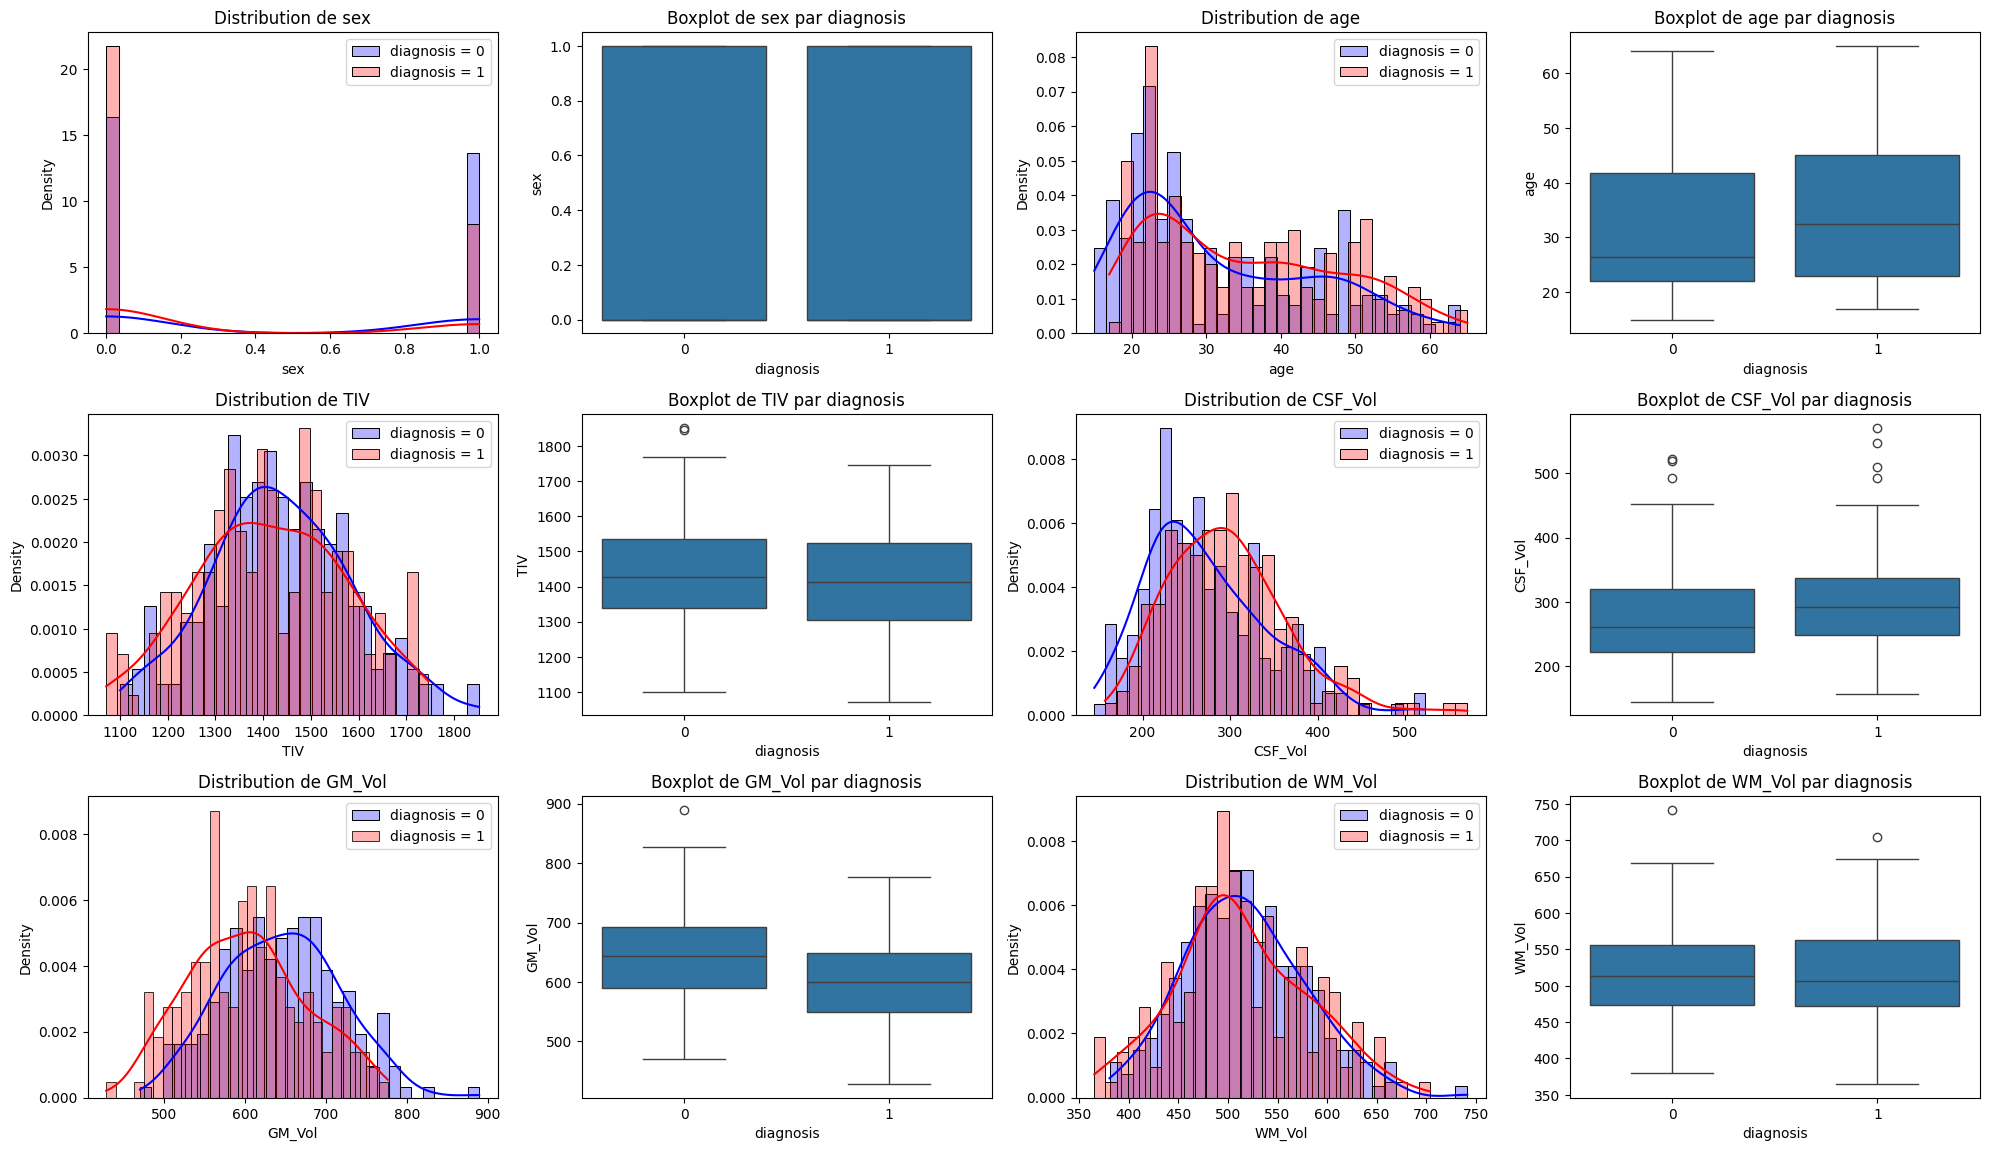

In [ ]:
# Features and target selection
X = df[['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'site']]
y = df['diagnosis']

numerical_features = ['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']
categorical_features = ['site']

# Diviser le dataframe en df_bad_0 (BAD = 0) et df_bad_1 (BAD = 1)
df_diagnosis_0 = df[df['diagnosis'] == 0]
df_diagnosis_1 = df[df['diagnosis'] == 1]

# Nombre de lignes et colonnes souhaitées (exemple : 4 lignes, 2 colonnes pour chaque type de graphique)
n_cols = 4
n_rows = len(numerical_features) * 2 // n_cols + 1  # Chaque variable a 2 types de graphiques (histogramme et boxplot)

# Créer une figure avec des axes imbriqués
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Ajuster figsize si nécessaire
axes = axes.flatten()  # Transformer les axes en un tableau 1D pour un accès simplifié

# Tracer les graphiques pour chaque variable
for i, var in enumerate(numerical_features):
    # Tracer un histogramme dans la première rangée pour chaque variable
    sns.histplot(df_diagnosis_0[var], color='blue', label='diagnosis = 0', kde=True, stat="density", bins=30, alpha=0.3, ax=axes[i*2])
    sns.histplot(df_diagnosis_1[var], color='red', label='diagnosis = 1', kde=True, stat="density", bins=30, alpha=0.3, ax=axes[i*2])
    axes[i*2].set_title(f'Distribution de {var}')
    axes[i*2].legend()

    # Tracer un boxplot dans la deuxième rangée pour chaque variable
    sns.boxplot(x='diagnosis', y=var, data=df, ax=axes[i*2+1])
    axes[i*2+1].set_title(f'Boxplot de {var} par diagnosis')

# Supprimer les axes vides s'il y en a
for i in range(len(numerical_features)*2, len(axes)):
    fig.delaxes(axes[i])

# Ajuster automatiquement l'espacement entre les graphiques
plt.tight_layout()
plt.show()

## Pairplot

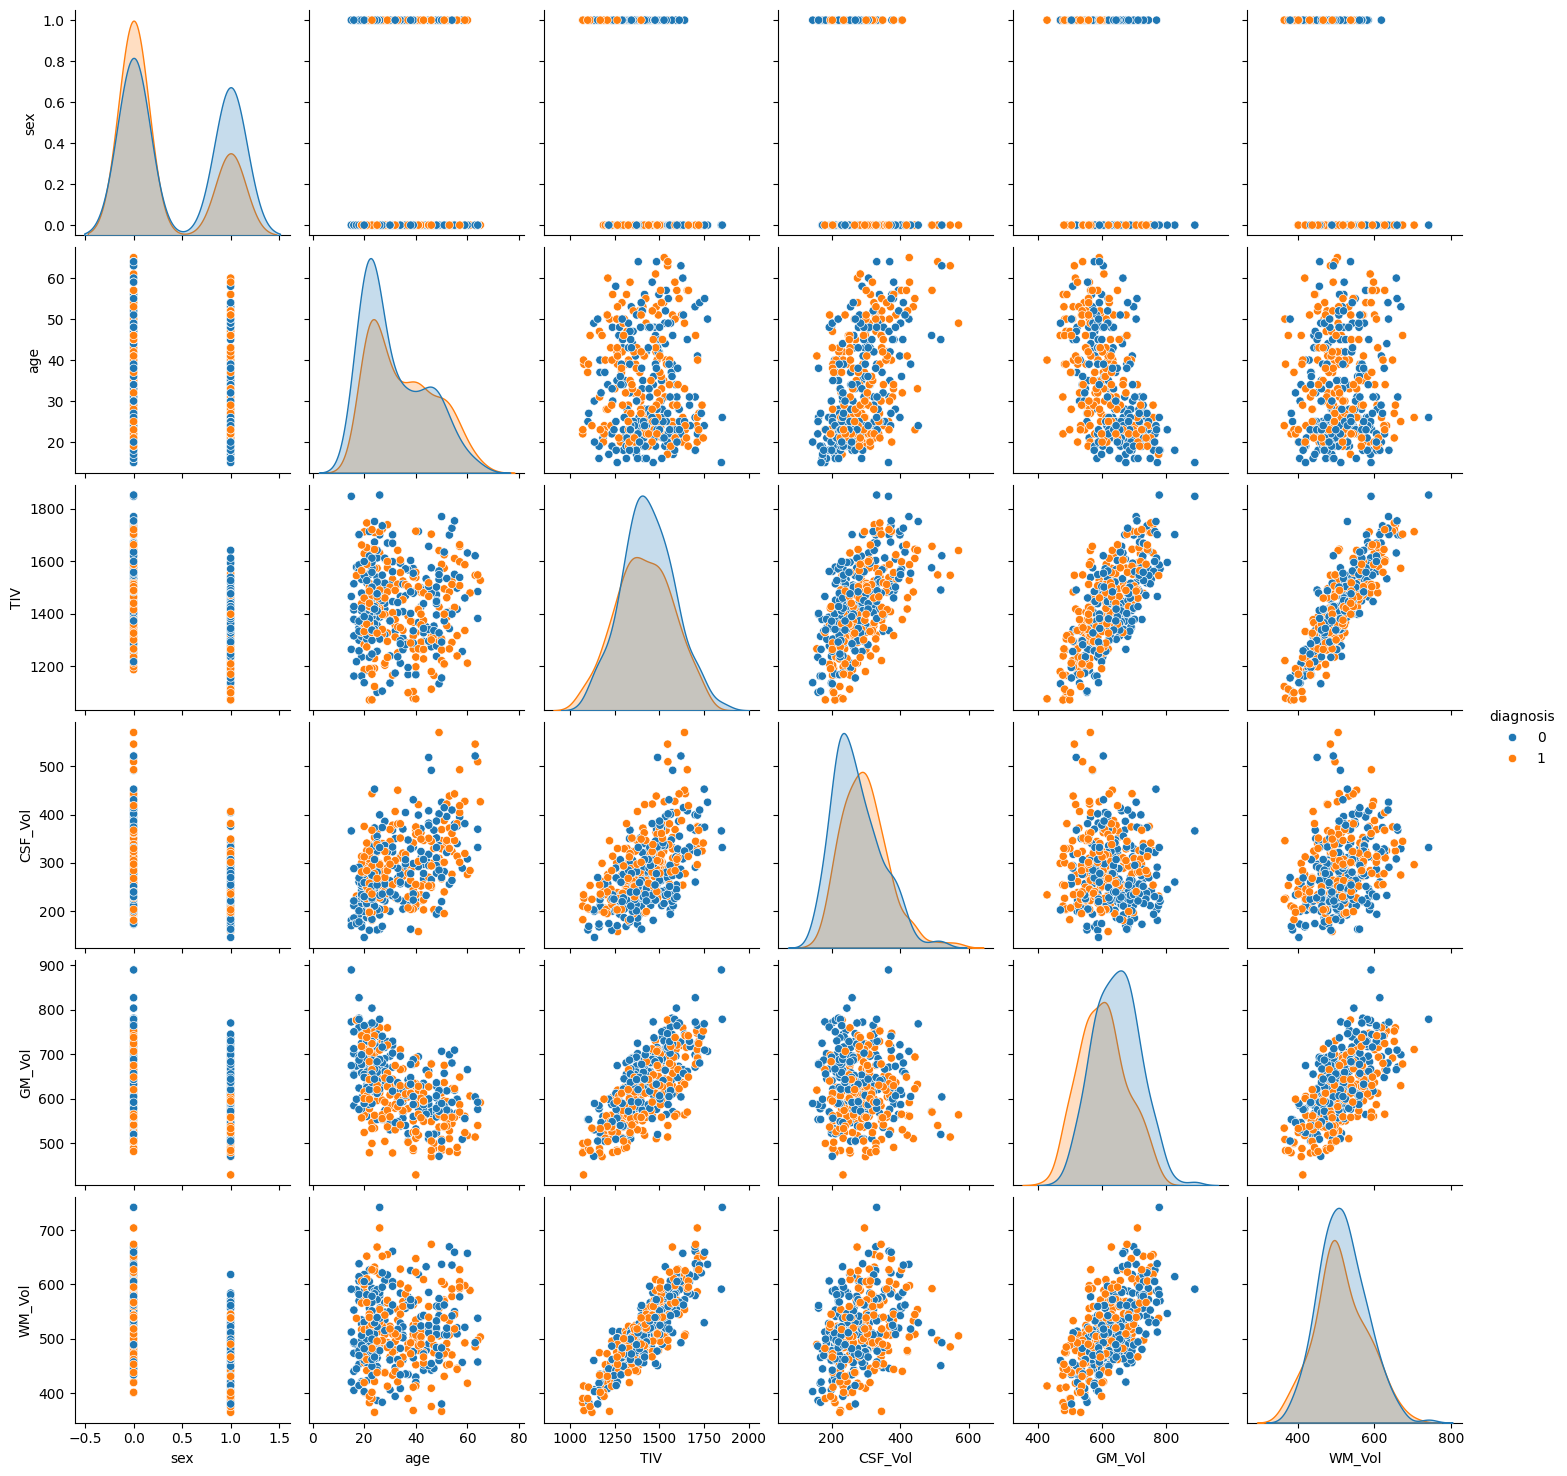

In [ ]:
# Créer un pairplot
sns.pairplot(df, hue='diagnosis', diag_kind='kde')

# Afficher le graphique
plt.show()

## t-SNE - Vérifier 'Label Noise'

### df

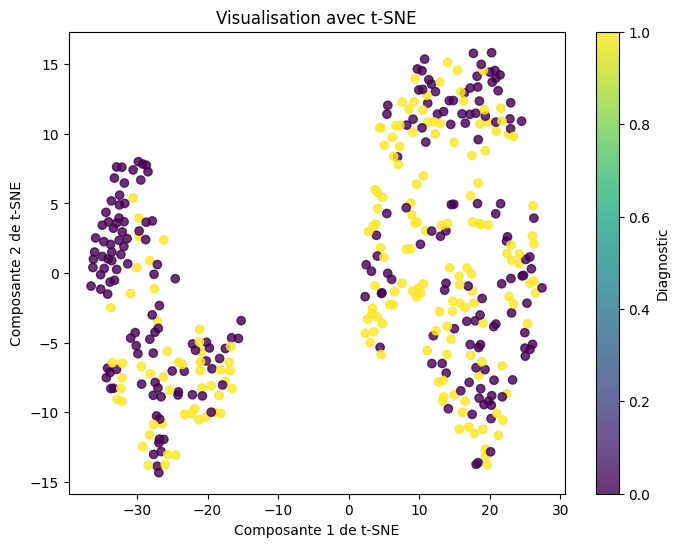

    participant_id session  sex   age  diagnosis             study   site  \
17          NM1050      V1 0.00 54.00          1  SCHIZCONNECT-VIP  WUSTL   
47          NM4194      V1 0.00 51.00          1  SCHIZCONNECT-VIP  WUSTL   
71          NM1020      V1 0.00 23.00          1  SCHIZCONNECT-VIP  WUSTL   
90          NM9798      V1 0.00 49.00          1  SCHIZCONNECT-VIP  WUSTL   
105         CC8913      V1 0.00 20.00          1  SCHIZCONNECT-VIP  WUSTL   
116         NM6112      V1 0.00 46.00          1  SCHIZCONNECT-VIP  WUSTL   
136         NM2053      V1 0.00 64.00          0  SCHIZCONNECT-VIP  WUSTL   
139         NM1007      V1 0.00 43.00          1  SCHIZCONNECT-VIP  WUSTL   
140         NM6664      V1 0.00 50.00          1  SCHIZCONNECT-VIP  WUSTL   
147         NM6224      V1 0.00 49.00          1  SCHIZCONNECT-VIP  WUSTL   
153         NM1019      V1 0.00 40.00          1  SCHIZCONNECT-VIP  WUSTL   
165         NM1072      V1 0.00 39.00          1  SCHIZCONNECT-VIP  WUSTL   

In [16]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Sélection des caractéristiques et de la cible
X = df[['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'site']]
y = df['diagnosis']

# Classification des types de caractéristiques
numerical_features = ['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']
categorical_features = ['site']

# Traitement des caractéristiques numériques : Normalisation
scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical_features])

# Traitement des caractéristiques catégorielles : Encodage
encoder = LabelEncoder()
X_cat = X[categorical_features].apply(encoder.fit_transform)

# Combinaison des caractéristiques traitées
X_processed = pd.concat([pd.DataFrame(X_num, columns=numerical_features), X_cat.reset_index(drop=True)], axis=1)

# Application de t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_processed)

# Visualisation des résultats
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Diagnostic')
plt.title('Visualisation avec t-SNE')
plt.xlabel('Composante 1 de t-SNE')
plt.ylabel('Composante 2 de t-SNE')
plt.show()

# Trouver les échantillons mélangés (points à la frontière ou vérifier les étiquettes)
df['tsne_component_1'] = X_embedded[:, 0]
df['tsne_component_2'] = X_embedded[:, 1]

# Exemple : Sélectionner les échantillons dont tsne_component_1 est proche de la frontière entre les deux clusters
boundary_samples = df[(df['tsne_component_1'] > -5) & (df['tsne_component_1'] < 5)]
print(boundary_samples)

### df & df_rois

Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

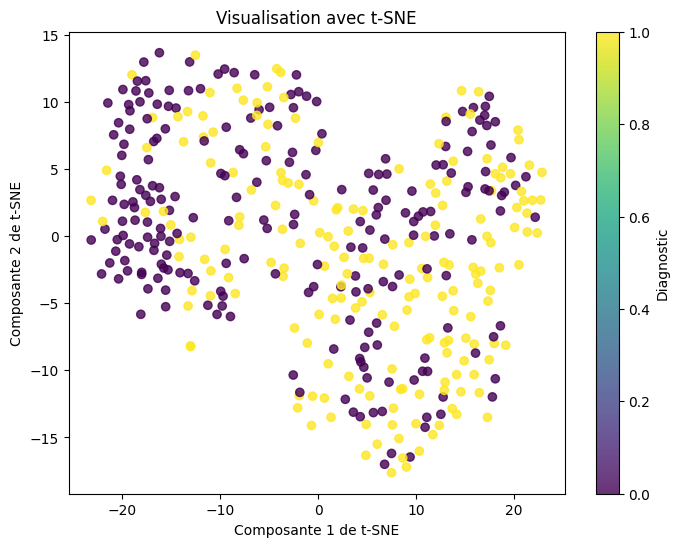

    participant_id session  sex   age  diagnosis             study site  \
0          CH7098a      V1 0.00 20.00          1  SCHIZCONNECT-VIP   NU   
1        A00024535      V1 0.00 26.00          0  SCHIZCONNECT-VIP  MRN   
6          CH8413a      V1 0.00 23.00          0  SCHIZCONNECT-VIP   NU   
9        A00020984      V1 0.00 31.00          0  SCHIZCONNECT-VIP  MRN   
12       A00022835      V1 0.00 28.00          0  SCHIZCONNECT-VIP  MRN   
..             ...     ...  ...   ...        ...               ...  ...   
383      A00026945      V1 0.00 39.00          0  SCHIZCONNECT-VIP  MRN   
388      A00036916      V1 0.00 55.00          0  SCHIZCONNECT-VIP  MRN   
389      A00037238      V1 0.00 38.00          0  SCHIZCONNECT-VIP  MRN   
395        CH7539a      V1 0.00 23.00          1  SCHIZCONNECT-VIP   NU   
400        CH8508a      V1 1.00 24.00          0  SCHIZCONNECT-VIP   NU   

        TIV  CSF_Vol  GM_Vol  WM_Vol  tsne_component_1  tsne_component_2  
0   1712.36   375.53  74

In [29]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Vérifier les colonnes présentes dans df_merged_rois
print("Colonnes dans df_merged_rois:", df_merged_rois.columns)

# Sélectionner les noms exacts des colonnes
columns_merged = ['sex', 'age']

# Supprimer les colonnes participant_id, run, session de df_rois
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]

# Vérifier la liste des colonnes à inclure à partir de df_rois
print("Colonnes de df_rois à inclure:", rois_columns)

# Combiner les colonnes de df_merged_rois et df_rois
X = pd.concat(
    [df_merged_rois[columns_merged],  # Sélectionner les colonnes exactes de df_merged_rois
     df_rois[rois_columns]],          # Colonnes numériques de df_rois
    axis=1
)

# Colonne cible
y = df_merged_rois['diagnosis']

# Définir les colonnes numériques et catégoriques
numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

# Traitement des caractéristiques numériques : Normalisation
scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical_features])

# Traitement des caractéristiques catégorielles : Encodage
encoder = LabelEncoder()
X_cat = X[categorical_features].apply(encoder.fit_transform)

# Combinaison des caractéristiques traitées
X_processed = pd.concat([pd.DataFrame(X_num, columns=numerical_features), X_cat.reset_index(drop=True)], axis=1)

# Tìm cột có tên '0' và loại bỏ (bất kể kiểu dữ liệu)
X_processed = X_processed.drop(columns=[col for col in X_processed.columns if str(col) == '0'], errors='ignore')

# Application de t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_processed)

# Visualisation des résultats
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Diagnostic')
plt.title('Visualisation avec t-SNE')
plt.xlabel('Composante 1 de t-SNE')
plt.ylabel('Composante 2 de t-SNE')
plt.show()

# Trouver les échantillons mélangés (points à la frontière ou vérifier les étiquettes)
df['tsne_component_1'] = X_embedded[:, 0]
df['tsne_component_2'] = X_embedded[:, 1]

# Exemple : Sélectionner les échantillons dont tsne_component_1 est proche de la frontière entre les deux clusters
boundary_samples = df[(df['tsne_component_1'] > -5) & (df['tsne_component_1'] < 5)]
print(boundary_samples)

# Etape 3 : Quels modèles ?

## df

In [ ]:
# Features and target selection
X = df[['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'site']]
y = df['diagnosis']

numerical_features = ['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']
categorical_features = ['site']

# Pipeline pour traiter les colonnes catégoriques et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Traiter les colonnes numériques
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Traiter les colonnes catégoriques
    ])

# Utiliser une validation croisée k-fold avec LazyClassifier
k = 5  # Nombre de plis pour la validation croisée
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Créer une variable pour stocker les scores moyens du ROC AUC pour chaque modèle
models_auc_scores = []
models_f1_scores = []

# Boucler à travers chaque pli dans la validation croisée
for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Prétraiter les colonnes numériques et catégoriques, incluant le Target Encoding pour 'Surname'
    X_train_fold_processed = preprocessor.fit_transform(X_train_fold, y_train_fold)
    X_val_fold_processed = preprocessor.transform(X_val_fold)

    # Initialiser LazyClassifier avec une métrique personnalisée roc_auc_score
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models_fold, predictions = clf.fit(X_train_fold_processed, X_val_fold_processed, y_train_fold, y_val_fold)

    print(f'models_fold : {models_fold}')

    # Stocker le score ROC AUC, F1 pour chaque modèle dans ce pli
    print(f'models_fold["ROC AUC"] : {models_fold["ROC AUC"]}')
    print(f'models_fold["F1 Score"] : {models_fold["F1 Score"]}')
    models_auc_scores.append(models_fold['ROC AUC'])
    models_f1_scores.append(models_fold['F1 Score'])

# Calculer le score moyen ROC AUC, F1 pour chaque modèle
mean_auc_scores = pd.DataFrame(models_auc_scores).mean()
mean_f1_scores = pd.DataFrame(models_f1_scores).mean()

# Afficher les résultats moyens des modèles avec les scores ROC AUC, F1
print("Average ROC AUC scores across folds:")
print(mean_auc_scores.sort_values(ascending=False))

100%|██████████| 32/32 [00:03<00:00,  8.42it/s]


[LightGBM] [Info] Number of positive: 150, number of negative: 178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457317 -> initscore=-0.171148
[LightGBM] [Info] Start training from score -0.171148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 32/32 [00:02<00:00, 14.25it/s]


[LightGBM] [Info] Number of positive: 150, number of negative: 178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457317 -> initscore=-0.171148
[LightGBM] [Info] Start training from score -0.171148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 32/32 [00:03<00:00, 10.45it/s]


[LightGBM] [Info] Number of positive: 150, number of negative: 178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457317 -> initscore=-0.171148
[LightGBM] [Info] Start training from score -0.171148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 32/32 [00:01<00:00, 23.74it/s]


[LightGBM] [Info] Number of positive: 151, number of negative: 177
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460366 -> initscore=-0.158870
[LightGBM] [Info] Start training from score -0.158870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 32/32 [00:01<00:00, 23.55it/s]

[LightGBM] [Info] Number of positive: 151, number of negative: 177
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460366 -> initscore=-0.158870
[LightGBM] [Info] Start training from score -0.158870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [75]:
# La version pour eliminer la multicolinéarité -> La performance reste la même

# Features and target selection
X = df[['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'site']]
y = df['diagnosis']

numerical_features = ['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol','CSF_Vol']
categorical_features = ['site']

# Pipeline pour traiter les colonnes catégoriques et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Traiter les colonnes numériques
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Traiter les colonnes catégoriques
    ])

# Utiliser une validation croisée k-fold avec LazyClassifier
k = 5  # Nombre de plis pour la validation croisée
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Créer une variable pour stocker les scores moyens du ROC AUC pour chaque modèle
models_auc_scores = []
models_f1_scores = []

# Boucler à travers chaque pli dans la validation croisée
for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Prétraiter les colonnes numériques et catégoriques, incluant le Target Encoding pour 'Surname'
    X_train_fold_processed = preprocessor.fit_transform(X_train_fold, y_train_fold)
    X_val_fold_processed = preprocessor.transform(X_val_fold)

    # Initialiser LazyClassifier avec une métrique personnalisée roc_auc_score
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models_fold, predictions = clf.fit(X_train_fold_processed, X_val_fold_processed, y_train_fold, y_val_fold)

    print(f'models_fold : {models_fold}')

    # Stocker le score ROC AUC, F1 pour chaque modèle dans ce pli
    print(f'models_fold["ROC AUC"] : {models_fold["ROC AUC"]}')
    print(f'models_fold["F1 Score"] : {models_fold["F1 Score"]}')
    models_auc_scores.append(models_fold['ROC AUC'])
    models_f1_scores.append(models_fold['F1 Score'])

# Calculer le score moyen ROC AUC, F1 pour chaque modèle
mean_auc_scores = pd.DataFrame(models_auc_scores).mean()
mean_f1_scores = pd.DataFrame(models_f1_scores).mean()

# Afficher les résultats moyens des modèles avec les scores ROC AUC, F1
print("Average ROC AUC scores across folds:")
print(mean_auc_scores.sort_values(ascending=False))

100%|██████████| 32/32 [00:01<00:00, 23.16it/s]


[LightGBM] [Info] Number of positive: 150, number of negative: 178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457317 -> initscore=-0.171148
[LightGBM] [Info] Start training from score -0.171148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 32/32 [00:01<00:00, 24.60it/s]


[LightGBM] [Info] Number of positive: 150, number of negative: 178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457317 -> initscore=-0.171148
[LightGBM] [Info] Start training from score -0.171148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 32/32 [00:03<00:00,  9.61it/s]

[LightGBM] [Info] Number of positive: 150, number of negative: 178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457317 -> initscore=-0.171148
[LightGBM] [Info] Start training from score -0.171148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 


 97%|█████████▋| 31/32 [00:06<00:00,  2.54it/s]

[LightGBM] [Info] Number of positive: 151, number of negative: 177
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 496
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460366 -> initscore=-0.158870
[LightGBM] [Info] Start training from score -0.158870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 32/32 [00:06<00:00,  4.88it/s]


models_fold :                                Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Time Taken
Model                                                                                    
LabelPropagation                   0.67               0.66     0.66      0.67        0.06
SGDClassifier                      0.66               0.66     0.66      0.66        0.03
RandomForestClassifier             0.66               0.65     0.65      0.65        0.93
LabelSpreading                     0.66               0.65     0.65      0.65        0.07
DecisionTreeClassifier             0.66               0.64     0.64      0.65        0.04
LGBMClassifier                     0.65               0.64     0.64      0.65        0.30
ExtraTreesClassifier               0.63               0.63     0.63      0.63        0.52
Perceptron                         0.62               0.62     0.62      0.62        0.03
PassiveAggressiveClassifier        0.62               0.62     0.62      0.62        0

100%|██████████| 32/32 [00:02<00:00, 12.25it/s]

[LightGBM] [Info] Number of positive: 151, number of negative: 177
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460366 -> initscore=-0.158870
[LightGBM] [Info] Start training from score -0.158870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## df & df_rois

### LazyPredict

In [63]:
# Vérifier les colonnes présentes dans df_merged_rois
print("Colonnes dans df_merged_rois:", df_merged_rois.columns)

# Sélectionner les noms exacts des colonnes
columns_merged = ['sex', 'age', 'site']

# Supprimer les colonnes participant_id, run, session de df_rois
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]

# Vérifier la liste des colonnes à inclure à partir de df_rois
print("Colonnes de df_rois à inclure:", rois_columns)

# Combiner les colonnes de df_merged_rois et df_rois
X = pd.concat(
    [df_merged_rois[columns_merged],  # Sélectionner les colonnes exactes de df_merged_rois
     df_rois[rois_columns]],          # Colonnes numériques de df_rois
    axis=1
)

# Colonne cible
y = df_merged_rois['diagnosis']

# Définir les caractéristiques numériques et catégoriques
numerical_features = ['sex', 'age'] + rois_columns
categorical_features = ['site']

# Pipeline pour traiter les colonnes catégoriques et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Traiter les colonnes numériques
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Traiter les colonnes catégoriques
    ])

# Utiliser une validation croisée k-fold avec LazyClassifier
k = 5  # Nombre de plis pour la validation croisée
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Créer une variable pour stocker les scores moyens du ROC AUC pour chaque modèle
models_auc_scores = []
models_f1_scores = []

# Boucler à travers chaque pli dans la validation croisée
for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Prétraiter les colonnes numériques et catégoriques
    X_train_fold_processed = preprocessor.fit_transform(X_train_fold, y_train_fold)
    X_val_fold_processed = preprocessor.transform(X_val_fold)

    # Initialiser LazyClassifier avec une métrique personnalisée roc_auc_score
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models_fold, predictions = clf.fit(X_train_fold_processed, X_val_fold_processed, y_train_fold, y_val_fold)

    # Stocker le score ROC AUC, F1 pour chaque modèle dans ce pli
    models_auc_scores.append(models_fold['ROC AUC'])
    models_f1_scores.append(models_fold['F1 Score'])

# Calculer le score moyen ROC AUC, F1 pour chaque modèle
mean_auc_scores = pd.DataFrame(models_auc_scores).mean()
mean_f1_scores = pd.DataFrame(models_f1_scores).mean()

# Afficher les résultats moyens des modèles avec les scores ROC AUC, F1
print("Average ROC AUC scores across folds:")
print(mean_auc_scores.sort_values(ascending=False))


Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session', 'run', 'TIV',
       'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol', 'rSupTemGy_CSF_Vol',
       'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol', 'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol',
       'lTemTraGy_CSF_Vol', 'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_GM_Vol',

 97%|█████████▋| 31/32 [00:13<00:00,  3.38it/s]

[LightGBM] [Info] Number of positive: 150, number of negative: 178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31167
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 288
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457317 -> initscore=-0.171148
[LightGBM] [Info] Start training from score -0.171148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

100%|██████████| 32/32 [00:14<00:00,  2.24it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 97%|█████████▋| 31/32 [00:07<00:00,  3.57it/s]

[LightGBM] [Info] Number of positive: 150, number of negative: 178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31150
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 288
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457317 -> initscore=-0.171148
[LightGBM] [Info] Start training from score -0.171148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

100%|██████████| 32/32 [00:08<00:00,  3.72it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 97%|█████████▋| 31/32 [00:05<00:00,  5.35it/s]

[LightGBM] [Info] Number of positive: 150, number of negative: 178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31165
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 288
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457317 -> initscore=-0.171148
[LightGBM] [Info] Start training from score -0.171148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

100%|██████████| 32/32 [00:06<00:00,  5.28it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 97%|█████████▋| 31/32 [00:08<00:00,  2.26it/s]

[LightGBM] [Info] Number of positive: 151, number of negative: 177
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31163
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 288
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460366 -> initscore=-0.158870
[LightGBM] [Info] Start training from score -0.158870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

100%|██████████| 32/32 [00:08<00:00,  3.62it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 97%|█████████▋| 31/32 [00:05<00:00,  5.31it/s]

[LightGBM] [Info] Number of positive: 151, number of negative: 177
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31159
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 288
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460366 -> initscore=-0.158870
[LightGBM] [Info] Start training from score -0.158870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

100%|██████████| 32/32 [00:06<00:00,  5.26it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

### AutoML

In [66]:
import h2o
from h2o.automl import H2OAutoML

# Initialiser H2O
h2o.init()

# Préparer les données
print("Colonnes dans df_merged_rois:", df_merged_rois.columns)

# Sélectionner les colonnes nécessaires et préparer les données
columns_merged = ['sex', 'age', 'site']  # Colonnes sélectionnées dans df_merged_rois
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]  # Colonnes de df_rois à inclure

# Combiner les données de df_merged_rois et df_rois
X = pd.concat(
    [df_merged_rois[columns_merged],  # Colonnes sélectionnées de df_merged_rois
     df_rois[rois_columns]],  # Colonnes de df_rois
    axis=1
)

# Définir la colonne cible (diagnosis)
y = df_merged_rois['diagnosis']

# Définir les colonnes numériques et catégoriques
numerical_features = ['sex', 'age'] + rois_columns  # Caractéristiques numériques
categorical_features = ['site']  # Caractéristiques catégoriques

# Construire un pipeline pour prétraiter les colonnes numériques et catégoriques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardiser les colonnes numériques
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Encodage one-hot pour les colonnes catégoriques
    ])

# Prétraiter les données
X_processed = preprocessor.fit_transform(X, y)  # Appliquer le prétraitement
X_processed = pd.DataFrame(X_processed)  # Convertir en DataFrame Pandas
y = pd.Series(y).reset_index(drop=True)  # Réinitialiser l'index pour la colonne cible

# Combiner les données prétraitées dans un H2OFrame
df_h2o = h2o.H2OFrame(pd.concat([X_processed, y], axis=1))

# Convertir la colonne cible (diagnosis) en type catégoriel
target = df_h2o.columns[-1]  # La colonne cible est la dernière colonne
predictors = df_h2o.columns[:-1]  # Les colonnes prédictives incluent toutes sauf la dernière
df_h2o[target] = df_h2o[target].asfactor()  # Convertir la colonne cible en facteur

# Initialiser H2O AutoML
aml = H2OAutoML(
    max_models=10,  # Limiter le nombre de modèles à tester
    max_runtime_secs=300,  # Limiter le temps d'exécution à 300 secondes
    seed=42,  # Assurer la reproductibilité
    nfolds=5,  # Utiliser une validation croisée à 5 plis
    sort_metric="AUC"  # Classer les modèles selon le score AUC
)

# Former les modèles AutoML
aml.train(x=predictors, y=target, training_frame=df_h2o)

# Afficher le tableau des scores des modèles AutoML
lb = aml.leaderboard
print("Leaderboard des modèles AutoML :")
print(lb)

# Afficher le meilleur modèle
leader_model = aml.leader
print("\nMeilleur modèle AutoML :")
print(leader_model)

# Sauvegarder le meilleur modèle
h2o.save_model(leader_model, path="./", force=True)

# Arrêter H2O après exécution
h2o.shutdown(prompt=False)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         6 mins 31 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    2 months and 7 days
H2O_cluster_name:           H2O_from_python_unknownUser_zx8udb
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.166 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session', 'run', 'TIV',
       'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol', 'rSupTemGy_CSF_Vol',
       'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol', 'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol',
       'lTemTraGy_CSF_Vol', 'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:10:40.602: _train param, Dropping bad and constant columns: [170, 182, 40, 28]

███
21:10:51.654: _train param, Dropping bad and constant columns: [170, 182, 40, 28]

███
21:11:05.36: _train param, Dropping bad and constant columns: [170, 182, 40, 28]

██
21:11:14.232: _train param, Dropping bad and constant columns: [170, 182, 40, 28]

██
21:11:22.836: _train param, Dropping bad and constant columns: [170, 182, 40, 28]

█
21:11:30.555: _train param, Dropping 

<ipython-input-66-eb338f94884b>:74: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)


# Etape 4 : Modélisation avec df (train_participants)

## LogisticRegression

GridSearchCV commence à : 2025-01-10 20:59:06
Fitting 5 folds for each of 28 candidates, totalling 140 fits
GridSearchCV se termine à : 2025-01-10 20:59:14
Temps total d'exécution : 7.66 secondes
Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best ROC AUC Score: 0.7336472836472836
Utilisation des meilleurs paramètres pour entraîner le modèle:
{'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}

### Résultats pour le pli (fold) 1 ###
Train ROC AUC: 0.7605
Validation ROC AUC: 0.6908

### Résultats pour le pli (fold) 2 ###
Train ROC AUC: 0.7196
Validation ROC AUC: 0.8487

### Résultats pour le pli (fold) 3 ###
Train ROC AUC: 0.7337
Validation ROC AUC: 0.8014

### Résultats pour le pli (fold) 4 ###
Train ROC AUC: 0.7692
Validation ROC AUC: 0.6721

### Résultats pour le pli (fold) 5 ###
Train ROC AUC: 0.7734
Validation ROC AUC: 0.6553

### Résultats pour les 5 plis (5 folds) ###
Train ROC AUC moyen: 0.7513
Valid

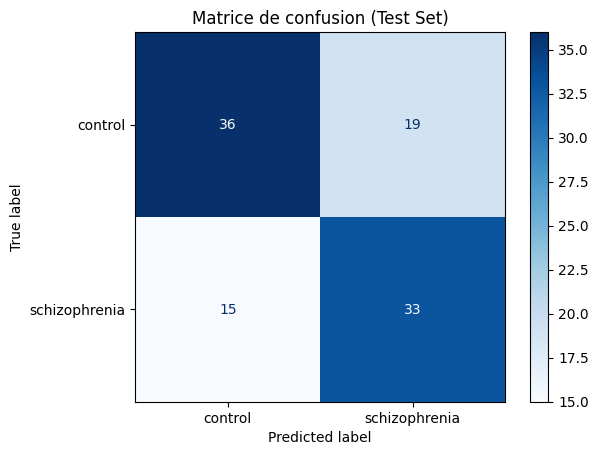

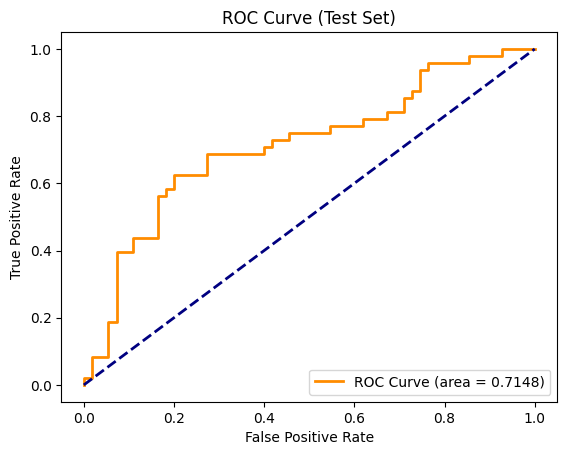

In [65]:
# Sélection des caractéristiques et de la cible
X = df[['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']]
y = df['diagnosis']

numerical_features = ['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']
categorical_features = []

# Pipeline pour traiter les colonnes catégoriques et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

# Initialiser le modèle LogisticRegression
logreg_classifier = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Créer un pipeline pour traiter les données et entraîner le modèle
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_classifier)
])

# Définir une grille de paramètres pour GridSearchCV avec des paramètres spécifiques à Logistic Regression
param_grid = [
    # Cas 1: 'l1' et 'l2' (sans l1_ratio)
    {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear', 'saga']
    },
    # Cas 2: 'elasticnet' (avec l1_ratio)
    {
        'classifier__penalty': ['elasticnet'],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['saga'],  # ElasticNet nécessite 'saga'
        'classifier__l1_ratio': [0.1, 0.5, 0.9]
    }
]

# Initialiser StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#############################################################
# Enregistrer l'heure de début
start_time = time.time()
print("GridSearchCV commence à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

# Utiliser GridSearchCV pour trouver les paramètres optimaux
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=stratified_kfold,
    scoring='roc_auc',  # Utiliser 'roc_auc' au lieu de 'f1' pour les données déséquilibrées
    n_jobs=-1,
    verbose=1
)

# Exécuter GridSearchCV pour trouver les paramètres optimaux
grid_search.fit(X, y)

# Enregistrer l'heure de fin
end_time = time.time()
print("GridSearchCV se termine à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))
print("Temps total d'exécution : {:.2f} secondes".format(end_time - start_time))

# Afficher les résultats de GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")

#############################################################
# Utiliser les meilleurs paramètres trouvés par GridSearchCV
best_params = grid_search.best_params_
print("Utilisation des meilleurs paramètres pour entraîner le modèle:")
print(best_params)

# Mettre à jour les paramètres du modèle avec les meilleurs paramètres
pipeline.set_params(**best_params)

# Initialiser StratifiedKFold avec k=5
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Variables pour stocker les performances
train_roc_auc_scores = []
val_roc_auc_scores = []
train_classification_reports = []
val_classification_reports = []

# Boucle sur chaque pli de validation croisée
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    # Diviser les données en train et validation
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Entraîner le pipeline sur les données d'entraînement
    pipeline.fit(X_train, y_train)

    # Prédire sur les données d'entraînement
    y_train_pred = pipeline.predict(X_train)
    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]  # Probabilité pour la classe positive

    # Prédire sur les données de validation
    y_val_pred = pipeline.predict(X_val)
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]  # Probabilité pour la classe positive

    # Calculer le score ROC AUC pour train et validation
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)
    train_roc_auc_scores.append(train_roc_auc)
    val_roc_auc_scores.append(val_roc_auc)

    # Générer un rapport de classification pour train et validation
    train_report = classification_report(y_train, y_train_pred, target_names=['control', 'schizophrenia'], output_dict=True)
    val_report = classification_report(y_val, y_val_pred, target_names=['control', 'schizophrenia'], output_dict=True)
    train_classification_reports.append(train_report)
    val_classification_reports.append(val_report)

    # Afficher les résultats pour le pli actuel
    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc:.4f}")

# Calculer les scores moyens pour train et validation
mean_train_roc_auc = sum(train_roc_auc_scores) / len(train_roc_auc_scores)
mean_val_roc_auc = sum(val_roc_auc_scores) / len(val_roc_auc_scores)

print(f"\n### Résultats pour les 5 plis (5 folds) ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

#############################################################
# Charger et préparer les données de test
# Utiliser directement le dataframe `test`
print("\n### Préparation des données de test ###")

# Sélectionner les mêmes colonnes pour X_test et y_test
X_test = test[['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']]
y_test = test['diagnosis']

# Vérifier que les colonnes sont alignées avec le pipeline
assert set(X_test.columns) == set(X.columns), "Les colonnes de X_test ne correspondent pas à celles de X."

# Prétraiter les données de test
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)

# Prédire les résultats sur le test
print("\n### Prédiction sur les données de test ###")
y_test_pred = pipeline.named_steps['classifier'].predict(X_test_processed)
y_test_pred_proba = pipeline.named_steps['classifier'].predict_proba(X_test_processed)[:, 1]  # Probabilité pour la classe positive

# Calculer les scores d'évaluation sur le test
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(y_test, y_test_pred, target_names=['control', 'schizophrenia'])

# Afficher les résultats sur le test
print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

# Afficher la matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
ConfusionMatrixDisplay(conf_matrix, display_labels=['control', 'schizophrenia']).plot(cmap='Blues')
plt.title("Matrice de confusion (Test Set)")
plt.show()

# Optionnel: Afficher la courbe ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

## RandomForestClassifier

In [ ]:
# Sélection des caractéristiques et de la cible
X = df[['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']]
y = df['diagnosis']

numerical_features = ['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']
categorical_features = []

# Pipeline pour traiter les colonnes catégoriques et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

# Initialiser le modèle RandomForestClassifier avec 100 arbres et class_weight pour équilibrer les classes
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Créer un pipeline pour traiter les données et entraîner le modèle
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Définir une grille de paramètres pour GridSearchCV avec des paramètres supplémentaires
param_grid = {
    'classifier__n_estimators': [100, 200],  # Tester avec différents nombres d'arbres
    'classifier__max_depth': [None, 10, 20],  # Tester avec différentes profondeurs
    'classifier__min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons pour diviser un nœud
    'classifier__min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons dans chaque feuille
    'classifier__max_features': ['auto', 'sqrt', 'log2'],  # Tester différentes stratégies de sélection des caractéristiques
    'classifier__bootstrap': [True, False],  # Tester avec et sans bootstrap
    'classifier__criterion': ['gini', 'entropy']  # Tester différents critères
}

# param_grid = {
#     'classifier__n_estimators': [100],
#     'classifier__max_depth': [None, 10],
#     'classifier__min_samples_split': [2, 5],
#     'classifier__min_samples_leaf': [1, 2],
#     'classifier__max_features': ['sqrt'],
#     'classifier__bootstrap': [True],
#     'classifier__criterion': ['gini']
# }

# Initialiser StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#############################################################
# Enregistrer l'heure de début
start_time = time.time()
print("GridSearchCV commence à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

# Utiliser GridSearchCV pour trouver les paramètres optimaux
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=stratified_kfold, scoring='f1', n_jobs=-1, verbose=1)

# Exécuter GridSearchCV pour trouver les paramètres optimaux
grid_search.fit(X, y)

# Enregistrer l'heure de fin
end_time = time.time()
print("GridSearchCV se termine à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))
print("Temps total d'exécution : {:.2f} secondes".format(end_time - start_time))

# # Afficher les résultats de GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC: {grid_search.best_score_}")

#############################################################

# # Enregistrer l'heure de début
# start_time = time.time()
# print("RandomizedSearchCV commence à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

# # Utiliser RandomizedSearchCV pour trouver les paramètres optimaux
# random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, cv=stratified_kfold,
#                                    scoring='f1', n_jobs=-1, verbose=1, n_iter=150, random_state=42)

# # Exécuter RandomizedSearchCV pour trouver les paramètres optimaux
# random_search.fit(X, y)

# # Enregistrer l'heure de fin
# end_time = time.time()
# print("RandomizedSearchCV se termine à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))
# print("Temps total d'exécution : {:.2f} secondes".format(end_time - start_time))

# # Afficher les résultats de RandomizedSearchCV
# print(f"Meilleurs paramètres : {random_search.best_params_}")
# print(f"Meilleur ROC AUC : {random_search.best_score_}")

GridSearchCV commence à : 2024-12-28 23:02:24
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
GridSearchCV se termine à : 2024-12-28 23:13:19
Temps total d'exécution : 655.77 secondes
Best Parameters: {'classifier__bootstrap': True, 'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best ROC AUC: 0.6796898897074335


In [ ]:
import optuna

# Sélection des caractéristiques et de la cible
X = df[['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']]
y = df['diagnosis']

numerical_features = ['sex', 'age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']
categorical_features = []

# Pipeline pour traiter les colonnes catégoriques et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

# Fonction objective pour Optuna
def objective(trial):
    # Définir les hyperparamètres à optimiser
    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    # Initialiser le modèle RandomForestClassifier avec les hyperparamètres suggérés
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        criterion=criterion,
        class_weight='balanced',
        random_state=42
    )

    # Créer un pipeline avec le préprocesseur et le modèle
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', rf_classifier)
    ])

    # Effectuer une validation croisée et retourner le score ROC AUC moyen
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
        pipeline, X, y, cv=stratified_kfold,
        scoring='roc_auc',
        error_score='raise'
    )
    return scores.mean()

# Enregistrer l'heure de début
start_time = time.time()
print("Optuna commence à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

# Créer une étude Optuna et optimiser
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Enregistrer l'heure de fin
end_time = time.time()
print("Optuna se termine à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))
print("Temps total d'exécution : {:.2f} secondes".format(end_time - start_time))

# Afficher les meilleurs hyperparamètres et le meilleur score
print(f"Best Parameters: {study.best_params}")
print(f"Best ROC AUC Score: {study.best_value}")

# Récupérer les meilleurs paramètres
best_params = study.best_params

# Initialiser le modèle avec les meilleurs paramètres
rf_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    bootstrap=best_params['bootstrap'],
    criterion=best_params['criterion'],
    class_weight='balanced',
    random_state=42
)

# Créer le pipeline final
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Validation croisée avec les meilleurs hyperparamètres
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Variables pour stocker les scores
train_roc_auc_scores = []
val_roc_auc_scores = []

# Boucler sur les folds
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Entraîner le pipeline
    pipeline.fit(X_train, y_train)

    # Prédictions sur train
    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    train_roc_auc_scores.append(train_roc_auc)

    # Prédictions sur validation
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]
    val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)
    val_roc_auc_scores.append(val_roc_auc)

    # Afficher les résultats pour chaque fold
    print(f"\n### Fold {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc:.4f}")

# Calculer les scores moyens
mean_train_roc_auc = sum(train_roc_auc_scores) / len(train_roc_auc_scores)
mean_val_roc_auc = sum(val_roc_auc_scores) / len(val_roc_auc_scores)

# Afficher les résultats finaux
print("\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

[I 2025-01-07 02:23:21,651] A new study created in memory with name: no-name-2ccf6d39-b95d-4b0a-a024-61a36bc381fe


Optuna commence à : 2025-01-07 02:23:21


[I 2025-01-07 02:23:26,883] Trial 0 finished with value: 0.7549226259752577 and parameters: {'n_estimators': 141, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7549226259752577.
[I 2025-01-07 02:23:28,708] Trial 1 finished with value: 0.7508355245197351 and parameters: {'n_estimators': 106, 'max_depth': None, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.7549226259752577.
[I 2025-01-07 02:23:30,598] Trial 2 finished with value: 0.7564731238415449 and parameters: {'n_estimators': 183, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 2 with value: 0.7564731238415449.
[I 2025-01-07 02:23:32,398] Trial 3 finished with value: 0.7472444932971248 and parameters: {'n_estimators': 175, 'max_dep

Optuna se termine à : 2025-01-07 02:25:00
Temps total d'exécution : 98.76 secondes
Best Parameters: {'n_estimators': 132, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}
Best ROC AUC Score: 0.7698843340948603

### Fold 1 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.7195

### Fold 2 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.8574

### Fold 3 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.8107

### Fold 4 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.7402

### Fold 5 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.7216

### Résultats finaux ###
Train ROC AUC moyen: 1.0000
Validation ROC AUC moyen: 0.7699


# Etape 5 : Modélisation avec df_merged_rois

## LogisticRegression - Baseline (GridSearchCV)

In [66]:
# Vérifier les colonnes présentes dans df_merged_rois
print("Colonnes dans df_merged_rois:", df_merged_rois.columns)

# Sélectionner les noms exacts des colonnes
columns_merged = ['sex', 'age']

# Supprimer les colonnes participant_id, run, session de df_rois
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]

# Vérifier la liste des colonnes à inclure à partir de df_rois
print("Colonnes de df_rois à inclure:", rois_columns)

# Combiner les colonnes de df_merged_rois et df_rois
X = pd.concat(
    [df_merged_rois[columns_merged],  # Sélectionner les colonnes exactes de df_merged_rois
     df_rois[rois_columns]],          # Colonnes numériques de df_rois
    axis=1
)

# Colonne cible
y = df_merged_rois['diagnosis']

# Définir les caractéristiques numériques et catégoriques
numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

# Pipeline pour traiter les colonnes catégoriques et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

# Initialiser le modèle LogisticRegression
logreg_classifier = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    multi_class='auto'
)

# Créer un pipeline pour traiter les données et entraîner le modèle
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_classifier)
])

# Définir une grille de paramètres pour GridSearchCV avec des paramètres spécifiques à Logistic Regression
param_grid = {
    'classifier__penalty': ['l1', 'l2'],  # Type de régularisation
    'classifier__C': [0.1, 1, 10],       # Hyperparamètre de régularisation
    'classifier__solver': ['liblinear', 'saga']  # Méthodes compatibles
}


# Initialiser StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#############################################################
# Enregistrer l'heure de début
start_time = time.time()
print("GridSearchCV commence à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

# Utiliser GridSearchCV pour trouver les paramètres optimaux
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=stratified_kfold,
    scoring='roc_auc',  # Utiliser 'roc_auc' au lieu de 'f1' pour les données déséquilibrées
    n_jobs=-1,
    verbose=1
)

# Exécuter GridSearchCV pour trouver les paramètres optimaux
grid_search.fit(X, y)

# Enregistrer l'heure de fin
end_time = time.time()
print("GridSearchCV se termine à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))
print("Temps total d'exécution : {:.2f} secondes".format(end_time - start_time))

# Afficher les résultats de GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")

# Utiliser les meilleurs paramètres trouvés par GridSearchCV
best_params = grid_search.best_params_
print("Utilisation des meilleurs paramètres pour entraîner le modèle:")
print(best_params)

# Mettre à jour les paramètres du modèle avec les meilleurs paramètres
pipeline.set_params(**best_params)

# Initialiser StratifiedKFold avec k=5
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Variables pour stocker les performances
train_roc_auc_scores = []
val_roc_auc_scores = []
train_classification_reports = []
val_classification_reports = []

# Boucle sur chaque pli de validation croisée
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    # Diviser les données en train et validation
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Entraîner le pipeline sur les données d'entraînement
    pipeline.fit(X_train, y_train)

    # Prédire sur les données d'entraînement
    y_train_pred = pipeline.predict(X_train)
    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]  # Probabilité pour la classe positive

    # Prédire sur les données de validation
    y_val_pred = pipeline.predict(X_val)
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]  # Probabilité pour la classe positive

    # Calculer le score ROC AUC pour train et validation
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)
    train_roc_auc_scores.append(train_roc_auc)
    val_roc_auc_scores.append(val_roc_auc)

    # Générer un rapport de classification pour train et validation
    train_report = classification_report(y_train, y_train_pred, target_names=['control', 'schizophrenia'], output_dict=True)
    val_report = classification_report(y_val, y_val_pred, target_names=['control', 'schizophrenia'], output_dict=True)
    train_classification_reports.append(train_report)
    val_classification_reports.append(val_report)

    # Afficher les résultats pour le pli actuel
    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc:.4f}")

# Calculer les scores moyens pour train et validation
mean_train_roc_auc = sum(train_roc_auc_scores) / len(train_roc_auc_scores)
mean_val_roc_auc = sum(val_roc_auc_scores) / len(val_roc_auc_scores)

print(f"\n### Résultats pour les 5 plis (5 folds) ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

#############################################################

# Charger et préparer les données de test
# Supposons que test_merged_rois est déjà chargé
print("Colonnes dans test_merged_rois:", test_merged_rois.columns)

# Préparer les colonnes du test
X_test = pd.concat(
    [test_merged_rois[columns_merged],  # Colonnes exactes de test_merged_rois
     test_rois[rois_columns]],            # Colonnes numériques de test_rois
    axis=1
)

# Cible (target) pour les données de test
y_test = test_merged_rois['diagnosis']

# Prétraiter les données de test
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)

# Prédire les résultats sur le test
y_test_pred = pipeline.named_steps['classifier'].predict(X_test_processed)
y_test_pred_proba = pipeline.named_steps['classifier'].predict_proba(X_test_processed)[:, 1]  # Probabilité pour la classe positive

# Calculer les scores d'évaluation sur le test
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(y_test, y_test_pred, target_names=['control', 'schizophrenia'])

# Afficher les résultats sur le test
print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

## LogisticRegression - Baseline (L1)

In [22]:
import optuna
from optuna.samplers import TPESampler

# Étape 1: Vérifier les colonnes présentes dans df_merged_rois
print("Colonnes dans df_merged_rois:", df_merged_rois.columns)

# Étape 2: Sélectionner les noms exacts des colonnes
columns_merged = ['sex', 'age']

# Étape 3: Supprimer les colonnes inutiles de df_rois
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]

# Vérifier les colonnes sélectionnées
print("Colonnes de df_rois à inclure:", rois_columns)

# Étape 4: Combiner les colonnes pour créer X (features) et y (target)
X = pd.concat(
    [df_merged_rois[columns_merged],  # Colonnes exactes de df_merged_rois
     df_rois[rois_columns]],          # Colonnes numériques de df_rois
    axis=1
)
y = df_merged_rois['diagnosis']

# Étape 5: Définir les colonnes numériques et catégoriques
numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

# Préprocesseur pour traiter les colonnes catégoriques et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

# Étape 6: Initialiser LogisticRegression avec L1 régularisation
logreg_classifier = LogisticRegression(
    penalty='l1',                # Régularisation L1
    solver='liblinear',          # Solver compatible avec L1
    max_iter=1000,               # Nombre maximal d'itérations
    class_weight='balanced',     # Gérer les données déséquilibrées
    random_state=42
)

# Créer un pipeline avec préprocesseur et classifieur
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_classifier)
])

# Étape 7: Définir une grille plus fine pour C
param_grid = {
    'classifier__C': sorted(list(np.linspace(0.01, 1, 100)) + [0.1])  # 100 valeurs + 0.1
}

# Initialiser StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Étape 8 (Mise à jour): Utiliser Optuna pour optimiser le paramètre `C`
def objective(trial):
    # Suggérer une valeur pour le paramètre C (log-uniforme pour couvrir une grande plage)
    C = trial.suggest_loguniform('C', 0.01, 1)  # Valeurs de C

    # Définir le classifieur avec la valeur C suggérée
    logreg_classifier = LogisticRegression(
        penalty='l1',                # Régularisation L1
        solver='liblinear',          # Solver compatible avec L1
        max_iter=1000,               # Nombre maximal d'itérations
        class_weight='balanced',     # Gérer les données déséquilibrées
        random_state=42,
        C=C                          # Valeur de C suggérée
    )

    # Pipeline mis à jour
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', logreg_classifier)
    ])

    # Validation croisée avec StratifiedKFold
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []

    for train_index, val_index in stratified_kfold.split(X, y):
        # Diviser les données en train et validation
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Entraîner le pipeline
        pipeline.fit(X_train, y_train)

        # Prédictions de probabilité pour le calcul de ROC AUC
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]
        roc_auc = roc_auc_score(y_val, y_val_pred_proba)
        roc_auc_scores.append(roc_auc)

    # Retourner la moyenne du ROC AUC
    return np.mean(roc_auc_scores)


# Créer une étude Optuna
study = optuna.create_study(
    direction='maximize',          # Maximiser le score ROC AUC
    sampler=TPESampler(seed=42)    # Sampler TPE pour optimiser efficacement
)

# Lancer l'étude avec 50 essais
print("\n### Début de l'optimisation avec Optuna ###")
study.optimize(objective, n_trials=200)

# Meilleur paramètre trouvé
best_C = study.best_params['C']
best_score = study.best_value

print("\n### Résultats Optuna ###")
print(f"Meilleur C: {best_C}")
print(f"Meilleur ROC AUC moyen: {best_score:.4f}")

# Utiliser la meilleure valeur de C pour mettre à jour le pipeline
logreg_classifier = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    C=best_C
)
pipeline.set_params(classifier=logreg_classifier)

###############################################################################

# Étape 10: Évaluation avec validation croisée (stratifiée)
train_roc_auc_scores = []
val_roc_auc_scores = []

for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    # Diviser les données en train et validation
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Entraîner le pipeline
    pipeline.fit(X_train, y_train)

    # Prédictions sur train et validation
    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    # Calculer AUC
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)

    train_roc_auc_scores.append(train_roc_auc)
    val_roc_auc_scores.append(val_roc_auc)

    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc:.4f}")

# Résultats moyens sur les plis
mean_train_roc_auc = np.mean(train_roc_auc_scores)
mean_val_roc_auc = np.mean(val_roc_auc_scores)

print(f"\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

###############################################################################

# Étape : Évaluer sur les données de test
X_test = pd.concat(
    [test_merged_rois[columns_merged],
     test_rois[rois_columns]],
    axis=1
)
y_test = test_merged_rois['diagnosis']

# Prétraiter et prédire
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_proba = pipeline.named_steps['classifier'].predict_proba(X_test_processed)[:, 1]

# Calculer le score sur les données de test
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(
    y_test,
    pipeline.named_steps['classifier'].predict(X_test_processed),
    target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

###############################################################################

# Étape 1 : Entraîner le pipeline
pipeline.fit(X, y)

# Étape 2: Extraire les noms des colonnes après preprocessing
# Pour les colonnes numériques
num_features_after_scaling = numerical_features

# Liste complète des features après preprocessing
final_features = num_features_after_scaling

# Étape 3: Extraire les coefficients du modèle Logistic Regression
coefficients = pipeline.named_steps['classifier'].coef_[0]  # Coefficients pour chaque feature

# Étape 4: Combiner les features et leurs coefficients
features_with_coefficients = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': coefficients
})

# Étape 5: Filtrer uniquement les features avec Coefficient ≠ 0
features_with_nonzero_coefficients = features_with_coefficients[features_with_coefficients['Coefficient'] != 0]

# Étape 6: Trier les features par l'ordre alphabetique
features_with_nonzero_coefficients_sorted = features_with_nonzero_coefficients.sort_values(by='Feature')

# Étape 7: Afficher les résultats
print("\n### Liste des features avec Coefficient ≠ 0 ###")
print(features_with_nonzero_coefficients_sorted)

print(f"\n### Nombre total de features avec Coefficient ≠ 0: {len(features_with_nonzero_coefficients_sorted)} ###")

[I 2025-01-11 21:40:11,493] A new study created in memory with name: no-name-7302f0ee-b8b6-4f63-baf7-f66d97b625d4


Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

[I 2025-01-11 21:40:11,950] Trial 0 finished with value: 0.8112206704311967 and parameters: {'C': 0.05611516415334506}. Best is trial 0 with value: 0.8112206704311967.
[I 2025-01-11 21:40:12,970] Trial 1 finished with value: 0.7488065577539261 and parameters: {'C': 0.7969454818643931}. Best is trial 0 with value: 0.8112206704311967.
[I 2025-01-11 21:40:13,619] Trial 2 finished with value: 0.8056886072675546 and parameters: {'C': 0.29106359131330695}. Best is trial 0 with value: 0.8112206704311967.
[I 2025-01-11 21:40:14,329] Trial 3 finished with value: 0.8211504087819878 and parameters: {'C': 0.15751320499779725}. Best is trial 3 with value: 0.8211504087819878.
[I 2025-01-11 21:40:14,989] Trial 4 finished with value: 0.7272603704182651 and parameters: {'C': 0.020513382630874502}. Best is trial 3 with value: 0.8211504087819878.
[I 2025-01-11 21:40:15,509] Trial 5 finished with value: 0.727140250298145 and parameters: {'C': 0.020511104188433976}. Best is trial 3 with value: 0.8211504087


### Résultats Optuna ###
Meilleur C: 0.12900288290228604
Meilleur ROC AUC moyen: 0.8225

### Résultats pour le pli (fold) 1 ###
Train ROC AUC: 0.9037
Validation ROC AUC: 0.7829

### Résultats pour le pli (fold) 2 ###
Train ROC AUC: 0.8784
Validation ROC AUC: 0.8911

### Résultats pour le pli (fold) 3 ###
Train ROC AUC: 0.8856
Validation ROC AUC: 0.8822

### Résultats pour le pli (fold) 4 ###
Train ROC AUC: 0.9132
Validation ROC AUC: 0.7652

### Résultats pour le pli (fold) 5 ###
Train ROC AUC: 0.8947
Validation ROC AUC: 0.7910

### Résultats finaux ###
Train ROC AUC moyen: 0.8951
Validation ROC AUC moyen: 0.8225

### Évaluation sur les données de test ###
Test ROC AUC: 0.8061
Rapport de classification sur les données de test:
               precision    recall  f1-score   support

      control       0.76      0.82      0.79        55
schizophrenia       0.77      0.71      0.74        48

     accuracy                           0.77       103
    macro avg       0.77      0.76      0

In [23]:
# Étape 1: Vérifier les colonnes présentes dans df_merged_rois
print("Colonnes dans df_merged_rois:", df_merged_rois.columns)

# Étape 2: Sélectionner les noms exacts des colonnes
columns_merged = ['sex', 'age']

# Étape 3: Supprimer les colonnes inutiles de df_rois
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]

# Vérifier les colonnes sélectionnées
print("Colonnes de df_rois à inclure:", rois_columns)

# Étape 4: Combiner les colonnes pour créer X (features) et y (target)
X = pd.concat(
    [df_merged_rois[columns_merged],  # Colonnes exactes de df_merged_rois
     df_rois[rois_columns]],          # Colonnes numériques de df_rois
    axis=1
)
y = df_merged_rois['diagnosis']

# Étape 5: Définir les colonnes numériques et catégoriques
numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

# Préprocesseur pour traiter les colonnes catégoriques et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

# Étape 6: Initialiser LogisticRegression avec L1 régularisation
logreg_classifier = LogisticRegression(
    penalty='l1',                # Régularisation L1
    solver='liblinear',          # Solver compatible avec L1
    max_iter=1000,               # Nombre maximal d'itérations
    class_weight='balanced',     # Gérer les données déséquilibrées
    random_state=42
)

# Créer un pipeline avec préprocesseur et classifieur
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_classifier)
])

# Étape 7: Définir une grille plus fine pour C
param_grid = {
    'classifier__C': sorted(list(np.linspace(0.01, 1, 100)) + [0.1])  # 100 valeurs + 0.1
}

# Initialiser StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Étape 8: GridSearchCV pour trouver le meilleur C
start_time = time.time()
print("GridSearchCV commence à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=stratified_kfold,
    scoring='roc_auc',  # Optimiser AUC
    n_jobs=-1,
    verbose=1
)

# Exécuter GridSearchCV
grid_search.fit(X, y)

end_time = time.time()
print("GridSearchCV se termine à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))
print("Temps total d'exécution : {:.2f} secondes".format(end_time - start_time))

# Étape 9: Afficher les meilleurs paramètres et le score
print(f"Meilleur paramètre C: {grid_search.best_params_['classifier__C']}")
print(f"Meilleur score ROC AUC: {grid_search.best_score_:.4f}")

# Utiliser le meilleur modèle trouvé
pipeline.set_params(classifier__C=grid_search.best_params_['classifier__C'])

# Étape 10: Évaluation avec validation croisée (stratifiée)
train_roc_auc_scores = []
val_roc_auc_scores = []

for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    # Diviser les données en train et validation
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Entraîner le pipeline
    pipeline.fit(X_train, y_train)

    # Prédictions sur train et validation
    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    # Calculer AUC
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)

    train_roc_auc_scores.append(train_roc_auc)
    val_roc_auc_scores.append(val_roc_auc)

    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc:.4f}")

# Résultats moyens sur les plis
mean_train_roc_auc = np.mean(train_roc_auc_scores)
mean_val_roc_auc = np.mean(val_roc_auc_scores)

print(f"\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

###############################################################################

# Étape 11: Évaluer sur les données de test
X_test = pd.concat(
    [test_merged_rois[columns_merged],
     test_rois[rois_columns]],
    axis=1
)
y_test = test_merged_rois['diagnosis']

# Prétraiter et prédire
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_proba = pipeline.named_steps['classifier'].predict_proba(X_test_processed)[:, 1]

# Calculer le score sur les données de test
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(
    y_test,
    pipeline.named_steps['classifier'].predict(X_test_processed),
    target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

###############################################################################

# Étape 1 : Entraîner le pipeline
pipeline.fit(X, y)

# Étape 2: Extraire les noms des colonnes après preprocessing
# Pour les colonnes numériques
num_features_after_scaling = numerical_features

# Liste complète des features après preprocessing
final_features = num_features_after_scaling

# Étape 3: Extraire les coefficients du modèle Logistic Regression
coefficients = pipeline.named_steps['classifier'].coef_[0]  # Coefficients pour chaque feature

# Étape 4: Combiner les features et leurs coefficients
features_with_coefficients = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': coefficients
})

# Étape 5: Filtrer uniquement les features avec Coefficient ≠ 0
features_with_nonzero_coefficients = features_with_coefficients[features_with_coefficients['Coefficient'] != 0]

# Étape 6: Trier les features par l'ordre alphabetique
features_with_nonzero_coefficients_sorted = features_with_nonzero_coefficients.sort_values(by='Feature')

# Étape 7: Afficher les résultats
print("\n### Liste des features avec Coefficient ≠ 0 ###")
print(features_with_nonzero_coefficients_sorted)

print(f"\n### Nombre total de features avec Coefficient ≠ 0: {len(features_with_nonzero_coefficients_sorted)} ###")

Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

## LogisticRegression - Baseline (L2)

In [27]:
import optuna
from optuna.samplers import TPESampler

# Étape 1: Vérifier les colonnes présentes dans df_merged_rois
print("Colonnes dans df_merged_rois:", df_merged_rois.columns)

# Étape 2: Sélectionner les noms exacts des colonnes
columns_merged = ['sex', 'age']

# Étape 3: Supprimer les colonnes inutiles de df_rois
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]

# Vérifier les colonnes sélectionnées
print("Colonnes de df_rois à inclure:", rois_columns)

# Étape 4: Combiner les colonnes pour créer X (features) et y (target)
X = pd.concat(
    [df_merged_rois[columns_merged],  # Colonnes exactes de df_merged_rois
     df_rois[rois_columns]],          # Colonnes numériques de df_rois
    axis=1
)
y = df_merged_rois['diagnosis']

# Étape 5: Définir les colonnes numériques et catégoriques
numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

# Préprocesseur pour traiter les colonnes catégoriques et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

# Étape 6: Initialiser LogisticRegression avec L2 régularisation
logreg_classifier = LogisticRegression(
    penalty='l2',                # Régularisation L2
    solver='liblinear',          # Solver compatible avec L2
    max_iter=1000,               # Nombre maximal d'itérations
    class_weight='balanced',     # Gérer les données déséquilibrées
    random_state=42
)

# Créer un pipeline avec préprocesseur et classifieur
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_classifier)
])

# Étape 7: Définir une grille pour la recherche d'hyperparamètres
param_grid = {
    'classifier__C': sorted(list(np.linspace(0.01, 1, 100)) + [0.1, 10, 100]),  # Valeurs de C
    'classifier__solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga']  # Solvers compatibles avec L2
}

# Initialiser StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Étape 8 (Mise à jour): Utiliser Optuna pour optimiser `C` et `solver`
def objective(trial):
    # Suggérer une valeur pour le paramètre C (log-uniforme pour couvrir une plage donnée)
    C = trial.suggest_loguniform('C', 0.01, 1)  # Valeurs de C

    # Suggérer un solver parmi les choix compatibles avec L2
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'newton-cg', 'saga'])

    # Définir le classifieur avec les valeurs suggérées pour C et solver
    logreg_classifier = LogisticRegression(
        penalty='l2',                # Régularisation L2
        solver=solver,               # Solver suggéré
        max_iter=1000,               # Nombre maximal d'itérations
        class_weight='balanced',     # Gérer les données déséquilibrées
        random_state=42,
        C=C                          # Valeur de C suggérée
    )

    # Pipeline mis à jour
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', logreg_classifier)
    ])

    # Validation croisée avec StratifiedKFold
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []

    for train_index, val_index in stratified_kfold.split(X, y):
        # Diviser les données en train et validation
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Entraîner le pipeline
        pipeline.fit(X_train, y_train)

        # Prédictions de probabilité pour le calcul de ROC AUC
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]
        roc_auc = roc_auc_score(y_val, y_val_pred_proba)
        roc_auc_scores.append(roc_auc)

    # Retourner la moyenne du ROC AUC
    return np.mean(roc_auc_scores)

# Créer une étude Optuna
study = optuna.create_study(
    direction='maximize',          # Maximiser le score ROC AUC
    sampler=TPESampler(seed=42)    # Sampler TPE pour optimiser efficacement
)

# Lancer l'étude avec 200 essais
print("\n### Début de l'optimisation avec Optuna ###")
study.optimize(objective, n_trials=200)

# Meilleur paramètre trouvé
best_C = study.best_params['C']
best_score = study.best_value

print("\n### Résultats Optuna ###")
print(f"Meilleur C: {best_C}")
print(f"Meilleur ROC AUC moyen: {best_score:.4f}")

# Utiliser la meilleure valeur de C pour mettre à jour le pipeline
logreg_classifier = LogisticRegression(
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    C=best_C
)
pipeline.set_params(classifier=logreg_classifier)

###############################################################################

# Étape 10: Évaluation avec validation croisée (stratifiée)
train_roc_auc_scores = []
val_roc_auc_scores = []

for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    # Diviser les données en train et validation
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Entraîner le pipeline
    pipeline.fit(X_train, y_train)

    # Prédictions sur train et validation
    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    # Calculer AUC
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)

    train_roc_auc_scores.append(train_roc_auc)
    val_roc_auc_scores.append(val_roc_auc)

    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc:.4f}")

# Résultats moyens sur les plis
mean_train_roc_auc = np.mean(train_roc_auc_scores)
mean_val_roc_auc = np.mean(val_roc_auc_scores)

print(f"\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

###############################################################################

# Étape : Évaluer sur les données de test
X_test = pd.concat(
    [test_merged_rois[columns_merged],
     test_rois[rois_columns]],
    axis=1
)
y_test = test_merged_rois['diagnosis']

# Prétraiter et prédire
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_proba = pipeline.named_steps['classifier'].predict_proba(X_test_processed)[:, 1]

# Calculer le score sur les données de test
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(
    y_test,
    pipeline.named_steps['classifier'].predict(X_test_processed),
    target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")

###############################################################################

# Étape 1 : Entraîner le pipeline
pipeline.fit(X, y)

# Étape 2: Extraire les noms des colonnes après preprocessing
# Pour les colonnes numériques
num_features_after_scaling = numerical_features

# Liste complète des features après preprocessing
final_features = num_features_after_scaling

# Étape 3: Extraire les coefficients du modèle Logistic Regression
coefficients = pipeline.named_steps['classifier'].coef_[0]  # Coefficients pour chaque feature

# Étape 4: Combiner les features et leurs coefficients
features_with_coefficients = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': coefficients
})

# Étape 5: Filtrer uniquement les features avec Coefficient ≠ 0
features_with_nonzero_coefficients = features_with_coefficients[features_with_coefficients['Coefficient'] != 0]

# Étape 6: Trier les features par l'ordre alphabetique
features_with_nonzero_coefficients_sorted = features_with_nonzero_coefficients.sort_values(by='Feature')

# Étape 7: Afficher les résultats
print("\n### Liste des features avec Coefficient ≠ 0 ###")
print(features_with_nonzero_coefficients_sorted)

print(f"\n### Nombre total de features avec Coefficient ≠ 0: {len(features_with_nonzero_coefficients_sorted)} ###")

[I 2025-01-11 21:59:00,585] A new study created in memory with name: no-name-58e02788-f568-474d-86c9-a635c794af82


Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

[I 2025-01-11 21:59:00,961] Trial 0 finished with value: 0.7948351222035431 and parameters: {'C': 0.05611516415334506, 'solver': 'liblinear'}. Best is trial 0 with value: 0.7948351222035431.
[I 2025-01-11 21:59:01,399] Trial 1 finished with value: 0.8145966061755535 and parameters: {'C': 0.020511104188433976, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.8145966061755535.
[I 2025-01-11 21:59:01,861] Trial 2 finished with value: 0.8183052430420851 and parameters: {'C': 0.010994335574766204, 'solver': 'liblinear'}. Best is trial 2 with value: 0.8183052430420851.
[I 2025-01-11 21:59:02,355] Trial 3 finished with value: 0.810883946147104 and parameters: {'C': 0.023270677083837805, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.8183052430420851.
[I 2025-01-11 21:59:06,874] Trial 4 finished with value: 0.7689505294768454 and parameters: {'C': 0.1673808578875213, 'solver': 'saga'}. Best is trial 2 with value: 0.8183052430420851.
[I 2025-01-11 21:59:07,177] Trial 5 finished with value: 


### Résultats Optuna ###
Meilleur C: 0.010088801756573923
Meilleur ROC AUC moyen: 0.8191

### Résultats pour le pli (fold) 1 ###
Train ROC AUC: 0.9209
Validation ROC AUC: 0.7524

### Résultats pour le pli (fold) 2 ###
Train ROC AUC: 0.9067
Validation ROC AUC: 0.8917

### Résultats pour le pli (fold) 3 ###
Train ROC AUC: 0.9096
Validation ROC AUC: 0.8750

### Résultats pour le pli (fold) 4 ###
Train ROC AUC: 0.9254
Validation ROC AUC: 0.7754

### Résultats pour le pli (fold) 5 ###
Train ROC AUC: 0.9112
Validation ROC AUC: 0.8012

### Résultats finaux ###
Train ROC AUC moyen: 0.9147
Validation ROC AUC moyen: 0.8191

### Évaluation sur les données de test ###
Test ROC AUC: 0.8235
Rapport de classification sur les données de test:

### Liste des features avec Coefficient ≠ 0 ###
             Feature  Coefficient
3            CSF_Vol        -0.02
4             GM_Vol        -0.01
2                TIV         0.01
5             WM_Vol         0.05
1                age        -0.08
..       

## LogisticRegression - Baseline (ElasticNet)

In [32]:
import optuna
from optuna.samplers import TPESampler

# Étape 1: Vérifier les colonnes présentes dans df_merged_rois
print("Colonnes dans df_merged_rois:", df_merged_rois.columns)

# Étape 2: Sélectionner les noms exacts des colonnes
columns_merged = ['sex', 'age']

# Étape 3: Supprimer les colonnes inutiles de df_rois
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]

# Vérifier les colonnes sélectionnées
print("Colonnes de df_rois à inclure:", rois_columns)

# Étape 4: Combiner les colonnes pour créer X (features) et y (target)
X = pd.concat(
    [df_merged_rois[columns_merged],  # Colonnes exactes de df_merged_rois
     df_rois[rois_columns]],          # Colonnes numériques de df_rois
    axis=1
)
y = df_merged_rois['diagnosis']

# Étape 5: Définir les colonnes numériques et catégoriques
numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

# Préprocesseur pour traiter les colonnes catégoriques et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

# Étape 6: Fonction objective pour Optuna
def objective(trial):
    # Suggérer une valeur pour le paramètre C (log-uniforme pour ElasticNet)
    C = trial.suggest_loguniform('C', 0.01, 1)  # Valeurs de C (régularisation inverse)

    # Suggérer une valeur pour l1_ratio (entre 0 et 1)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)  # Équilibre entre L1 et L2

    # Définir le classifieur avec les valeurs suggérées
    logreg_classifier = LogisticRegression(
        penalty='elasticnet',      # Régularisation ElasticNet
        solver='saga',             # Solver compatible avec ElasticNet
        max_iter=1000,             # Nombre maximal d'itérations
        class_weight='balanced',   # Gérer les données déséquilibrées
        random_state=42,
        C=C,                       # Valeur de C suggérée
        l1_ratio=l1_ratio          # Valeur de l1_ratio suggérée
    )

    # Pipeline mis à jour
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', logreg_classifier)
    ])

    # Validation croisée avec StratifiedKFold
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []

    for train_index, val_index in stratified_kfold.split(X, y):
        # Diviser les données en train et validation
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Entraîner le pipeline
        pipeline.fit(X_train, y_train)

        # Prédictions de probabilité pour le calcul de ROC AUC
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]
        roc_auc = roc_auc_score(y_val, y_val_pred_proba)
        roc_auc_scores.append(roc_auc)

    # Retourner la moyenne du ROC AUC
    return np.mean(roc_auc_scores)


# Créer une étude Optuna
study = optuna.create_study(
    direction='maximize',          # Maximiser le score ROC AUC
    sampler=TPESampler(seed=42)    # Sampler TPE pour optimiser efficacement
)

# Lancer l'étude avec 200 essais
print("\n### Début de l'optimisation avec Optuna ###")
study.optimize(objective, n_trials=100)

# Meilleurs paramètres trouvés
best_params = study.best_params
best_score = study.best_value

print("\n### Résultats Optuna ###")
print(f"Meilleurs paramètres: {best_params}")
print(f"Meilleur ROC AUC moyen: {best_score:.4f}")

# Utiliser les meilleurs paramètres pour mettre à jour le pipeline
logreg_classifier = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    C=best_params['C'],
    l1_ratio=best_params['l1_ratio']
)
pipeline.set_params(classifier=logreg_classifier)

###############################################################################

# Étape 10: Évaluation avec validation croisée (stratifiée)
train_roc_auc_scores = []
val_roc_auc_scores = []

for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    # Diviser les données en train et validation
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Entraîner le pipeline
    pipeline.fit(X_train, y_train)

    # Prédictions sur train et validation
    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    # Calculer AUC
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)

    train_roc_auc_scores.append(train_roc_auc)
    val_roc_auc_scores.append(val_roc_auc)

    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc:.4f}")

# Résultats moyens sur les plis
mean_train_roc_auc = np.mean(train_roc_auc_scores)
mean_val_roc_auc = np.mean(val_roc_auc_scores)

print(f"\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

###############################################################################

# Étape : Évaluer sur les données de test
X_test = pd.concat(
    [test_merged_rois[columns_merged],
     test_rois[rois_columns]],
    axis=1
)
y_test = test_merged_rois['diagnosis']

# Prétraiter et prédire
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_proba = pipeline.named_steps['classifier'].predict_proba(X_test_processed)[:, 1]

# Calculer le score sur les données de test
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(
    y_test,
    pipeline.named_steps['classifier'].predict(X_test_processed),
    target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")

###############################################################################

# Étape 1 : Entraîner le pipeline
pipeline.fit(X, y)

# Étape 2: Extraire les noms des colonnes après preprocessing
# Pour les colonnes numériques
num_features_after_scaling = numerical_features

# Liste complète des features après preprocessing
final_features = num_features_after_scaling

# Étape 3: Extraire les coefficients du modèle Logistic Regression
coefficients = pipeline.named_steps['classifier'].coef_[0]  # Coefficients pour chaque feature

# Étape 4: Combiner les features et leurs coefficients
features_with_coefficients = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': coefficients
})

# Étape 5: Filtrer uniquement les features avec Coefficient ≠ 0
features_with_nonzero_coefficients = features_with_coefficients[features_with_coefficients['Coefficient'] != 0]

# Étape 6: Trier les features par l'ordre alphabetique
features_with_nonzero_coefficients_sorted = features_with_nonzero_coefficients.sort_values(by='Feature')

# Étape 7: Afficher les résultats
print("\n### Liste des features avec Coefficient ≠ 0 ###")
print(features_with_nonzero_coefficients_sorted)

print(f"\n### Nombre total de features avec Coefficient ≠ 0: {len(features_with_nonzero_coefficients_sorted)} ###")

[I 2025-01-11 22:38:01,196] A new study created in memory with name: no-name-a0890716-1852-438b-a41b-cd4ac56bdbbb


Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

[I 2025-01-11 22:38:04,461] Trial 0 finished with value: 0.8102622239464343 and parameters: {'C': 0.05611516415334506, 'l1_ratio': 0.9507143064099162}. Best is trial 0 with value: 0.8102622239464343.
[I 2025-01-11 22:38:11,775] Trial 1 finished with value: 0.7885788180525022 and parameters: {'C': 0.29106359131330695, 'l1_ratio': 0.5986584841970366}. Best is trial 0 with value: 0.8102622239464343.
[I 2025-01-11 22:38:13,843] Trial 2 finished with value: 0.8234372171214275 and parameters: {'C': 0.020513382630874502, 'l1_ratio': 0.15599452033620265}. Best is trial 2 with value: 0.8234372171214275.
[I 2025-01-11 22:38:14,984] Trial 3 finished with value: 0.549103696998434 and parameters: {'C': 0.01306673923805328, 'l1_ratio': 0.8661761457749352}. Best is trial 2 with value: 0.8234372171214275.
[I 2025-01-11 22:38:22,971] Trial 4 finished with value: 0.8159953015216173 and parameters: {'C': 0.15930522616241014, 'l1_ratio': 0.7080725777960455}. Best is trial 2 with value: 0.8234372171214275.


### Résultats Optuna ###
Meilleurs paramètres: {'C': 0.05994093201724051, 'l1_ratio': 0.4163912810902287}
Meilleur ROC AUC moyen: 0.8260

### Résultats pour le pli (fold) 1 ###
Train ROC AUC: 0.9058
Validation ROC AUC: 0.7805

### Résultats pour le pli (fold) 2 ###
Train ROC AUC: 0.8810
Validation ROC AUC: 0.8965

### Résultats pour le pli (fold) 3 ###
Train ROC AUC: 0.8889
Validation ROC AUC: 0.8870

### Résultats pour le pli (fold) 4 ###
Train ROC AUC: 0.9152
Validation ROC AUC: 0.7736

### Résultats pour le pli (fold) 5 ###
Train ROC AUC: 0.8970
Validation ROC AUC: 0.7922

### Résultats finaux ###
Train ROC AUC moyen: 0.8976
Validation ROC AUC moyen: 0.8260

### Évaluation sur les données de test ###
Test ROC AUC: 0.8178
Rapport de classification sur les données de test:

### Liste des features avec Coefficient ≠ 0 ###
                  Feature  Coefficient
1                     age        -0.00
6          l3thVen_GM_Vol        -0.12
198        lAngGy_CSF_Vol        -0.03
194      

## Model bruit blanc gaussien

Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

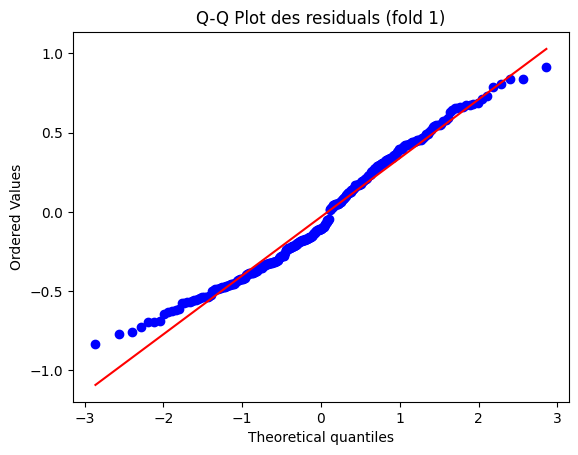


### Test de Kolmogorov-Smirnov ###
Kolmogorov-Smirnov Test: Stat=0.0852, p-value=0.0161

### Test d'Anderson-Darling ###
Anderson-Darling Test: Stat=2.6779
Critical Values: [0.569 0.648 0.778 0.907 1.079]
Significance Levels: [15.  10.   5.   2.5  1. ]

### Histogram des residuals ###


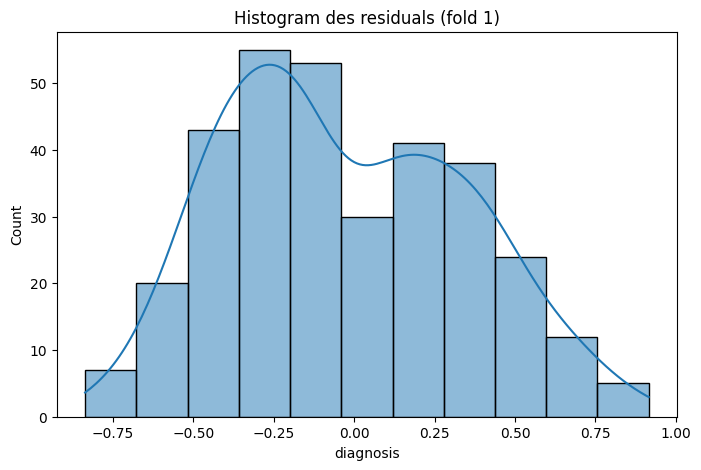


### Box Plot des residuals ###


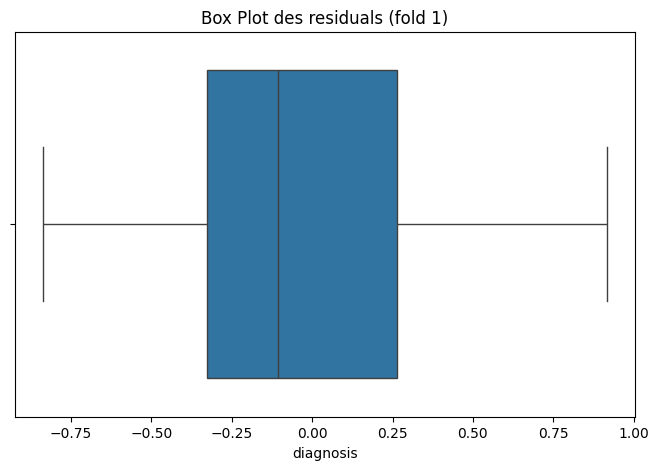


### Test d'Homoscedasticité (Breusch-Pagan) ###
Statistique de Breusch-Pagan: 288.6778, p-value: 0.5109
Aucune hétéroscédasticité détectée (variance constante).

### Test d'Indépendance (Durbin-Watson) ###
Statistique de Durbin-Watson: 2.0379
Aucune autocorrélation détectée.

### Vérifications pour le pli (fold) 2 ###

### Test de Normalité (Shapiro-Wilk) ###
Statistique de Shapiro-Wilk: 0.9644, p-value: 0.0000
Les residuals ne suivent pas une distribution normale.

### Q-Q Plot des residuals ###


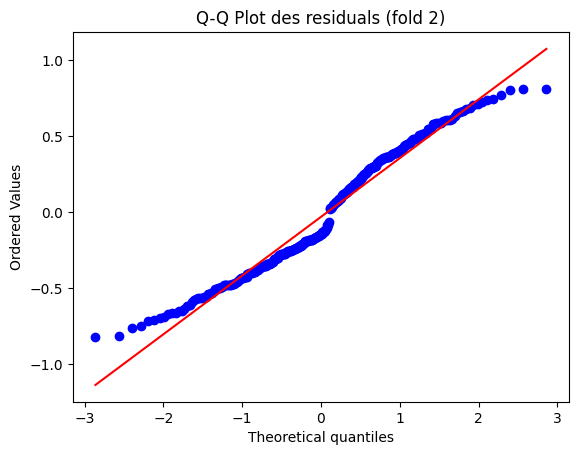


### Test de Kolmogorov-Smirnov ###
Kolmogorov-Smirnov Test: Stat=0.1180, p-value=0.0002

### Test d'Anderson-Darling ###
Anderson-Darling Test: Stat=4.4352
Critical Values: [0.569 0.648 0.778 0.907 1.079]
Significance Levels: [15.  10.   5.   2.5  1. ]

### Histogram des residuals ###


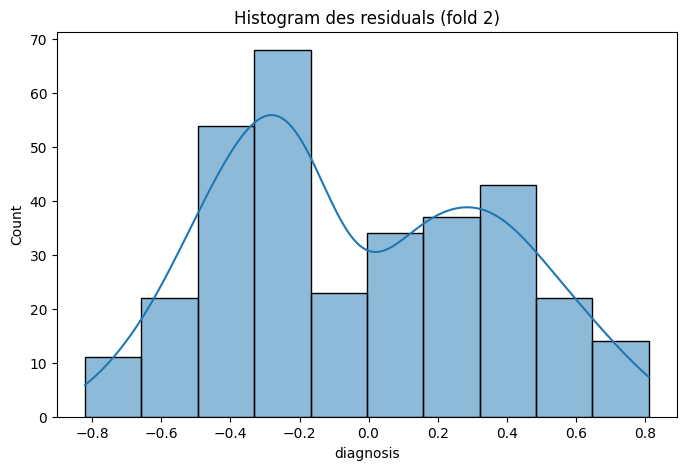


### Box Plot des residuals ###


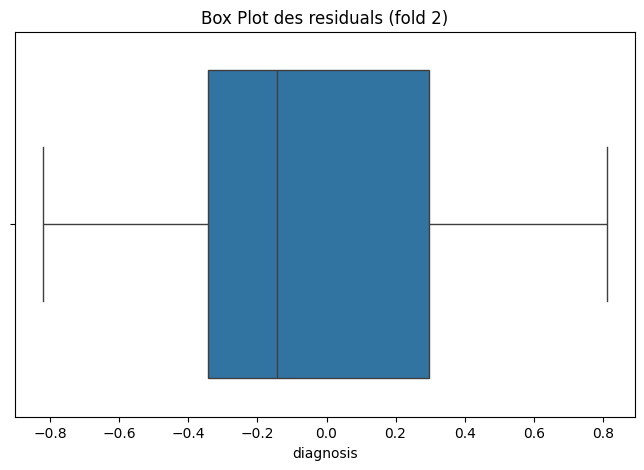


### Test d'Homoscedasticité (Breusch-Pagan) ###
Statistique de Breusch-Pagan: 290.7279, p-value: 0.4769
Aucune hétéroscédasticité détectée (variance constante).

### Test d'Indépendance (Durbin-Watson) ###
Statistique de Durbin-Watson: 2.0432
Aucune autocorrélation détectée.

### Vérifications pour le pli (fold) 3 ###

### Test de Normalité (Shapiro-Wilk) ###
Statistique de Shapiro-Wilk: 0.9625, p-value: 0.0000
Les residuals ne suivent pas une distribution normale.

### Q-Q Plot des residuals ###


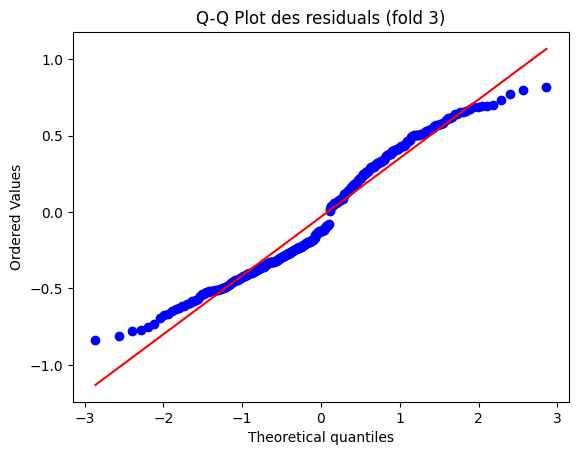


### Test de Kolmogorov-Smirnov ###
Kolmogorov-Smirnov Test: Stat=0.1115, p-value=0.0005

### Test d'Anderson-Darling ###
Anderson-Darling Test: Stat=4.7090
Critical Values: [0.569 0.648 0.778 0.907 1.079]
Significance Levels: [15.  10.   5.   2.5  1. ]

### Histogram des residuals ###


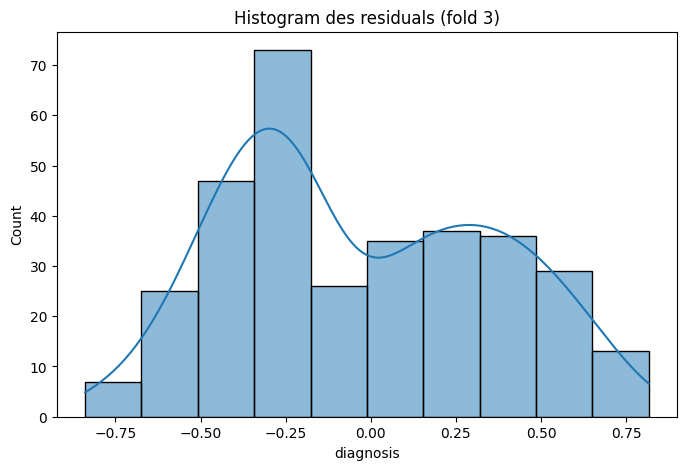


### Box Plot des residuals ###


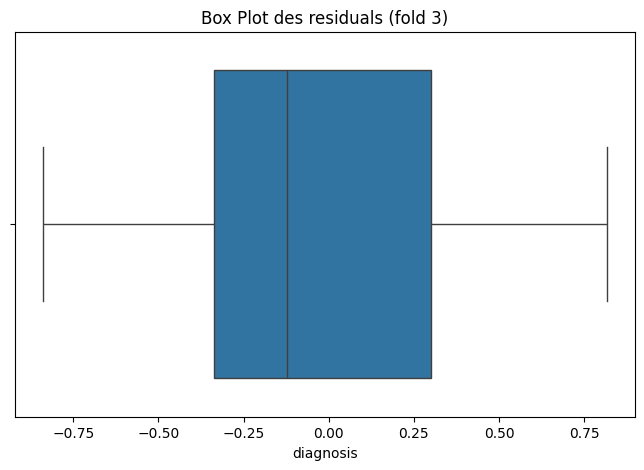


### Test d'Homoscedasticité (Breusch-Pagan) ###
Statistique de Breusch-Pagan: 285.7368, p-value: 0.5597
Aucune hétéroscédasticité détectée (variance constante).

### Test d'Indépendance (Durbin-Watson) ###
Statistique de Durbin-Watson: 1.9183
Aucune autocorrélation détectée.

### Vérifications pour le pli (fold) 4 ###

### Test de Normalité (Shapiro-Wilk) ###
Statistique de Shapiro-Wilk: 0.9824, p-value: 0.0005
Les residuals ne suivent pas une distribution normale.

### Q-Q Plot des residuals ###


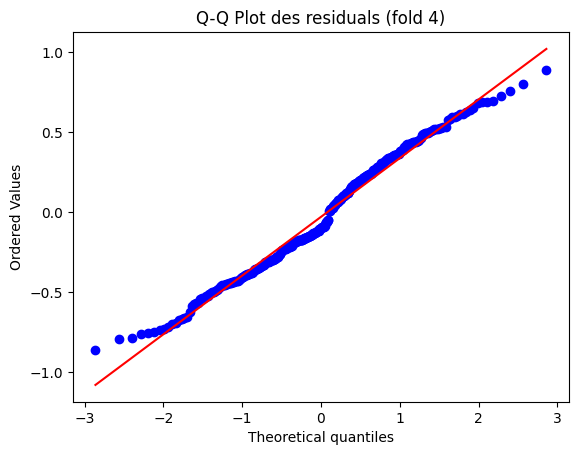


### Test de Kolmogorov-Smirnov ###
Kolmogorov-Smirnov Test: Stat=0.0860, p-value=0.0147

### Test d'Anderson-Darling ###
Anderson-Darling Test: Stat=2.1499
Critical Values: [0.569 0.648 0.778 0.907 1.079]
Significance Levels: [15.  10.   5.   2.5  1. ]

### Histogram des residuals ###


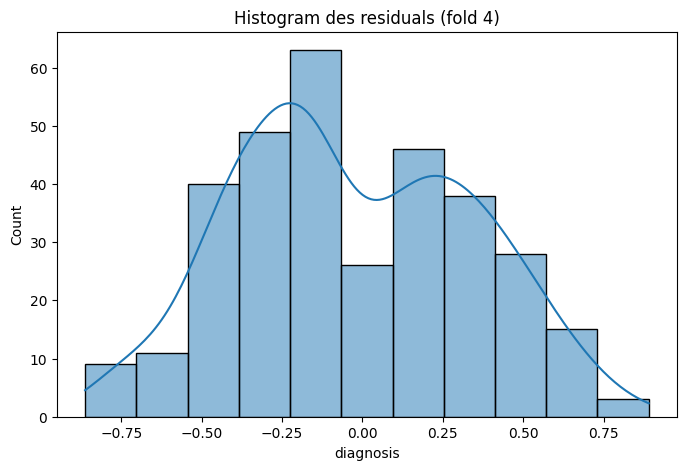


### Box Plot des residuals ###


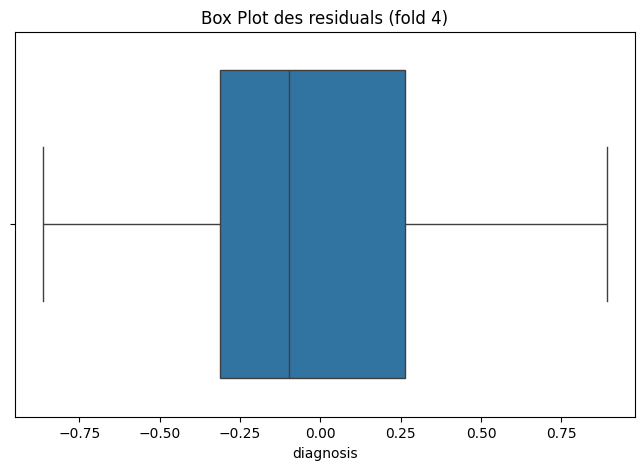


### Test d'Homoscedasticité (Breusch-Pagan) ###
Statistique de Breusch-Pagan: 295.9717, p-value: 0.3921
Aucune hétéroscédasticité détectée (variance constante).

### Test d'Indépendance (Durbin-Watson) ###
Statistique de Durbin-Watson: 1.9852
Aucune autocorrélation détectée.

### Vérifications pour le pli (fold) 5 ###

### Test de Normalité (Shapiro-Wilk) ###
Statistique de Shapiro-Wilk: 0.9783, p-value: 0.0001
Les residuals ne suivent pas une distribution normale.

### Q-Q Plot des residuals ###


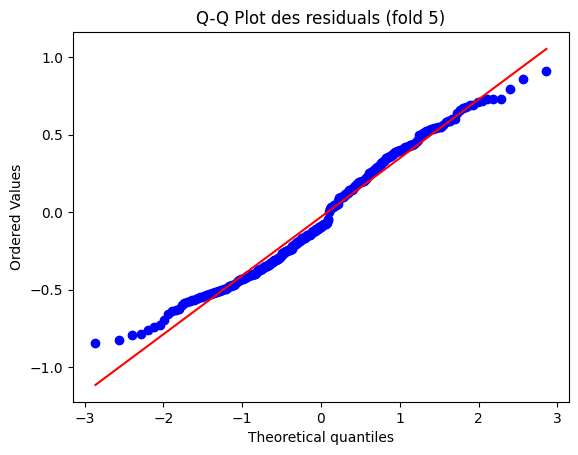


### Test de Kolmogorov-Smirnov ###
Kolmogorov-Smirnov Test: Stat=0.0732, p-value=0.0566

### Test d'Anderson-Darling ###
Anderson-Darling Test: Stat=2.4444
Critical Values: [0.569 0.648 0.778 0.907 1.079]
Significance Levels: [15.  10.   5.   2.5  1. ]

### Histogram des residuals ###


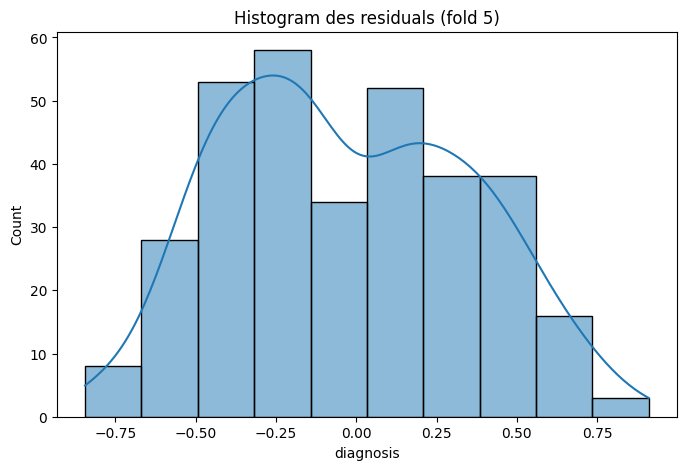


### Box Plot des residuals ###


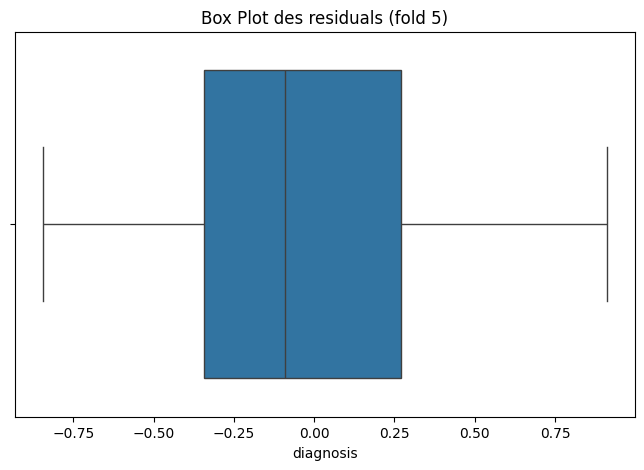


### Test d'Homoscedasticité (Breusch-Pagan) ###
Statistique de Breusch-Pagan: 300.0562, p-value: 0.3298
Aucune hétéroscédasticité détectée (variance constante).

### Test d'Indépendance (Durbin-Watson) ###
Statistique de Durbin-Watson: 2.0137
Aucune autocorrélation détectée.

### Résultats pour les 5 plis (5 folds) ###
Train ROC AUC moyen: 0.8852
Validation ROC AUC moyen: 0.8190


In [24]:
# Import des bibliothèques nécessaires
from scipy.stats import shapiro, probplot, kstest, anderson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tools import add_constant

# Vérifier les colonnes présentes dans df_merged_rois
print("Colonnes dans df_merged_rois:", df_merged_rois.columns)

# Sélectionner les noms exacts des colonnes
columns_merged = ['sex', 'age']

# Supprimer les colonnes participant_id, run, session de df_rois
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]

# Vérifier la liste des colonnes à inclure à partir de df_rois
print("Colonnes de df_rois à inclure:", rois_columns)

# Combiner les colonnes de df_merged_rois et df_rois
X = pd.concat(
    [df_merged_rois[columns_merged],  # Sélectionner les colonnes exactes de df_merged_rois
     df_rois[rois_columns]],          # Colonnes numériques de df_rois
    axis=1
)

# Colonne cible
y = df_merged_rois['diagnosis']

# Définir les caractéristiques numériques et catégoriques
numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

# Pipeline pour traiter les colonnes catégoriques et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

# Initialiser le modèle LogisticRegression
logreg_classifier = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    multi_class='auto'
)

# Créer un pipeline pour traiter les données et entraîner le modèle
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_classifier)
])

# Définir une grille de paramètres pour GridSearchCV avec des paramètres spécifiques à Logistic Regression
param_grid = {
    'classifier__penalty': ['l1', 'l2'],  # Régularisation (L1, L2)
    'classifier__C': [0.1, 1, 10],  # Inverse de la régularisation
    'classifier__solver': ['liblinear', 'saga'],  # Méthodes d'optimisation compatibles
}

# Initialiser StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#############################################################
# Enregistrer l'heure de début
start_time = time.time()
print("GridSearchCV commence à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

# Utiliser GridSearchCV pour trouver les paramètres optimaux
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=stratified_kfold,
    scoring='roc_auc',  # Utiliser 'roc_auc' au lieu de 'f1' pour les données déséquilibrées
    n_jobs=-1,
    verbose=1
)

# Exécuter GridSearchCV pour trouver les paramètres optimaux
grid_search.fit(X, y)

# Enregistrer l'heure de fin
end_time = time.time()
print("GridSearchCV se termine à :", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))
print("Temps total d'exécution : {:.2f} secondes".format(end_time - start_time))

# Afficher les résultats de GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")

# Utiliser les meilleurs paramètres trouvés par GridSearchCV
best_params = grid_search.best_params_
print("Utilisation des meilleurs paramètres pour entraîner le modèle:")
print(best_params)

# Mettre à jour les paramètres du modèle avec les meilleurs paramètres
pipeline.set_params(**best_params)

# Initialiser StratifiedKFold avec k=5
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Variables pour stocker les performances
train_roc_auc_scores = []
val_roc_auc_scores = []
train_classification_reports = []
val_classification_reports = []

# Boucle sur chaque pli de validation croisée
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    # Diviser les données en train et validation
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Entraîner le pipeline sur les données d'entraînement
    pipeline.fit(X_train, y_train)

    # Prédire sur les données d'entraînement
    y_train_pred = pipeline.predict(X_train)
    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]  # Probabilité pour la classe positive

    # Prédire sur les données de validation
    y_val_pred = pipeline.predict(X_val)
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]  # Probabilité pour la classe positive

    # Calculer le score ROC AUC pour train et validation
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)
    train_roc_auc_scores.append(train_roc_auc)
    val_roc_auc_scores.append(val_roc_auc)

    # ==============================================================

    # Vérifier les conditions après l'entraînement
    print(f"\n### Vérifications pour le pli (fold) {fold} ###")

    # Calculer les residuals pour les données d'entraînement
    residuals_train = y_train - y_train_pred_proba

    # 1. Vérifier la normalité des residuals (Shapiro-Wilk)
    print("\n### Test de Normalité (Shapiro-Wilk) ###")
    stat, p_value = shapiro(residuals_train)
    print(f"Statistique de Shapiro-Wilk: {stat:.4f}, p-value: {p_value:.4f}")
    if p_value > 0.05:
        print("Les residuals suivent une distribution normale.")
    else:
        print("Les residuals ne suivent pas une distribution normale.")

    # Tracer le Q-Q plot
    print("\n### Q-Q Plot des residuals ###")
    probplot(residuals_train, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot des residuals (fold {fold})")
    plt.show()

    # 1.1 Vérification supplémentaire - Kolmogorov-Smirnov
    print("\n### Test de Kolmogorov-Smirnov ###")
    ks_stat, ks_p_value = kstest(residuals_train, 'norm', args=(residuals_train.mean(), residuals_train.std()))
    print(f"Kolmogorov-Smirnov Test: Stat={ks_stat:.4f}, p-value={ks_p_value:.4f}")

    # 1.2 Vérification supplémentaire - Anderson-Darling
    print("\n### Test d'Anderson-Darling ###")
    ad_result = anderson(residuals_train, dist='norm')
    print(f"Anderson-Darling Test: Stat={ad_result.statistic:.4f}")
    print("Critical Values:", ad_result.critical_values)
    print("Significance Levels:", ad_result.significance_level)

    # Tracer Histogram des residuals
    print("\n### Histogram des residuals ###")
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals_train, kde=True)
    plt.title(f"Histogram des residuals (fold {fold})")
    plt.show()

    # Tracer Box Plot des residuals
    print("\n### Box Plot des residuals ###")
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=residuals_train)
    plt.title(f"Box Plot des residuals (fold {fold})")
    plt.show()

    # ==============================================================

    # 2. Vérifier l'homoscedasticité (Breusch-Pagan)
    print("\n### Test d'Homoscedasticité (Breusch-Pagan) ###")
    X_train_with_constant = add_constant(X_train)
    bp_test = het_breuschpagan(residuals_train, X_train_with_constant)
    print(f"Statistique de Breusch-Pagan: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")
    if bp_test[1] > 0.05:
        print("Aucune hétéroscédasticité détectée (variance constante).")
    else:
        print("Hétéroscédasticité détectée (variance non constante).")

    # 3. Vérifier l'indépendance des residuals (Durbin-Watson)
    print("\n### Test d'Indépendance (Durbin-Watson) ###")
    dw_stat = durbin_watson(residuals_train)
    print(f"Statistique de Durbin-Watson: {dw_stat:.4f}")
    if 1.5 <= dw_stat <= 2.5:
        print("Aucune autocorrélation détectée.")
    else:
        print("Autocorrélation détectée dans les residuals.")

# Calculer les scores moyens pour train et validation
mean_train_roc_auc = sum(train_roc_auc_scores) / len(train_roc_auc_scores)
mean_val_roc_auc = sum(val_roc_auc_scores) / len(val_roc_auc_scores)

print(f"\n### Résultats pour les 5 plis (5 folds) ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

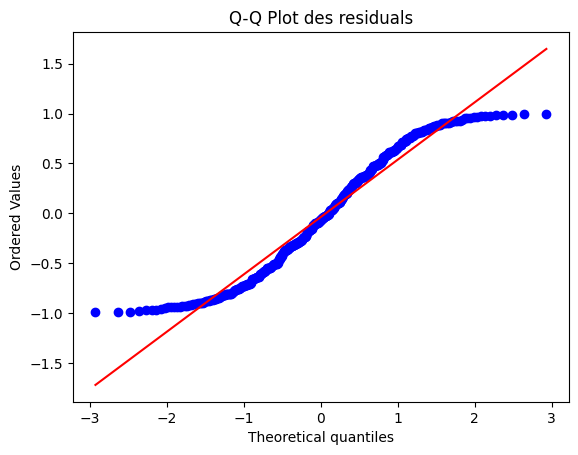


### Test de Kolmogorov-Smirnov ###
Kolmogorov-Smirnov Test: Stat=0.0711, p-value=0.0300

### Test d'Anderson-Darling ###
Anderson-Darling Test: Stat=4.6975
Critical Values: [0.571 0.65  0.78  0.909 1.082]
Significance Levels: [15.  10.   5.   2.5  1. ]

### Histogram des residuals ###


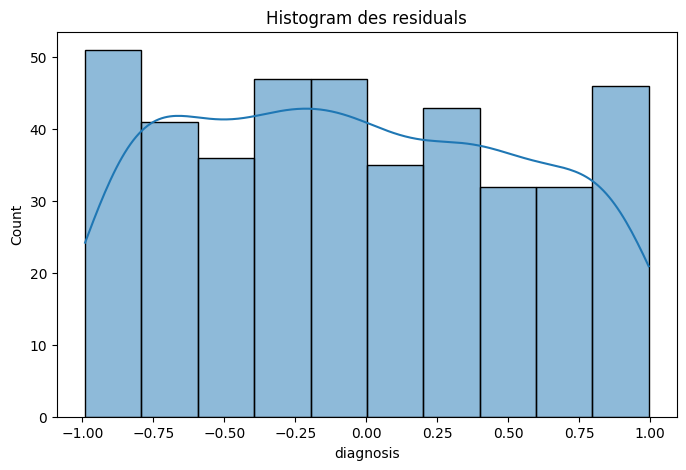


### Box Plot des residuals ###


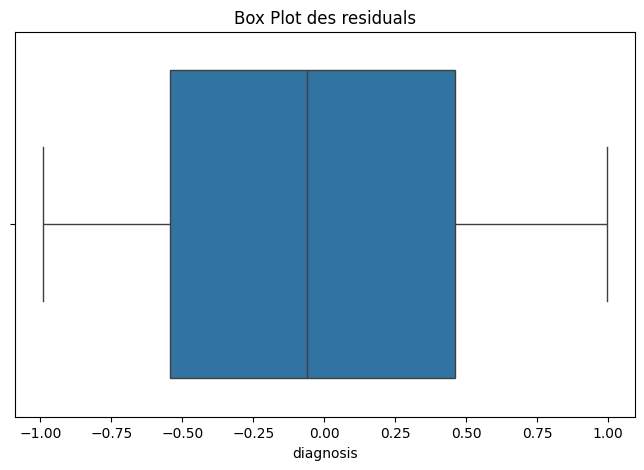


### Test d'Homoscedasticité (Breusch-Pagan) ###
Statistique de Breusch-Pagan: 283.8784, p-value: 0.5903
Aucune hétéroscédasticité détectée (variance constante).

### Test d'Indépendance (Durbin-Watson) ###
Statistique de Durbin-Watson: 2.0794
Aucune autocorrélation détectée.


In [13]:
# Import des bibliothèques nécessaires
from scipy.stats import shapiro, probplot, kstest, anderson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tools import add_constant
import seaborn as sns
import matplotlib.pyplot as plt

# Vérifier les colonnes présentes dans df_merged_rois
print("Colonnes dans df_merged_rois:", df_merged_rois.columns)

# Sélectionner les noms exacts des colonnes
columns_merged = ['sex', 'age']

# Supprimer les colonnes participant_id, run, session de df_rois
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]

# Vérifier la liste des colonnes à inclure à partir de df_rois
print("Colonnes de df_rois à inclure:", rois_columns)

# Combiner les colonnes de df_merged_rois et df_rois
X = pd.concat(
    [df_merged_rois[columns_merged],  # Sélectionner les colonnes exactes de df_merged_rois
     df_rois[rois_columns]],          # Colonnes numériques de df_rois
    axis=1
)

# Colonne cible
y = df_merged_rois['diagnosis']

# Prédire les probabilités factices (simuler un modèle Logistic Regression)
# Ici, on suppose que les probabilités sont des valeurs aléatoires pour simuler un exemple
import numpy as np
np.random.seed(42)
y_pred_proba = np.random.uniform(0, 1, len(y))

# Calculer les residuals
residuals = y - y_pred_proba

# ==============================================================
# 1. Vérifier la normalité des residuals
print("\n### Test de Normalité (Shapiro-Wilk) ###")
stat, p_value = shapiro(residuals)
print(f"Statistique de Shapiro-Wilk: {stat:.4f}, p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Les residuals suivent une distribution normale.")
else:
    print("Les residuals ne suivent pas une distribution normale.")

# Tracer le Q-Q plot
print("\n### Q-Q Plot des residuals ###")
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot des residuals")
plt.show()

# Vérification supplémentaire - Kolmogorov-Smirnov
print("\n### Test de Kolmogorov-Smirnov ###")
ks_stat, ks_p_value = kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(f"Kolmogorov-Smirnov Test: Stat={ks_stat:.4f}, p-value={ks_p_value:.4f}")

# Vérification supplémentaire - Anderson-Darling
print("\n### Test d'Anderson-Darling ###")
ad_result = anderson(residuals, dist='norm')
print(f"Anderson-Darling Test: Stat={ad_result.statistic:.4f}")
print("Critical Values:", ad_result.critical_values)
print("Significance Levels:", ad_result.significance_level)

# Tracer Histogram des residuals
print("\n### Histogram des residuals ###")
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Histogram des residuals")
plt.show()

# Tracer Box Plot des residuals
print("\n### Box Plot des residuals ###")
plt.figure(figsize=(8, 5))
sns.boxplot(x=residuals)
plt.title("Box Plot des residuals")
plt.show()

# ==============================================================
# 2. Vérifier l'homoscedasticité (Breusch-Pagan)
print("\n### Test d'Homoscedasticité (Breusch-Pagan) ###")
X_with_constant = add_constant(X)
bp_test = het_breuschpagan(residuals, X_with_constant)
print(f"Statistique de Breusch-Pagan: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")
if bp_test[1] > 0.05:
    print("Aucune hétéroscédasticité détectée (variance constante).")
else:
    print("Hétéroscédasticité détectée (variance non constante).")

# ==============================================================
# 3. Vérifier l'indépendance des residuals (Durbin-Watson)
print("\n### Test d'Indépendance (Durbin-Watson) ###")
dw_stat = durbin_watson(residuals)
print(f"Statistique de Durbin-Watson: {dw_stat:.4f}")
if 1.5 <= dw_stat <= 2.5:
    print("Aucune autocorrélation détectée.")
else:
    print("Autocorrélation détectée dans les residuals.")

## LogisticRegression - Baseline (ElasticNet + PCA-Optuna)

In [40]:
###############################################################################
# Étape 1 : Prétraitement des données
###############################################################################

print("Colonnes dans df_merged_rois:", df_merged_rois.columns)
columns_merged = ['sex', 'age']
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]
print("Colonnes de df_rois à inclure:", rois_columns)

X = pd.concat(
    [df_merged_rois[columns_merged], df_rois[rois_columns]], axis=1
)
y = df_merged_rois['diagnosis']

numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

###############################################################################
# Étape 2 : Fonction objective pour Optuna
###############################################################################

def objective(trial):
    # Suggérer les hyperparamètres pour PCA
    n_components = trial.suggest_int('n_components', 5, min(50, X.shape[1]))  # Max components = min(50, n_features)

    # Suggérer les hyperparamètres pour ElasticNet
    C = trial.suggest_loguniform('C', 0.01, 1)
    l1_ratio = trial.suggest_float('l1_ratio', 0.1, 1.0)

    # Construire PCA et LogisticRegression
    pca = PCA(n_components=n_components, random_state=42)
    logreg_classifier = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        max_iter=1000,
        class_weight='balanced',
        random_state=42,
        C=C,
        l1_ratio=l1_ratio
    )

    # Construire le pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('classifier', logreg_classifier)
    ])

    # Validation croisée
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []

    for train_index, val_index in stratified_kfold.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        pipeline.fit(X_train, y_train)
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]
        roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    return np.mean(roc_auc_scores)

###############################################################################
# Étape 3 : Optimisation avec Optuna
###############################################################################

study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
print("\n### Début de l'optimisation avec Optuna ###")
study.optimize(objective, n_trials=100)

# Meilleurs paramètres trouvés
best_params = study.best_params
best_score = study.best_value

print("\n### Résultats Optuna ###")
print(f"Meilleurs paramètres: {best_params}")
print(f"Meilleur ROC AUC moyen: {best_score:.4f}")

###############################################################################
# Étape 4 : Appliquer les meilleurs paramètres
###############################################################################

pca = PCA(n_components=best_params['n_components'], random_state=42)
logreg_classifier = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    C=best_params['C'],
    l1_ratio=best_params['l1_ratio']
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', logreg_classifier)
])

###############################################################################
# Étape 5 : Évaluation avec validation croisée (stratifiée)
###############################################################################

train_roc_auc_scores = []
val_roc_auc_scores = []
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    pipeline.fit(X_train, y_train)

    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    train_roc_auc_scores.append(roc_auc_score(y_train, y_train_pred_proba))
    val_roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc_scores[-1]:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc_scores[-1]:.4f}")

mean_train_roc_auc = np.mean(train_roc_auc_scores)
mean_val_roc_auc = np.mean(val_roc_auc_scores)

print(f"\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

###############################################################################
# Étape 6 : Évaluer sur les données de test
###############################################################################

X_test = pd.concat(
    [test_merged_rois[columns_merged],
     test_rois[rois_columns]],
    axis=1
)
y_test = test_merged_rois['diagnosis']

# Prédire directement sur les données de test en passant par le pipeline
y_test_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculer le score sur les données de test
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(
    y_test,
    pipeline.predict(X_test),
    target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

###############################################################################
# Étape 7 : Afficher la liste des features et leurs coefficients
###############################################################################

# Étape 1 : Entraîner le pipeline
pipeline.fit(X, y)

# Étape 2: Extraire les noms des composantes PCA
# Nombre de composantes PCA utilisées
n_components = pipeline.named_steps['pca'].n_components_
pca_features = [f"PCA_{i+1}" for i in range(n_components)]

# Étape 3: Extraire les coefficients du modèle Logistic Regression
coefficients = pipeline.named_steps['classifier'].coef_[0]  # Coefficients pour chaque composante PCA

# Étape 4: Combiner les composantes PCA et leurs coefficients
features_with_coefficients = pd.DataFrame({
    'Feature': pca_features,
    'Coefficient': coefficients
})

# Étape 5: Filtrer uniquement les composantes avec Coefficient ≠ 0
features_with_nonzero_coefficients = features_with_coefficients[features_with_coefficients['Coefficient'] != 0]

# Étape 6: Trier les composantes par l'ordre alphabetique
features_with_nonzero_coefficients_sorted = features_with_nonzero_coefficients.sort_values(by='Feature')

# Étape 7: Afficher les résultats
print("\n### Liste des composantes PCA avec Coefficient ≠ 0 ###")
print(features_with_nonzero_coefficients_sorted)

print(f"\n### Nombre total de composantes PCA avec Coefficient ≠ 0: {len(features_with_nonzero_coefficients_sorted)} ###")

[I 2025-01-12 18:01:18,369] A new study created in memory with name: no-name-11958435-8d76-40b2-95a2-8968e73c648e


Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

[I 2025-01-12 18:01:19,534] Trial 0 finished with value: 0.808280529333161 and parameters: {'n_components': 22, 'C': 0.7969454818643931, 'l1_ratio': 0.7587945476302645}. Best is trial 0 with value: 0.808280529333161.
[I 2025-01-12 18:01:22,471] Trial 1 finished with value: 0.8130295127663547 and parameters: {'n_components': 32, 'C': 0.020513382630874502, 'l1_ratio': 0.2403950683025824}. Best is trial 1 with value: 0.8130295127663547.
[I 2025-01-12 18:01:25,933] Trial 2 finished with value: 0.7917049585470638 and parameters: {'n_components': 7, 'C': 0.5399484409787431, 'l1_ratio': 0.6410035105688879}. Best is trial 1 with value: 0.8130295127663547.
[I 2025-01-12 18:01:26,952] Trial 3 finished with value: 0.7463226863226863 and parameters: {'n_components': 37, 'C': 0.010994335574766204, 'l1_ratio': 0.9729188669457949}. Best is trial 1 with value: 0.8130295127663547.
[I 2025-01-12 18:01:28,243] Trial 4 finished with value: 0.8181876373981636 and parameters: {'n_components': 43, 'C': 0.026


### Résultats Optuna ###
Meilleurs paramètres: {'n_components': 49, 'C': 0.106483580230985, 'l1_ratio': 0.412836653131155}
Meilleur ROC AUC moyen: 0.8305

### Résultats pour le pli (fold) 1 ###
Train ROC AUC: 0.9055
Validation ROC AUC: 0.7644

### Résultats pour le pli (fold) 2 ###
Train ROC AUC: 0.8803
Validation ROC AUC: 0.8941

### Résultats pour le pli (fold) 3 ###
Train ROC AUC: 0.8823
Validation ROC AUC: 0.8882

### Résultats pour le pli (fold) 4 ###
Train ROC AUC: 0.9110
Validation ROC AUC: 0.7748

### Résultats pour le pli (fold) 5 ###
Train ROC AUC: 0.8891
Validation ROC AUC: 0.8312

### Résultats finaux ###
Train ROC AUC moyen: 0.8937
Validation ROC AUC moyen: 0.8305

### Évaluation sur les données de test ###
Test ROC AUC: 0.8125
Rapport de classification sur les données de test:
               precision    recall  f1-score   support

      control       0.72      0.76      0.74        55
schizophrenia       0.71      0.67      0.69        48

     accuracy                 

## BaggingClassifier & LogistiqueReg (ElasticNet) - Optuna

In [38]:
# NE PAS LANCER (>2h30)
import optuna
from sklearn.ensemble import BaggingClassifier

# Étape 1: Vérifier les colonnes présentes dans df_merged_rois
print("Colonnes dans df_merged_rois:", df_merged_rois.columns)

# Étape 2: Sélectionner les noms exacts des colonnes
columns_merged = ['sex', 'age']

# Étape 3: Supprimer les colonnes inutiles de df_rois
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]

# Vérifier les colonnes sélectionnées
print("Colonnes de df_rois à inclure:", rois_columns)

# Étape 4: Combiner les colonnes pour créer X (features) et y (target)
X = pd.concat(
    [df_merged_rois[columns_merged],  # Colonnes exactes de df_merged_rois
     df_rois[rois_columns]],          # Colonnes numériques de df_rois
    axis=1
)
y = df_merged_rois['diagnosis']

# Étape 5: Définir les colonnes numériques et catégoriques
numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

# Préprocesseur pour traiter les colonnes catégoriques et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

# Étape 6: Fonction objective pour Optuna (optimisation pour BaggingClassifier uniquement)
def objective(trial):
    # Suggérer des hyperparamètres pour BaggingClassifier
    n_estimators = trial.suggest_int('n_estimators', 10, 100)  # Nombre d'estimateurs
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0)  # Fraction des échantillons pour chaque sac

    # Définir le classifieur ElasticNet avec les meilleurs hyperparamètres connus
    logreg_classifier = LogisticRegression(
        penalty='elasticnet',      # Régularisation ElasticNet
        solver='saga',             # Solver compatible avec ElasticNet
        max_iter=1000,             # Nombre maximal d'itérations
        class_weight='balanced',   # Gérer les données déséquilibrées
        random_state=42,
        C=0.05994093201724051,     # Meilleure valeur pour C
        l1_ratio=0.4163912810902287  # Meilleure valeur pour l1_ratio
    )

    # Emballer ElasticNet dans BaggingClassifier
    bagging_classifier = BaggingClassifier(
        estimator=logreg_classifier,  # Utiliser ElasticNet comme classifieur de base
        n_estimators=n_estimators,
        max_samples=max_samples,
        random_state=42,
        n_jobs=-1
    )

    # Pipeline mis à jour
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', bagging_classifier)
    ])

    # Validation croisée avec StratifiedKFold
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []

    for train_index, val_index in stratified_kfold.split(X, y):
        # Diviser les données en train et validation
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Entraîner le pipeline
        pipeline.fit(X_train, y_train)

        # Prédictions de probabilité pour le calcul de ROC AUC
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]
        roc_auc = roc_auc_score(y_val, y_val_pred_proba)
        roc_auc_scores.append(roc_auc)

    # Retourner la moyenne du ROC AUC
    return np.mean(roc_auc_scores)


# Créer une étude Optuna
study = optuna.create_study(
    direction='maximize',          # Maximiser le score ROC AUC
    sampler=optuna.samplers.TPESampler(seed=42)  # Sampler TPE pour optimiser efficacement
)

# Lancer l'étude avec 100 essais
print("\n### Début de l'optimisation avec Optuna ###")
study.optimize(objective, n_trials=100)

# Meilleurs paramètres trouvés
best_params = study.best_params
best_score = study.best_value

print("\n### Résultats Optuna ###")
print(f"Meilleurs paramètres pour BaggingClassifier: {best_params}")
print(f"Meilleur ROC AUC moyen: {best_score:.4f}")

# Utiliser les meilleurs paramètres pour mettre à jour le pipeline
logreg_classifier = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    C=0.05994093201724051,           # Meilleure valeur pour C
    l1_ratio=0.4163912810902287      # Meilleure valeur pour l1_ratio
)

bagging_classifier = BaggingClassifier(
    estimator=logreg_classifier,
    n_estimators=best_params['n_estimators'],  # Nombre optimal d'estimateurs
    max_samples=best_params['max_samples'],    # Taille optimale de l'échantillon
    random_state=42,
    n_jobs=-1
)

pipeline.set_params(classifier=bagging_classifier)

###############################################################################

# Étape 10: Évaluation avec validation croisée (stratifiée)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_roc_auc_scores = []
val_roc_auc_scores = []

for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    # Diviser les données en train et validation
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Entraîner le pipeline
    pipeline.fit(X_train, y_train)

    # Prédictions sur train et validation
    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    # Calculer AUC
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)

    train_roc_auc_scores.append(train_roc_auc)
    val_roc_auc_scores.append(val_roc_auc)

    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc:.4f}")

# Résultats moyens sur les plis
mean_train_roc_auc = np.mean(train_roc_auc_scores)
mean_val_roc_auc = np.mean(val_roc_auc_scores)

print(f"\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

###############################################################################

# Étape : Évaluer sur les données de test
X_test = pd.concat(
    [test_merged_rois[columns_merged],
     test_rois[rois_columns]],
    axis=1
)
y_test = test_merged_rois['diagnosis']

# Prétraiter et prédire
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_proba = pipeline.named_steps['classifier'].predict_proba(X_test_processed)[:, 1]

# Calculer le score sur les données de test
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(
    y_test,
    pipeline.named_steps['classifier'].predict(X_test_processed),
    target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")

###############################################################################

# Étape 1 : Entraîner le pipeline
pipeline.fit(X, y)

# Étape 2: Extraire les noms des colonnes après preprocessing
# Pour les colonnes numériques
num_features_after_scaling = numerical_features

# Liste complète des features après preprocessing
final_features = num_features_after_scaling

# Étape 3: Extraire les coefficients du modèle Logistic Regression (tous les estimators)
bagging_classifier = pipeline.named_steps['classifier']  # Récupérer le BaggingClassifier

# Vérifier si le classifieur est bien un BaggingClassifier
if isinstance(bagging_classifier, BaggingClassifier):
    unique_features_indices = set()  # Ensemble pour stocker les indices uniques des features

    # Parcourir chaque LogisticRegression dans le BaggingClassifier
    for estimator in bagging_classifier.estimators_:
        # Vérifier si l'estimateur a l'attribut coef_
        if hasattr(estimator, 'coef_'):
            # Trouver les indices des features avec des coefficients ≠ 0
            nonzero_indices = np.where(estimator.coef_[0] != 0)[0]
            # Ajouter ces indices au set unique_features_indices
            unique_features_indices.update(nonzero_indices)

    # Convertir les indices uniques en noms de features
    unique_features = [final_features[i] for i in sorted(unique_features_indices)]

    # Étape 4: Afficher les résultats
    print("\n### Liste des features uniques utilisées dans le BaggingClassifier ###")
    for feature in unique_features:
        print(feature)

    print(f"\n### Nombre total de features uniques utilisées : {len(unique_features)} ###")
else:
    print("Le classifieur n'est pas un BaggingClassifier.")

[I 2025-01-11 23:22:49,681] A new study created in memory with name: no-name-1b8b985d-7a6b-442f-89c8-4b295719e265


Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

[I 2025-01-11 23:25:22,259] Trial 0 finished with value: 0.8289501702659597 and parameters: {'n_estimators': 44, 'max_samples': 0.9753571532049581}. Best is trial 0 with value: 0.8289501702659597.
[I 2025-01-11 23:29:03,836] Trial 1 finished with value: 0.8258366021523915 and parameters: {'n_estimators': 76, 'max_samples': 0.7993292420985183}. Best is trial 0 with value: 0.8289501702659597.
[I 2025-01-11 23:30:14,625] Trial 2 finished with value: 0.8237905369484316 and parameters: {'n_estimators': 24, 'max_samples': 0.5779972601681014}. Best is trial 0 with value: 0.8289501702659597.
[I 2025-01-11 23:30:57,372] Trial 3 finished with value: 0.8266789516789516 and parameters: {'n_estimators': 15, 'max_samples': 0.9330880728874675}. Best is trial 0 with value: 0.8289501702659597.
[I 2025-01-11 23:34:02,110] Trial 4 finished with value: 0.8275157693578746 and parameters: {'n_estimators': 64, 'max_samples': 0.8540362888980227}. Best is trial 0 with value: 0.8289501702659597.
[I 2025-01-11 2


### Résultats Optuna ###
Meilleurs paramètres pour BaggingClassifier: {'n_estimators': 21, 'max_samples': 0.9581924057915288}
Meilleur ROC AUC moyen: 0.8309

### Résultats pour le pli (fold) 1 ###
Train ROC AUC: 0.9096
Validation ROC AUC: 0.7805

### Résultats pour le pli (fold) 2 ###
Train ROC AUC: 0.8916
Validation ROC AUC: 0.9037

### Résultats pour le pli (fold) 3 ###
Train ROC AUC: 0.8945
Validation ROC AUC: 0.8888

### Résultats pour le pli (fold) 4 ###
Train ROC AUC: 0.9177
Validation ROC AUC: 0.7838

### Résultats pour le pli (fold) 5 ###
Train ROC AUC: 0.9022
Validation ROC AUC: 0.7976

### Résultats finaux ###
Train ROC AUC moyen: 0.9031
Validation ROC AUC moyen: 0.8309

### Évaluation sur les données de test ###
Test ROC AUC: 0.8193
Rapport de classification sur les données de test:

### Liste des features avec Coefficient ≠ 0 ###
             Feature  Coefficient
5             WM_Vol         0.02
1                age        -0.07
148  l3thVen_CSF_Vol         0.01
6     l3t

## BaggingClassifier & LogistiqueReg (ElasticNet + PCA) - Optuna

In [59]:
import optuna
from sklearn.ensemble import BaggingClassifier

###############################################################################
# Étape 1 : Prétraitement des données
###############################################################################

print("Colonnes dans df_merged_rois:", df_merged_rois.columns)
columns_merged = ['sex', 'age']
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]
print("Colonnes de df_rois à inclure:", rois_columns)

X = pd.concat(
    [df_merged_rois[columns_merged], df_rois[rois_columns]], axis=1
)
y = df_merged_rois['diagnosis']

numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

###############################################################################
# Étape 2 : Fonction objective pour Optuna
###############################################################################

def objective(trial):
    # Suggérer les hyperparamètres pour PCA
    n_components = trial.suggest_int('n_components', 5, min(200, X.shape[1]))  # Max components = min(200, n_features)

    # Suggérer les hyperparamètres pour ElasticNet
    C = trial.suggest_loguniform('C', 0.01, 1)
    l1_ratio = trial.suggest_float('l1_ratio', 0.1, 1.0)

    # Suggérer les hyperparamètres pour BaggingClassifier
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0)

    # Construire PCA et LogisticRegression
    pca = PCA(n_components=n_components, random_state=42)
    logreg_classifier = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        max_iter=1000,
        class_weight='balanced',
        random_state=42,
        C=C,
        l1_ratio=l1_ratio
    )

    # Construire BaggingClassifier
    bagging_classifier = BaggingClassifier(
        estimator=logreg_classifier,
        n_estimators=n_estimators,
        max_samples=max_samples,
        random_state=42,
        n_jobs=-1
    )

    # Construire le pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('classifier', bagging_classifier)
    ])

    # Validation croisée
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []

    for train_index, val_index in stratified_kfold.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        pipeline.fit(X_train, y_train)
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]
        roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    return np.mean(roc_auc_scores)

###############################################################################
# Étape 3 : Optimisation avec Optuna
###############################################################################

study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
print("\n### Début de l'optimisation avec Optuna ###")
study.optimize(objective, n_trials=100)

# Meilleurs paramètres trouvés
best_params = study.best_params
best_score = study.best_value

print("\n### Résultats Optuna ###")
print(f"Meilleurs paramètres: {best_params}")
print(f"Meilleur ROC AUC moyen: {best_score:.4f}")

###############################################################################
# Étape 4 : Appliquer les meilleurs paramètres
###############################################################################

pca = PCA(n_components=best_params['n_components'], random_state=42)
logreg_classifier = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    C=best_params['C'],
    l1_ratio=best_params['l1_ratio']
)
bagging_classifier = BaggingClassifier(
    estimator=logreg_classifier,
    n_estimators=best_params['n_estimators'],
    max_samples=best_params['max_samples'],
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', bagging_classifier)
])

###############################################################################
# Étape 5 : Évaluation avec validation croisée (stratifiée)
###############################################################################

train_roc_auc_scores = []
val_roc_auc_scores = []
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    pipeline.fit(X_train, y_train)

    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    train_roc_auc_scores.append(roc_auc_score(y_train, y_train_pred_proba))
    val_roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc_scores[-1]:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc_scores[-1]:.4f}")

mean_train_roc_auc = np.mean(train_roc_auc_scores)
mean_val_roc_auc = np.mean(val_roc_auc_scores)

print(f"\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

###############################################################################
# Étape 6 : Évaluer sur les données de test
###############################################################################

X_test = pd.concat(
    [test_merged_rois[columns_merged],
     test_rois[rois_columns]],
    axis=1
)
y_test = test_merged_rois['diagnosis']

# Prédire directement sur les données de test en passant par le pipeline
y_test_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculer le score sur les données de test
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(
    y_test,
    pipeline.predict(X_test),
    target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

###############################################################################
# Étape 7 : Afficher la liste des features et leurs coefficients
###############################################################################

# Étape 1 : Entraîner le pipeline
pipeline.fit(X, y)

# Étape 2: Extraire les noms des composantes PCA
n_components = pipeline.named_steps['pca'].n_components_
pca_features = [f"PCA_{i+1}" for i in range(n_components)]

# Étape 3: Extraire les coefficients moyens de Logistic Regression
# Lấy tất cả các Logistic Regression từ BaggingClassifier
bagging_estimators = pipeline.named_steps['classifier'].estimators_

# Lấy hệ số từ từng Logistic Regression
coefficients_list = [estimator.coef_[0] for estimator in bagging_estimators]

# Moyenne
mean_coefficients = np.mean(coefficients_list, axis=0)

# Étape 4: Combiner les composantes PCA et leurs coefficients
features_with_coefficients = pd.DataFrame({
    'Feature': pca_features,
    'Coefficient': mean_coefficients
})

# Étape 5: Filtrer uniquement les composantes avec Coefficient ≠ 0
features_with_nonzero_coefficients = features_with_coefficients[features_with_coefficients['Coefficient'] != 0]

# Étape 6: Trier les composantes par l'ordre alphabetique
features_with_nonzero_coefficients_sorted = features_with_nonzero_coefficients.sort_values(by='Feature')

# Étape 7: Afficher les résultats
print("\n### Liste des composantes PCA avec Coefficient ≠ 0 ###")
print(features_with_nonzero_coefficients_sorted)

print(f"\n### Nombre total de composantes PCA avec Coefficient ≠ 0: {len(features_with_nonzero_coefficients_sorted)} ###")


[I 2025-01-12 21:12:50,751] A new study created in memory with name: no-name-a3406349-c1f7-49cd-8d74-7554ceff0154


Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

[I 2025-01-12 21:16:33,195] Trial 0 finished with value: 0.8162838197048723 and parameters: {'n_components': 78, 'C': 0.7969454818643931, 'l1_ratio': 0.7587945476302645, 'n_estimators': 64, 'max_samples': 0.5780093202212182}. Best is trial 0 with value: 0.8162838197048723.
[I 2025-01-12 21:16:39,561] Trial 1 finished with value: 0.760824532666638 and parameters: {'n_components': 35, 'C': 0.01306673923805328, 'l1_ratio': 0.8795585311974417, 'n_estimators': 64, 'max_samples': 0.8540362888980227}. Best is trial 0 with value: 0.8162838197048723.
[I 2025-01-12 21:16:41,488] Trial 2 finished with value: 0.7886014483382905 and parameters: {'n_components': 9, 'C': 0.8706020878304853, 'l1_ratio': 0.8491983767203796, 'n_estimators': 29, 'max_samples': 0.5909124836035503}. Best is trial 0 with value: 0.8162838197048723.
[I 2025-01-12 21:16:50,114] Trial 3 finished with value: 0.8075115306694254 and parameters: {'n_components': 40, 'C': 0.04059611610484305, 'l1_ratio': 0.5722807884690141, 'n_estim

KeyboardInterrupt: 

## RandomRandomForestClassifier  + PCA

### Version 1

In [47]:
import optuna
from sklearn.decomposition import PCA
from optuna.samplers import TPESampler

###############################################################################
# Étape 1 : Prétraitement des données
###############################################################################

print("Colonnes dans df_merged_rois:", df_merged_rois.columns)
columns_merged = ['sex', 'age']
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]
print("Colonnes de df_rois à inclure:", rois_columns)

X = pd.concat(
    [df_merged_rois[columns_merged], df_rois[rois_columns]], axis=1
)
y = df_merged_rois['diagnosis']

numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

###############################################################################
# Étape 2 : Fonction objective pour Optuna
###############################################################################

def objective(trial):
    # Suggérer les hyperparamètres pour PCA
    n_components = trial.suggest_int('n_components', 5, min(50, X.shape[1]))

    # Suggérer les hyperparamètres pour RandomForestClassifier
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Construire PCA
    pca = PCA(n_components=n_components, random_state=42)

    # Construire RandomForestClassifier
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    # Construire le pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('classifier', rf_classifier)
    ])

    # Validation croisée
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []

    for train_index, val_index in stratified_kfold.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        pipeline.fit(X_train, y_train)
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]
        roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    return np.mean(roc_auc_scores)

###############################################################################
# Étape 3 : Optimisation avec Optuna
###############################################################################

study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
print("\n### Début de l'optimisation avec Optuna ###")
study.optimize(objective, n_trials=100)

# Meilleurs paramètres trouvés
best_params = study.best_params
best_score = study.best_value

print("\n### Résultats Optuna ###")
print(f"Meilleurs paramètres: {best_params}")
print(f"Meilleur ROC AUC moyen: {best_score:.4f}")

###############################################################################
# Étape 4 : Appliquer les meilleurs paramètres
###############################################################################

pca = PCA(n_components=best_params['n_components'], random_state=42)
rf_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', rf_classifier)
])

###############################################################################
# Étape 5 : Évaluation avec validation croisée (stratifiée)
###############################################################################

train_roc_auc_scores = []
val_roc_auc_scores = []
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    pipeline.fit(X_train, y_train)

    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    train_roc_auc_scores.append(roc_auc_score(y_train, y_train_pred_proba))
    val_roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc_scores[-1]:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc_scores[-1]:.4f}")

mean_train_roc_auc = np.mean(train_roc_auc_scores)
mean_val_roc_auc = np.mean(val_roc_auc_scores)

print(f"\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

###############################################################################
# Étape 6 : Évaluer sur les données de test
###############################################################################

X_test = pd.concat(
    [test_merged_rois[columns_merged],
     test_rois[rois_columns]], axis=1
)
y_test = test_merged_rois['diagnosis']

pipeline.fit(X, y)
y_test_pred_proba = pipeline.predict_proba(X_test)[:, 1]

roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(
    y_test,
    pipeline.predict(X_test),
    target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

###############################################################################
# Étape 7 : Extraire les features importantes
###############################################################################

# Extraire les importances des features après PCA
importances = pipeline.named_steps['classifier'].feature_importances_
pca_features = [f"PCA_{i+1}" for i in range(best_params['n_components'])]

# Créer un DataFrame avec les importances
features_with_importances = pd.DataFrame({
    'Feature': pca_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Afficher les résultats
print("\n### Importances des features ###")
print(features_with_importances)

print(f"\n### Nombre total de features utilisées : {len(features_with_importances)} ###")


[I 2025-01-12 19:20:26,261] A new study created in memory with name: no-name-ebe98af7-67ea-45ea-8c60-7b2ea747d57b


Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

[I 2025-01-12 19:20:37,003] Trial 0 finished with value: 0.7616785206258891 and parameters: {'n_components': 22, 'n_estimators': 288, 'max_depth': 38, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 0 with value: 0.7616785206258891.
[I 2025-01-12 19:20:40,700] Trial 1 finished with value: 0.7815425233846287 and parameters: {'n_components': 32, 'n_estimators': 227, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7815425233846287.
[I 2025-01-12 19:20:44,912] Trial 2 finished with value: 0.7724501056080003 and parameters: {'n_components': 18, 'n_estimators': 181, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 1 with value: 0.7815425233846287.
[I 2025-01-12 19:20:51,112] Trial 3 finished with value: 0.787660603186919 and parameters: {'n_components': 25, 'n_estimators': 247, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf


### Résultats Optuna ###
Meilleurs paramètres: {'n_components': 44, 'n_estimators': 257, 'max_depth': 34, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}
Meilleur ROC AUC moyen: 0.8000

### Résultats pour le pli (fold) 1 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.7512

### Résultats pour le pli (fold) 2 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.8397

### Résultats pour le pli (fold) 3 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.8068

### Résultats pour le pli (fold) 4 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.7814

### Résultats pour le pli (fold) 5 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.8210

### Résultats finaux ###
Train ROC AUC moyen: 1.0000
Validation ROC AUC moyen: 0.8000

### Évaluation sur les données de test ###
Test ROC AUC: 0.8201
Rapport de classification sur les données de test:
               precision    recall  f1-score   support

      control       0.73      0.89      0.80        55
schizophrenia       0.83      0.

In [ ]:
import optuna
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC  # Importer SVM
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
from optuna.samplers import TPESampler
import pandas as pd
import numpy as np

###############################################################################
# Étape 1 : Prétraitement des données
###############################################################################

print("Colonnes dans df_merged_rois:", df_merged_rois.columns)
columns_merged = ['sex', 'age']
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]
print("Colonnes de df_rois à inclure:", rois_columns)

X = pd.concat(
    [df_merged_rois[columns_merged], df_rois[rois_columns]], axis=1
)
y = df_merged_rois['diagnosis']

numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

###############################################################################
# Étape 2 : Fonction objective pour Optuna
###############################################################################

def objective(trial):
    # Suggérer les hyperparamètres pour PCA
    n_components = trial.suggest_int('n_components', 5, min(200, X.shape[1]))  # Max components = min(50, n_features)

    # Suggérer les hyperparamètres pour SVM
    C = trial.suggest_loguniform('C', 0.01, 10.0)  # Regularization parameter pour SVM
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])  # Choisir entre les kernels SVM

    # Suggérer les hyperparamètres pour BaggingClassifier
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0)

    # Construire PCA
    pca = PCA(n_components=n_components, random_state=42)

    # Construire SVM
    svm_classifier = SVC(
        C=C,
        kernel=kernel,
        probability=True,  # Activer les probabilités pour ROC AUC
        random_state=42
    )

    # Construire BaggingClassifier pour SVM
    bagging_classifier = BaggingClassifier(
        estimator=svm_classifier,
        n_estimators=n_estimators,
        max_samples=max_samples,
        random_state=42,
        n_jobs=-1
    )

    # Construire le pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('classifier', bagging_classifier)
    ])

    # Validation croisée
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []

    for train_index, val_index in stratified_kfold.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        pipeline.fit(X_train, y_train)
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]
        roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    return np.mean(roc_auc_scores)

###############################################################################
# Étape 3 : Optimisation avec Optuna
###############################################################################

study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
print("\n### Début de l'optimisation avec Optuna ###")
study.optimize(objective, n_trials=100)

# Meilleurs paramètres trouvés
best_params = study.best_params
best_score = study.best_value

print("\n### Résultats Optuna ###")
print(f"Meilleurs paramètres: {best_params}")
print(f"Meilleur ROC AUC moyen: {best_score:.4f}")

###############################################################################
# Étape 4 : Appliquer les meilleurs paramètres
###############################################################################

pca = PCA(n_components=best_params['n_components'], random_state=42)
svm_classifier = SVC(
    C=best_params['C'],
    kernel=best_params['kernel'],
    probability=True,
    random_state=42
)
bagging_classifier = BaggingClassifier(
    estimator=svm_classifier,
    n_estimators=best_params['n_estimators'],
    max_samples=best_params['max_samples'],
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', bagging_classifier)
])

###############################################################################
# Étape 5 : Évaluation avec validation croisée (stratifiée)
###############################################################################

train_roc_auc_scores = []
val_roc_auc_scores = []
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    pipeline.fit(X_train, y_train)

    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    train_roc_auc_scores.append(roc_auc_score(y_train, y_train_pred_proba))
    val_roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc_scores[-1]:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc_scores[-1]:.4f}")

mean_train_roc_auc = np.mean(train_roc_auc_scores)
mean_val_roc_auc = np.mean(val_roc_auc_scores)

print(f"\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

###############################################################################
# Étape 6 : Évaluer sur les données de test
###############################################################################

X_test = pd.concat(
    [test_merged_rois[columns_merged],
     test_rois[rois_columns]], axis=1
)
y_test = test_merged_rois['diagnosis']

pipeline.fit(X, y)
y_test_pred_proba = pipeline.predict_proba(X_test)[:, 1]

roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(
    y_test,
    pipeline.predict(X_test),
    target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

###############################################################################
# Étape 7 : Afficher la liste des composantes PCA et leurs coefficients
###############################################################################

# Entraîner le pipeline complet
pipeline.fit(X, y)

# Extraire les composantes PCA
n_components = pipeline.named_steps['pca'].n_components_
pca_features = [f"PCA_{i+1}" for i in range(n_components)]

print("\n### Liste des composantes PCA utilisées ###")
print(pca_features)
print(f"Nombre total de composantes PCA utilisées : {len(pca_features)}")

### t-SNE

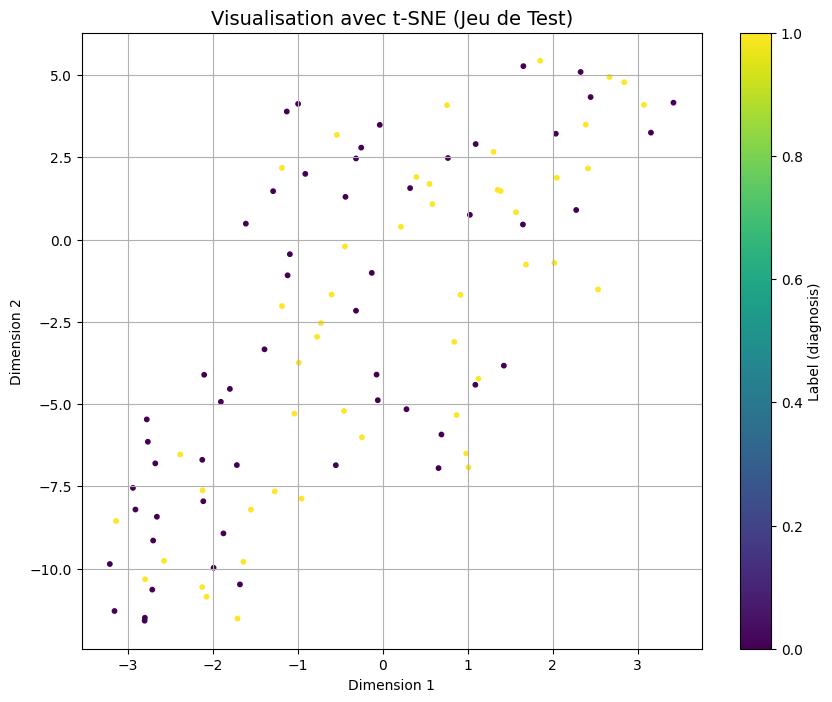

In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Appliquer PCA sur le jeu de test pour réduire la dimensionnalité
X_test_pca = pca.transform(X_test)  # Extraire les données transformées par PCA sur le jeu de test

# Appliquer t-SNE sur les données PCA du jeu de test
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  # Initialiser t-SNE avec 2 dimensions
X_test_tsne = tsne.fit_transform(X_test_pca)  # Réduire encore les dimensions avec t-SNE

# Visualiser les données réduites avec t-SNE (jeu de test)
plt.figure(figsize=(10, 8))  # Définir la taille de la figure
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis', s=10)  # Tracer les points (scatter plot)
plt.colorbar(label='Label (diagnosis)')  # Ajouter une barre de couleurs pour les classes
plt.title('Visualisation avec t-SNE (Jeu de Test)', fontsize=14)  # Ajouter un titre
plt.xlabel('Dimension 1')  # Nommer l'axe des X
plt.ylabel('Dimension 2')  # Nommer l'axe des Y
plt.grid()  # Ajouter une grille
plt.show()  # Afficher la visualisation


### Version 2 : Contrôller mieux le niveau d'overfitting

In [50]:
import optuna
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from optuna.samplers import TPESampler

###############################################################################
# Étape 1 : Prétraitement des données
###############################################################################

print("Colonnes dans df_merged_rois:", df_merged_rois.columns)
columns_merged = ['sex', 'age']
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]
print("Colonnes de df_rois à inclure:", rois_columns)

# Combiner les données pour créer X (features) et y (target)
X = pd.concat(
    [df_merged_rois[columns_merged], df_rois[rois_columns]], axis=1
)
y = df_merged_rois['diagnosis']

# Définir les colonnes numériques et catégoriques
numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

# Préprocesseur pour les colonnes numériques et catégoriques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

###############################################################################
# Étape 2 : Fonction objective pour Optuna
###############################################################################

def objective(trial):
    # Suggérer les hyperparamètres pour PCA
    n_components = trial.suggest_int('n_components', 5, min(50, X.shape[1]))

    # Suggérer les hyperparamètres pour RandomForestClassifier
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Ajouter un paramètre de régularisation supplémentaire : limiter les échantillons
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0)  # Proportion des données à utiliser

    # Construire PCA
    pca = PCA(n_components=n_components, random_state=42)

    # Construire RandomForestClassifier avec "max_samples" pour réduire le surapprentissage
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        max_samples=max_samples,  # Réduction des échantillons par arbre
        random_state=42,
        n_jobs=-1
    )

    # Construire le pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('classifier', rf_classifier)
    ])

    # Validation croisée stratifiée
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []

    # Diviser les données et entraîner le modèle
    for train_index, val_index in stratified_kfold.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        pipeline.fit(X_train, y_train)
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]  # Probabilités pour la classe positive
        roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    return np.mean(roc_auc_scores)

###############################################################################
# Étape 3 : Optimisation avec Optuna
###############################################################################

study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
print("\n### Début de l'optimisation avec Optuna ###")
study.optimize(objective, n_trials=100)

# Meilleurs paramètres trouvés
best_params = study.best_params
best_score = study.best_value

print("\n### Résultats Optuna ###")
print(f"Meilleurs paramètres: {best_params}")
print(f"Meilleur ROC AUC moyen: {best_score:.4f}")

###############################################################################
# Étape 4 : Appliquer les meilleurs paramètres
###############################################################################

pca = PCA(n_components=best_params['n_components'], random_state=42)
rf_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    max_samples=best_params['max_samples'],  # Utiliser max_samples pour limiter l'overfitting
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', rf_classifier)
])

###############################################################################
# Étape 5 : Évaluation avec validation croisée (stratifiée)
###############################################################################

train_roc_auc_scores = []
val_roc_auc_scores = []
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    pipeline.fit(X_train, y_train)

    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    train_roc_auc_scores.append(roc_auc_score(y_train, y_train_pred_proba))
    val_roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc_scores[-1]:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc_scores[-1]:.4f}")

mean_train_roc_auc = np.mean(train_roc_auc_scores)
mean_val_roc_auc = np.mean(val_roc_auc_scores)

print(f"\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

###############################################################################
# Étape 6 : Évaluer sur les données de test
###############################################################################

X_test = pd.concat(
    [test_merged_rois[columns_merged],
     test_rois[rois_columns]], axis=1
)
y_test = test_merged_rois['diagnosis']

pipeline.fit(X, y)
y_test_pred_proba = pipeline.predict_proba(X_test)[:, 1]

roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(
    y_test,
    pipeline.predict(X_test),
    target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

###############################################################################
# Étape 7 : Extraire les features importantes
###############################################################################

importances = pipeline.named_steps['classifier'].feature_importances_
pca_features = [f"PCA_{i+1}" for i in range(best_params['n_components'])]

features_with_importances = pd.DataFrame({
    'Feature': pca_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n### Importances des features ###")
print(features_with_importances)

print(f"\n### Nombre total de features utilisées : {len(features_with_importances)} ###")


[I 2025-01-12 19:41:11,355] A new study created in memory with name: no-name-3e7005be-2d02-4587-9e25-e42423a4f089


Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

[I 2025-01-12 19:41:18,997] Trial 0 finished with value: 0.770773452878716 and parameters: {'n_components': 22, 'n_estimators': 288, 'max_depth': 38, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None, 'max_samples': 0.8005575058716043}. Best is trial 0 with value: 0.770773452878716.
[I 2025-01-12 19:41:21,449] Trial 1 finished with value: 0.7817546014914436 and parameters: {'n_components': 37, 'n_estimators': 55, 'max_depth': 49, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': None, 'max_samples': 0.762378215816119}. Best is trial 1 with value: 0.7817546014914436.
[I 2025-01-12 19:41:27,040] Trial 2 finished with value: 0.7649094429357587 and parameters: {'n_components': 24, 'n_estimators': 123, 'max_depth': 33, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': None, 'max_samples': 0.5998368910791798}. Best is trial 1 with value: 0.7817546014914436.
[I 2025-01-12 19:41:33,285] Trial 3 finished with value: 0.7657354483670273 and parameters: 


### Résultats Optuna ###
Meilleurs paramètres: {'n_components': 40, 'n_estimators': 291, 'max_depth': 34, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.9354519815095058}
Meilleur ROC AUC moyen: 0.8090

### Résultats pour le pli (fold) 1 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.7602

### Résultats pour le pli (fold) 2 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.8469

### Résultats pour le pli (fold) 3 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.8433

### Résultats pour le pli (fold) 4 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.8192

### Résultats pour le pli (fold) 5 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.7754

### Résultats finaux ###
Train ROC AUC moyen: 1.0000
Validation ROC AUC moyen: 0.8090

### Évaluation sur les données de test ###
Test ROC AUC: 0.8269
Rapport de classification sur les données de test:
               precision    recall  f1-score   support

      control       0.72      0.85      0.78        

## HistGradientBoostingClassifier + PCA

In [57]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance

###############################################################################
# Étape 1 : Prétraitement des données
###############################################################################

print("Colonnes dans df_merged_rois:", df_merged_rois.columns)
columns_merged = ['sex', 'age']
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]
print("Colonnes de df_rois à inclure:", rois_columns)

# Combiner les données pour créer X (features) et y (target)
X = pd.concat(
    [df_merged_rois[columns_merged], df_rois[rois_columns]], axis=1
)
y = df_merged_rois['diagnosis']

# Définir les colonnes numériques et catégoriques
numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

# Préprocesseur pour les colonnes numériques et catégoriques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

###############################################################################
# Étape 2 : Fonction objective pour Optuna (avec HistGradientBoostingClassifier)
###############################################################################

def objective(trial):
    # Suggérer les hyperparamètres pour PCA
    n_components = trial.suggest_int('n_components', 5, min(200, X.shape[1]))

    # Suggérer les hyperparamètres pour HistGradientBoostingClassifier
    max_iter = trial.suggest_int('max_iter', 50, 300)  # Nombre maximal d'itérations
    max_depth = trial.suggest_int('max_depth', 3, 30)  # Profondeur maximale des arbres
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)  # Taux d'apprentissage (réduit)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 20, 50)  # Nombre minimal d'échantillons par feuille (augmenté)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 10, 50)  # Nombre maximal de feuilles (réduit)

    # Early stopping
    validation_fraction = trial.suggest_float('validation_fraction', 0.1, 0.3)  # Fraction des données pour validation
    n_iter_no_change = trial.suggest_int('n_iter_no_change', 5, 20)  # Arrêt si pas d'amélioration

    # Construire PCA
    pca = PCA(n_components=n_components, random_state=42)

    # Construire HistGradientBoostingClassifier
    hgb_classifier = HistGradientBoostingClassifier(
        max_iter=max_iter,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_leaf=min_samples_leaf,
        max_leaf_nodes=max_leaf_nodes,
        validation_fraction=validation_fraction,
        n_iter_no_change=n_iter_no_change,
        random_state=42
    )

    # Construire le pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('classifier', hgb_classifier)
    ])

    # Validation croisée stratifiée
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []

    # Diviser les données et entraîner le modèle
    for train_index, val_index in stratified_kfold.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        pipeline.fit(X_train, y_train)
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]  # Probabilités pour la classe positive
        roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    return np.mean(roc_auc_scores)

###############################################################################
# Étape 3 : Optimisation avec Optuna
###############################################################################

study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
print("\n### Début de l'optimisation avec Optuna ###")
study.optimize(objective, n_trials=100)

# Meilleurs paramètres trouvés
best_params = study.best_params
best_score = study.best_value

print("\n### Résultats Optuna ###")
print(f"Meilleurs paramètres: {best_params}")
print(f"Meilleur ROC AUC moyen: {best_score:.4f}")

###############################################################################
# Étape 4 : Appliquer les meilleurs paramètres
###############################################################################

pca = PCA(n_components=best_params['n_components'], random_state=42)
hgb_classifier = HistGradientBoostingClassifier(
    max_iter=best_params['max_iter'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_leaf_nodes=best_params['max_leaf_nodes'],
    validation_fraction=best_params['validation_fraction'],
    n_iter_no_change=best_params['n_iter_no_change'],
    random_state=42
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', hgb_classifier)
])

###############################################################################
# Étape 5 : Évaluation avec validation croisée (stratifiée)
###############################################################################

train_roc_auc_scores = []
val_roc_auc_scores = []
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    pipeline.fit(X_train, y_train)

    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    train_roc_auc_scores.append(roc_auc_score(y_train, y_train_pred_proba))
    val_roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc_scores[-1]:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc_scores[-1]:.4f}")

mean_train_roc_auc = np.mean(train_roc_auc_scores)
mean_val_roc_auc = np.mean(val_roc_auc_scores)

print(f"\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

###############################################################################
# Étape 6 : Évaluer sur les données de test
###############################################################################

X_test = pd.concat(
    [test_merged_rois[columns_merged],
     test_rois[rois_columns]], axis=1
)
y_test = test_merged_rois['diagnosis']

pipeline.fit(X, y)
y_test_pred_proba = pipeline.predict_proba(X_test)[:, 1]

roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(
    y_test,
    pipeline.predict(X_test),
    target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

###############################################################################
# Étape 7 : Extraire les features importantes
###############################################################################

# Calculer l'importance des features après l'entraînement du pipeline
result = permutation_importance(
    pipeline, X, y, n_repeats=10, random_state=42, scoring="roc_auc"
)

# Prendre uniquement les importances correspondant à n_components
importances = result.importances_mean[:best_params['n_components']]
pca_features = [f"PCA_{i+1}" for i in range(best_params['n_components'])]

# Créer un DataFrame pour les importances
features_with_importances = pd.DataFrame({
    'Feature': pca_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Afficher les résultats
print("\n### Importances des features (Permutation Importance) ###")
print(features_with_importances)

print(f"\n### Nombre total de features utilisées : {len(features_with_importances)} ###")

###############################################################################
# Étape 8 : Variance retained
###############################################################################

pca = PCA()
pca.fit(X)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print("% of variance retained:", explained_variance_ratio[:50])


[I 2025-01-12 20:54:56,293] A new study created in memory with name: no-name-662dfb6b-76f4-4e00-a99f-2662c4889116


Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

[I 2025-01-12 20:55:12,473] Trial 0 finished with value: 0.7579427274164116 and parameters: {'n_components': 78, 'max_iter': 288, 'max_depth': 23, 'learning_rate': 0.07661100707771368, 'min_samples_leaf': 24, 'max_leaf_nodes': 16, 'validation_fraction': 0.1116167224336399, 'n_iter_no_change': 18}. Best is trial 0 with value: 0.7579427274164116.
[I 2025-01-12 20:55:21,371] Trial 1 finished with value: 0.7704010230326019 and parameters: {'n_components': 122, 'max_iter': 227, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'min_samples_leaf': 45, 'max_leaf_nodes': 18, 'validation_fraction': 0.1363649934414201, 'n_iter_no_change': 7}. Best is trial 1 with value: 0.7704010230326019.
[I 2025-01-12 20:55:29,900] Trial 2 finished with value: 0.7712116901590587 and parameters: {'n_components': 64, 'max_iter': 181, 'max_depth': 15, 'learning_rate': 0.02692655251486473, 'min_samples_leaf': 38, 'max_leaf_nodes': 15, 'validation_fraction': 0.15842892970704364, 'n_iter_no_change': 10}. Best is 


### Résultats Optuna ###
Meilleurs paramètres: {'n_components': 53, 'max_iter': 273, 'max_depth': 27, 'learning_rate': 0.04895690037271066, 'min_samples_leaf': 44, 'max_leaf_nodes': 23, 'validation_fraction': 0.237491499146887, 'n_iter_no_change': 16}
Meilleur ROC AUC moyen: 0.8108

### Résultats pour le pli (fold) 1 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.7937

### Résultats pour le pli (fold) 2 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.8469

### Résultats pour le pli (fold) 3 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.7955

### Résultats pour le pli (fold) 4 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.7994

### Résultats pour le pli (fold) 5 ###
Train ROC AUC: 1.0000
Validation ROC AUC: 0.8186

### Résultats finaux ###
Train ROC AUC moyen: 1.0000
Validation ROC AUC moyen: 0.8108

### Évaluation sur les données de test ###
Test ROC AUC: 0.7939
Rapport de classification sur les données de test:
               precision    recall  f1-score   support

      contro

## BaggingClassifier & SVM + PCA - Optuna

In [60]:
import optuna
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC  # Importer SVM
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
from optuna.samplers import TPESampler
import pandas as pd
import numpy as np

###############################################################################
# Étape 1 : Prétraitement des données
###############################################################################

print("Colonnes dans df_merged_rois:", df_merged_rois.columns)
columns_merged = ['sex', 'age']
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]
print("Colonnes de df_rois à inclure:", rois_columns)

X = pd.concat(
    [df_merged_rois[columns_merged], df_rois[rois_columns]], axis=1
)
y = df_merged_rois['diagnosis']

numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

###############################################################################
# Étape 2 : Fonction objective pour Optuna
###############################################################################

def objective(trial):
    # Suggérer les hyperparamètres pour PCA
    n_components = trial.suggest_int('n_components', 5, min(50, X.shape[1]))  # Max components = min(50, n_features)

    # Suggérer les hyperparamètres pour SVM
    C = trial.suggest_loguniform('C', 0.01, 10.0)  # Regularization parameter pour SVM
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])  # Choisir entre les kernels SVM

    # Suggérer les hyperparamètres pour BaggingClassifier
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0)

    # Construire PCA
    pca = PCA(n_components=n_components, random_state=42)

    # Construire SVM
    svm_classifier = SVC(
        C=C,
        kernel=kernel,
        probability=True,  # Activer les probabilités pour ROC AUC
        random_state=42
    )

    # Construire BaggingClassifier pour SVM
    bagging_classifier = BaggingClassifier(
        estimator=svm_classifier,
        n_estimators=n_estimators,
        max_samples=max_samples,
        random_state=42,
        n_jobs=-1
    )

    # Construire le pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('classifier', bagging_classifier)
    ])

    # Validation croisée
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []

    for train_index, val_index in stratified_kfold.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        pipeline.fit(X_train, y_train)
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]
        roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    return np.mean(roc_auc_scores)

###############################################################################
# Étape 3 : Optimisation avec Optuna
###############################################################################

study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
print("\n### Début de l'optimisation avec Optuna ###")
study.optimize(objective, n_trials=100)

# Meilleurs paramètres trouvés
best_params = study.best_params
best_score = study.best_value

print("\n### Résultats Optuna ###")
print(f"Meilleurs paramètres: {best_params}")
print(f"Meilleur ROC AUC moyen: {best_score:.4f}")

###############################################################################
# Étape 4 : Appliquer les meilleurs paramètres
###############################################################################

pca = PCA(n_components=best_params['n_components'], random_state=42)
svm_classifier = SVC(
    C=best_params['C'],
    kernel=best_params['kernel'],
    probability=True,
    random_state=42
)
bagging_classifier = BaggingClassifier(
    estimator=svm_classifier,
    n_estimators=best_params['n_estimators'],
    max_samples=best_params['max_samples'],
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', bagging_classifier)
])

###############################################################################
# Étape 5 : Évaluation avec validation croisée (stratifiée)
###############################################################################

train_roc_auc_scores = []
val_roc_auc_scores = []
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    pipeline.fit(X_train, y_train)

    y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
    y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    train_roc_auc_scores.append(roc_auc_score(y_train, y_train_pred_proba))
    val_roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    print(f"\n### Résultats pour le pli (fold) {fold} ###")
    print(f"Train ROC AUC: {train_roc_auc_scores[-1]:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc_scores[-1]:.4f}")

mean_train_roc_auc = np.mean(train_roc_auc_scores)
mean_val_roc_auc = np.mean(val_roc_auc_scores)

print(f"\n### Résultats finaux ###")
print(f"Train ROC AUC moyen: {mean_train_roc_auc:.4f}")
print(f"Validation ROC AUC moyen: {mean_val_roc_auc:.4f}")

###############################################################################
# Étape 6 : Évaluer sur les données de test
###############################################################################

X_test = pd.concat(
    [test_merged_rois[columns_merged],
     test_rois[rois_columns]], axis=1
)
y_test = test_merged_rois['diagnosis']

pipeline.fit(X, y)
y_test_pred_proba = pipeline.predict_proba(X_test)[:, 1]

roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(
    y_test,
    pipeline.predict(X_test),
    target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

###############################################################################
# Étape 7 : Afficher la liste des composantes PCA et leurs coefficients
###############################################################################

# Entraîner le pipeline complet
pipeline.fit(X, y)

# Extraire les composantes PCA
n_components = pipeline.named_steps['pca'].n_components_
pca_features = [f"PCA_{i+1}" for i in range(n_components)]

print("\n### Liste des composantes PCA utilisées ###")
print(pca_features)
print(f"Nombre total de composantes PCA utilisées : {len(pca_features)}")

###############################################################################
# Étape 8 : Variance retained
###############################################################################

pca = PCA()
pca.fit(X)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print("% of variance retained:", explained_variance_ratio[:50])

[I 2025-01-12 21:20:39,911] A new study created in memory with name: no-name-80e9f185-fc50-4255-bd56-596cec9a6040


Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

[I 2025-01-12 21:23:07,143] Trial 0 finished with value: 0.8021750219118641 and parameters: {'n_components': 22, 'C': 7.114476009343421, 'kernel': 'linear', 'n_estimators': 24, 'max_samples': 0.5779972601681014}. Best is trial 0 with value: 0.8021750219118641.
[I 2025-01-12 21:23:08,419] Trial 1 finished with value: 0.768511789301263 and parameters: {'n_components': 7, 'C': 3.9676050770529883, 'kernel': 'rbf', 'n_estimators': 11, 'max_samples': 0.9849549260809971}. Best is trial 0 with value: 0.8021750219118641.
[I 2025-01-12 21:23:11,536] Trial 2 finished with value: 0.7663515668778826 and parameters: {'n_components': 43, 'C': 0.04335281794951567, 'kernel': 'rbf', 'n_estimators': 37, 'max_samples': 0.762378215816119}. Best is trial 0 with value: 0.8021750219118641.
[I 2025-01-12 21:23:19,873] Trial 3 finished with value: 0.8074346595399227 and parameters: {'n_components': 24, 'C': 0.07476312062252301, 'kernel': 'linear', 'n_estimators': 36, 'max_samples': 0.6831809216468459}. Best is 


### Résultats Optuna ###
Meilleurs paramètres: {'n_components': 49, 'C': 0.6334469920721107, 'kernel': 'linear', 'n_estimators': 29, 'max_samples': 0.5458892862765687}
Meilleur ROC AUC moyen: 0.8310

### Résultats pour le pli (fold) 1 ###
Train ROC AUC: 0.9181
Validation ROC AUC: 0.7751

### Résultats pour le pli (fold) 2 ###
Train ROC AUC: 0.8859
Validation ROC AUC: 0.8834

### Résultats pour le pli (fold) 3 ###
Train ROC AUC: 0.8889
Validation ROC AUC: 0.8804

### Résultats pour le pli (fold) 4 ###
Train ROC AUC: 0.9167
Validation ROC AUC: 0.7477

### Résultats pour le pli (fold) 5 ###
Train ROC AUC: 0.8979
Validation ROC AUC: 0.8685

### Résultats finaux ###
Train ROC AUC moyen: 0.9015
Validation ROC AUC moyen: 0.8310

### Évaluation sur les données de test ###
Test ROC AUC: 0.8072
Rapport de classification sur les données de test:
               precision    recall  f1-score   support

      control       0.69      0.87      0.77        55
schizophrenia       0.79      0.54      0

## Stacking

In [23]:
import numpy as np
import pandas as pd
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report

###############################################################################
# Étape 1 : Prétraitement des données
###############################################################################

print("Colonnes dans df_merged_rois:", df_merged_rois.columns)
columns_merged = ['sex', 'age']
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]
print("Colonnes de df_rois à inclure:", rois_columns)

X = pd.concat(
    [df_merged_rois[columns_merged], df_rois[rois_columns]], axis=1
)
y = df_merged_rois['diagnosis']

numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

###############################################################################
# Étape 2 : Préparation des preprocessors
###############################################################################

# Preprocessor pour LogisticRegression (avec PCA)
logreg_preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50, random_state=42))
])

# Preprocessor pour BaggingClassifier (pas de PCA)
bagging_preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessor pour RandomForestClassifier
rf_preprocessor = 'passthrough'

# Preprocessor pour HistGradientBoostingClassifier
hgb_preprocessor = 'passthrough'

# Preprocessor pour MLPClassifier
mlp_preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

###############################################################################
# Étape 3 : Définir les modèles de base (base models)
###############################################################################

base_models = [
    ('logreg', Pipeline(steps=[
        ('preprocessor', logreg_preprocessor),
        ('classifier', LogisticRegression(
            penalty='elasticnet', solver='saga', max_iter=1000,
            random_state=42, class_weight='balanced', C=0.1, l1_ratio=0.5))
    ])),
    ('bagging', Pipeline(steps=[
        ('preprocessor', bagging_preprocessor),
        ('classifier', BaggingClassifier(
            estimator=LogisticRegression(max_iter=1000, random_state=42),
            n_estimators=25, max_samples=0.8, random_state=42, n_jobs=-1))
    ])),
    ('rf', Pipeline(steps=[
        ('preprocessor', rf_preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=200, max_depth=20, random_state=42, n_jobs=-1))
    ])),
    ('hgb', Pipeline(steps=[
        ('preprocessor', hgb_preprocessor),
        ('classifier', HistGradientBoostingClassifier(
            max_iter=200, max_depth=10, learning_rate=0.1,
            min_samples_leaf=20, random_state=42))
    ])),
    ('mlp', Pipeline(steps=[
        ('preprocessor', mlp_preprocessor),
        ('classifier', MLPClassifier(
            hidden_layer_sizes=(128, 64), alpha=0.001,
            max_iter=500, random_state=42))
    ]))
]

###############################################################################
# Étape 4 : Cross-validation avec StratifiedKFold (k=5)
###############################################################################

def stacking_model(base_models, meta_model, X, y, cv_splits=5):
    """
    Entraîner un modèle de stacking avec des prédictions out-of-fold et observer les résultats train/val.
    """
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    oof_predictions = np.zeros((X.shape[0], len(base_models)))  # Pour stocker les prédictions OOF
    train_meta_scores = []  # Scores ROC AUC sur le train pour chaque fold
    val_meta_scores = []    # Scores ROC AUC sur la validation pour chaque fold

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\n### Fold {fold}/{cv_splits} ###")

        # Diviser les données
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        fold_predictions = np.zeros((X_val.shape[0], len(base_models)))
        train_fold_predictions = np.zeros((X_train.shape[0], len(base_models)))

        # Générer les prédictions OOF pour chaque base model
        for i, (name, model) in enumerate(base_models):
            print(f"Training base model: {name}")
            cloned_model = clone(model)
            cloned_model.fit(X_train, y_train)

            # Prédictions sur val et train pour ce modèle
            val_pred = cloned_model.predict_proba(X_val)[:, 1]
            train_pred = cloned_model.predict_proba(X_train)[:, 1]
            fold_predictions[:, i] = val_pred
            train_fold_predictions[:, i] = train_pred

        # Entraîner le meta-model sur les prédictions des base models
        meta_model.fit(train_fold_predictions, y_train)

        # Prédictions du meta-model sur train et val
        train_meta_pred = meta_model.predict_proba(train_fold_predictions)[:, 1]
        val_meta_pred = meta_model.predict_proba(fold_predictions)[:, 1]

        # Évaluer le meta-model sur train et val pour le fold courant
        train_roc_auc = roc_auc_score(y_train, train_meta_pred)
        val_roc_auc = roc_auc_score(y_val, val_meta_pred)
        train_meta_scores.append(train_roc_auc)
        val_meta_scores.append(val_roc_auc)

        print(f"Meta-model Train ROC AUC (fold {fold}): {train_roc_auc:.4f}")
        print(f"Meta-model Validation ROC AUC (fold {fold}): {val_roc_auc:.4f}")

    print(f"\n### Résultats finaux de la validation croisée ###")
    print(f"Train ROC AUC moyen: {np.mean(train_meta_scores):.4f} ± {np.std(train_meta_scores):.4f}")
    print(f"Validation ROC AUC moyen: {np.mean(val_meta_scores):.4f} ± {np.std(val_meta_scores):.4f}")
    return meta_model

# Définir le meta-model (Logistic Regression pour stacking)
meta_model = LogisticRegression(
    penalty='elasticnet', solver='saga', max_iter=1000,
    random_state=42, class_weight='balanced', C=0.1, l1_ratio=0.5
)

# Entraîner le modèle stacking avec validation croisée
meta_model = stacking_model(base_models, meta_model, X, y)

###############################################################################
# Étape 5 : Évaluation sur les données de test
###############################################################################

# Générer les prédictions pour les données de test
X_test = pd.concat(
    [test_merged_rois[columns_merged],
     test_rois[rois_columns]],
    axis=1
)
y_test = test_merged_rois['diagnosis']

# Prédictions des modèles de base pour le test set
test_predictions = np.zeros((X_test.shape[0], len(base_models)))

for i, (name, model) in enumerate(base_models):
    print(f"Predicting with base model: {name}")
    model.fit(X, y)  # Réentraîner chaque modèle de base sur tout le training set
    test_predictions[:, i] = model.predict_proba(X_test)[:, 1]

# Prédictions finales avec le meta-model
final_predictions = meta_model.predict_proba(test_predictions)[:, 1]

# Évaluation
roc_auc_test = roc_auc_score(y_test, final_predictions)
classification_report_test = classification_report(
    y_test, (final_predictions > 0.5).astype(int), target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

In [25]:
import numpy as np
import pandas as pd
import optuna
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report
from optuna.samplers import TPESampler

###############################################################################
# Étape 1 : Prétraitement des données
###############################################################################

print("Colonnes dans df_merged_rois:", df_merged_rois.columns)
columns_merged = ['sex', 'age']
rois_columns = [col for col in df_rois.columns if col not in ['participant_id', 'run', 'session']]
print("Colonnes de df_rois à inclure:", rois_columns)

X = pd.concat(
    [df_merged_rois[columns_merged], df_rois[rois_columns]], axis=1
)
y = df_merged_rois['diagnosis']

numerical_features = ['sex', 'age'] + rois_columns
categorical_features = []

###############################################################################
# Étape 2 : Préparation des preprocessors
###############################################################################

# Preprocessor pour LogisticRegression (avec PCA + SelectKBest)
logreg_preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50, random_state=42)),
    ('selectkbest', SelectKBest(f_classif, k=30))  # Sélectionner 30 features importantes
])

# Preprocessor pour BaggingClassifier
bagging_preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessor pour RandomForestClassifier
rf_preprocessor = Pipeline(steps=[
    ('selectkbest', SelectKBest(f_classif, k=50))  # Choisir 50 features
])

# Preprocessor pour HistGradientBoostingClassifier
hgb_preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessor pour MLPClassifier
mlp_preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100, random_state=42))  # Réduction à 100 dimensions
])

###############################################################################
# Étape 3 : Définir les modèles de base (base models)
###############################################################################

base_models = [
    ('logreg', Pipeline(steps=[
        ('preprocessor', logreg_preprocessor),
        ('classifier', LogisticRegression(
            penalty='elasticnet', solver='saga', max_iter=1000,
            random_state=42, class_weight='balanced', C=0.1, l1_ratio=0.5))
    ])),
    ('bagging', Pipeline(steps=[
        ('preprocessor', bagging_preprocessor),
        ('classifier', BaggingClassifier(
            estimator=LogisticRegression(max_iter=1000, random_state=42),
            n_estimators=20, max_samples=0.8, random_state=42, n_jobs=-1))
    ])),
    ('rf', Pipeline(steps=[
        ('preprocessor', rf_preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=200, max_depth=15, random_state=42, n_jobs=-1))
    ])),
    ('hgb', Pipeline(steps=[
        ('preprocessor', hgb_preprocessor),
        ('classifier', HistGradientBoostingClassifier(
            max_iter=200, max_depth=10, learning_rate=0.05,
            min_samples_leaf=20, random_state=42))
    ])),
    ('mlp', Pipeline(steps=[
        ('preprocessor', mlp_preprocessor),
        ('classifier', MLPClassifier(
            hidden_layer_sizes=(128, 64, 32), alpha=0.001,
            max_iter=300, random_state=42))
    ]))
]

###############################################################################
# Étape 4 : Optimisation des hyperparamètres pour le meta-model
###############################################################################

def objective(trial):
    """
    Fonction objective pour Optuna afin d'optimiser les hyperparamètres
    du meta-model (Logistic Regression ElasticNet).
    """
    # Définir les hyperparamètres à optimiser
    C = trial.suggest_loguniform('C', 0.01, 1)
    l1_ratio = trial.suggest_float('l1_ratio', 0.1, 0.9)

    # Définir le meta-model
    meta_model = LogisticRegression(
        penalty='elasticnet', solver='saga', max_iter=1000,
        random_state=42, class_weight='balanced', C=C, l1_ratio=l1_ratio
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    meta_model_scores = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        fold_predictions = np.zeros((X_val.shape[0], len(base_models)))
        for i, (name, model) in enumerate(base_models):
            model.fit(X_train, y_train)
            fold_predictions[:, i] = model.predict_proba(X_val)[:, 1]

        meta_model.fit(fold_predictions, y_val)
        meta_predictions = meta_model.predict_proba(fold_predictions)[:, 1]
        meta_model_scores.append(roc_auc_score(y_val, meta_predictions))

    return np.mean(meta_model_scores)

# Optimisation avec Optuna
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Meilleurs hyperparamètres
best_params = study.best_params
print(f"Meilleurs paramètres pour le meta-model: {best_params}")

# Définir le meta-model optimisé
meta_model = LogisticRegression(
    penalty='elasticnet', solver='saga', max_iter=1000,
    random_state=42, class_weight='balanced', C=best_params['C'], l1_ratio=best_params['l1_ratio']
)

###############################################################################
# Étape 5 : Validation croisée pour observer Train/Val ROC AUC
###############################################################################

def stacking_model(base_models, meta_model, X, y, cv_splits=5):
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    train_meta_scores, val_meta_scores = [], []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        fold_predictions = np.zeros((X_val.shape[0], len(base_models)))
        train_predictions = np.zeros((X_train.shape[0], len(base_models)))

        for i, (name, model) in enumerate(base_models):
            model.fit(X_train, y_train)
            fold_predictions[:, i] = model.predict_proba(X_val)[:, 1]
            train_predictions[:, i] = model.predict_proba(X_train)[:, 1]

        meta_model.fit(train_predictions, y_train)
        train_meta_scores.append(roc_auc_score(y_train, meta_model.predict_proba(train_predictions)[:, 1]))
        val_meta_scores.append(roc_auc_score(y_val, meta_model.predict_proba(fold_predictions)[:, 1]))

    print(f"\nTrain ROC AUC moyen: {np.mean(train_meta_scores):.4f} ± {np.std(train_meta_scores):.4f}")
    print(f"Validation ROC AUC moyen: {np.mean(val_meta_scores):.4f} ± {np.std(val_meta_scores):.4f}")
    return meta_model

meta_model = stacking_model(base_models, meta_model, X, y)

###############################################################################
# Étape 6 : Évaluation sur les données de test
###############################################################################

X_test = pd.concat(
    [test_merged_rois[columns_merged], test_rois[rois_columns]], axis=1
)
y_test = test_merged_rois['diagnosis']

test_predictions = np.zeros((X_test.shape[0], len(base_models)))
for i, (name, model) in enumerate(base_models):
    model.fit(X, y)
    test_predictions[:, i] = model.predict_proba(X_test)[:, 1]

final_predictions = meta_model.predict_proba(test_predictions)[:, 1]

roc_auc_test = roc_auc_score(y_test, final_predictions)
classification_report_test = classification_report(
    y_test, (final_predictions > 0.5).astype(int), target_names=['control', 'schizophrenia']
)

print("\n### Évaluation sur les données de test ###")
print(f"Test ROC AUC: {roc_auc_test:.4f}")
print("Rapport de classification sur les données de test:")
print(classification_report_test)

[I 2025-01-13 00:02:11,966] A new study created in memory with name: no-name-8a951407-6d36-4bb3-81cb-716f1b5407a5


Colonnes dans df_merged_rois: Index(['participant_id', 'sex', 'age', 'diagnosis', 'study', 'site', 'session',
       'run', 'TIV', 'CSF_Vol',
       ...
       'lSupParLo_CSF_Vol', 'rSupParLo_CSF_Vol', 'lSupTemGy_CSF_Vol',
       'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol', 'rTemPo_CSF_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=296)
Colonnes de df_rois à inclure: ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol', 'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'rBst_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol', 'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCSF_GM_Vol', 'rCSF_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol', 'lPal_GM_Vol', 'rPal_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol', 'lThaPro_G

[I 2025-01-13 00:02:32,262] Trial 0 finished with value: 0.5 and parameters: {'C': 0.05611516415334506, 'l1_ratio': 0.8605714451279329}. Best is trial 0 with value: 0.5.
[I 2025-01-13 00:02:44,579] Trial 1 finished with value: 0.8305464315990632 and parameters: {'C': 0.29106359131330695, 'l1_ratio': 0.5789267873576293}. Best is trial 1 with value: 0.8305464315990632.
[I 2025-01-13 00:02:55,453] Trial 2 finished with value: 0.5 and parameters: {'C': 0.020513382630874502, 'l1_ratio': 0.22479561626896213}. Best is trial 1 with value: 0.8305464315990632.
[I 2025-01-13 00:03:06,349] Trial 3 finished with value: 0.5 and parameters: {'C': 0.01306673923805328, 'l1_ratio': 0.7929409166199481}. Best is trial 1 with value: 0.8305464315990632.
[I 2025-01-13 00:03:16,840] Trial 4 finished with value: 0.8268413149992098 and parameters: {'C': 0.15930522616241014, 'l1_ratio': 0.6664580622368363}. Best is trial 1 with value: 0.8305464315990632.
[I 2025-01-13 00:03:27,170] Trial 5 finished with value: 0

Meilleurs paramètres pour le meta-model: {'C': 0.9639605923955762, 'l1_ratio': 0.5939182045296315}

Train ROC AUC moyen: 1.0000 ± 0.0000
Validation ROC AUC moyen: 0.8133 ± 0.0479

### Évaluation sur les données de test ###
Test ROC AUC: 0.8644
Rapport de classification sur les données de test:
               precision    recall  f1-score   support

      control       0.74      0.84      0.79        55
schizophrenia       0.78      0.67      0.72        48

     accuracy                           0.76       103
    macro avg       0.76      0.75      0.75       103
 weighted avg       0.76      0.76      0.75       103



# Etape 6 : 3 dfs

In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.impute import SimpleImputer

###############################################################################
# Étape 1 : Charger et hiển thị dữ liệu VBM
###############################################################################

# Charger le fichier VBM
file_path = '/content/drive/My Drive/Colab Notebooks/Data/train_vbm.npz'
df_vbm = np.load(file_path, allow_pickle=True)

# Extraire les composants
imgs_arr = df_vbm['imgs_arr']  # Dữ liệu 3D voxel (121, 145, 121) cho mỗi participant
mask_arr = df_vbm['mask_arr']  # Mặt nạ 3D
participant_id = df_vbm['participant_id']  # Participant ID

# Afficher les informations
print(f"Dimensions des données voxel: {imgs_arr.shape}")
print(f"Dimensions de la mask: {mask_arr.shape}")
print(f"Nombre de participants: {participant_id.shape}")

###############################################################################
# Étape 2 : Chuyển đổi voxel 3D sang định dạng 2D và áp dụng mask
###############################################################################

# Appliquer le mask pour ne garder que les voxels pertinents

# Loại bỏ chiều không cần thiết (1)
imgs_arr = np.squeeze(imgs_arr)  # Sau khi squeeze, imgs_arr có shape (410, 121, 145, 121)

# Áp dụng mask: chỉ giữ lại các voxel được đánh dấu trong mask_arr
masked_voxels = imgs_arr[:, mask_arr == 1]  # Áp dụng mask, giữ lại các voxel quan trọng

# Hiển thị shape sau khi áp dụng mask
print(f"Dimensions des données après application du mask: {masked_voxels.shape}")

# Convertir les données voxel en DataFrame
df_voxel = pd.DataFrame(
    masked_voxels,
    columns=[f'voxel_{i}' for i in range(masked_voxels.shape[1])]
)

# Ajouter participant_id pour la jointure
df_voxel['participant_id'] = participant_id

###############################################################################
# Étape 3 : Kết hợp với df_merged_rois
###############################################################################

# Jointure des données voxel avec df_merged_rois
df_merged_voxel = pd.merge(
    df_merged_rois,
    df_voxel,
    on='participant_id',
    how='inner'
)

# Vérifier les dimensions finales
print(f"Dimensions finales après la fusion: {df_merged_voxel.shape}")

###############################################################################
# Étape 4 : Préparation des données pour le training
###############################################################################

# Définir les colonnes exactes
X = df_merged_voxel.drop(columns=['diagnosis', 'participant_id'])  # Features (loại bỏ ID và target)
y = df_merged_voxel['diagnosis']  # Target

# Définir les colonnes numériques et catégoriques
numerical_features = [col for col in X.columns if 'voxel_' in col or col in ['sex', 'age']]
categorical_features = []

# Préprocesseur pour les colonnes numériques et catégoriques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

###############################################################################
# Étape 5 : Construire et optimiser le modèle
###############################################################################

def objective(trial):
    # Suggérer les hyperparamètres pour PCA
    n_components = trial.suggest_int('n_components', 5, min(150, X.shape[1]))

    # Suggérer les hyperparamètres pour LogisticRegression (ElasticNet)
    C = trial.suggest_loguniform('C', 0.01, 1)
    l1_ratio = trial.suggest_float('l1_ratio', 0.1, 1.0)

    # Suggérer les hyperparamètres pour BaggingClassifier
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0)

    # Construire PCA et LogisticRegression
    pca = PCA(n_components=n_components, random_state=42)
    logreg_classifier = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        max_iter=1000,
        class_weight='balanced',
        random_state=42,
        C=C,
        l1_ratio=l1_ratio
    )

    # Construire BaggingClassifier
    bagging_classifier = BaggingClassifier(
        estimator=logreg_classifier,
        n_estimators=n_estimators,
        max_samples=max_samples,
        random_state=42,
        n_jobs=-1
    )

    # Construire le pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('classifier', bagging_classifier)
    ])

    # Validation croisée
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []

    for train_index, val_index in stratified_kfold.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        pipeline.fit(X_train, y_train)
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]
        roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    return np.mean(roc_auc_scores)

###############################################################################
# Étape 6 : Optimisation avec Optuna
###############################################################################

import optuna
from optuna.samplers import TPESampler

study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_score = study.best_value

print("\n### Résultats Optuna ###")
print(f"Meilleurs paramètres: {best_params}")
print(f"Meilleur ROC AUC moyen: {best_score:.4f}")

###############################################################################
# Étape 7 : Appliquer les meilleurs paramètres
###############################################################################

pca = PCA(n_components=best_params['n_components'], random_state=42)
logreg_classifier = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    C=best_params['C'],
    l1_ratio=best_params['l1_ratio']
)
bagging_classifier = BaggingClassifier(
    estimator=logreg_classifier,
    n_estimators=best_params['n_estimators'],
    max_samples=best_params['max_samples'],
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', bagging_classifier)
])

###############################################################################
# Étape 8 : Évaluation sur les données de test
###############################################################################


Dimensions des données voxel: (410, 1, 121, 145, 121)
Dimensions de la mask: (121, 145, 121)
Nombre de participants: (410,)
Dimensions des données après application du mask: (410, 331695)
Dimensions finales après la fusion: (410, 331991)


[I 2025-01-12 22:00:30,699] A new study created in memory with name: no-name-fa642ae4-96ad-4a2e-8d08-4a792bb5e3be
[I 2025-01-12 22:01:55,665] Trial 0 finished with value: 0.7893000416684627 and parameters: {'n_components': 59, 'C': 0.7969454818643931, 'l1_ratio': 0.7587945476302645, 'n_estimators': 64, 'max_samples': 0.5780093202212182}. Best is trial 0 with value: 0.7893000416684627.
[I 2025-01-12 22:02:55,542] Trial 1 finished with value: 0.7889085018032387 and parameters: {'n_components': 27, 'C': 0.01306673923805328, 'l1_ratio': 0.8795585311974417, 'n_estimators': 64, 'max_samples': 0.8540362888980227}. Best is trial 0 with value: 0.7893000416684627.
[I 2025-01-12 22:03:41,466] Trial 2 finished with value: 0.7365316752158857 and parameters: {'n_components': 8, 'C': 0.8706020878304853, 'l1_ratio': 0.8491983767203796, 'n_estimators': 29, 'max_samples': 0.5909124836035503}. Best is trial 0 with value: 0.7893000416684627.
[I 2025-01-12 22:04:41,068] Trial 3 finished with value: 0.79274

KeyboardInterrupt: 

In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
import optuna
from optuna.samplers import TPESampler

###############################################################################
# Étape 1 : Charger et afficher les données VBM
###############################################################################

# Charger le fichier VBM contenant les données voxel
file_path = '/content/drive/My Drive/Colab Notebooks/Data/train_vbm.npz'
df_vbm = np.load(file_path, allow_pickle=True)

# Extraire les composants principaux
imgs_arr = df_vbm['imgs_arr']  # Données 3D voxel (121, 145, 121) pour chaque participant
mask_arr = df_vbm['mask_arr']  # Masque 3D
participant_id = df_vbm['participant_id']  # Identifiant des participants

# Afficher les informations de base
print(f"Dimensions des données voxel: {imgs_arr.shape}")
print(f"Dimensions du masque: {mask_arr.shape}")
print(f"Nombre de participants: {participant_id.shape}")

###############################################################################
# Étape 2 : Conversion des voxels 3D en format 2D et application du masque
###############################################################################

# Supprimer les dimensions inutiles pour simplifier la manipulation des données
imgs_arr = np.squeeze(imgs_arr)  # Après squeeze, imgs_arr devient (410, 121, 145, 121)

# Appliquer le masque pour ne conserver que les voxels pertinents
masked_voxels = imgs_arr[:, mask_arr == 1]  # Conserve uniquement les voxels marqués dans mask_arr

# Afficher les dimensions après l'application du masque
print(f"Dimensions des données après application du masque: {masked_voxels.shape}")

# Convertir les données voxel masquées en DataFrame
df_voxel = pd.DataFrame(
    masked_voxels,
    columns=[f'voxel_{i}' for i in range(masked_voxels.shape[1])]
)

# Ajouter les identifiants des participants pour permettre une jointure ultérieure
df_voxel['participant_id'] = participant_id

###############################################################################
# Étape 3 : Fusionner avec df_merged_rois
###############################################################################

# Effectuer une jointure des données voxel avec df_merged_rois en utilisant participant_id
df_merged_voxel = pd.merge(
    df_merged_rois,
    df_voxel,
    on='participant_id',
    how='inner'
)

# Vérifier les dimensions des données fusionnées
print(f"Dimensions finales après la fusion: {df_merged_voxel.shape}")

###############################################################################
# Étape 4 : Préparation des données pour l'entraînement
###############################################################################

# Définir les colonnes à utiliser comme features et comme target
X = df_merged_voxel.drop(columns=['diagnosis', 'participant_id'])  # Features (suppression de ID et target)
y = df_merged_voxel['diagnosis']  # Target (variable à prédire)

# Séparer les colonnes numériques et catégoriques
numerical_features = [col for col in X.columns if 'voxel_' in col or col in ['sex', 'age']]
categorical_features = []

# Construire un préprocesseur pour standardiser les données numériques et encoder les données catégoriques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ])

###############################################################################
# Étape 5 : Construire et optimiser le modèle avec Optuna
###############################################################################

def objective(trial):
    """
    Fonction objective pour Optuna : Cherche à maximiser le score ROC AUC en optimisant les hyperparamètres.
    """
    # Suggérer le nombre de composantes pour PCA
    n_components = trial.suggest_int('n_components', 5, min(150, X.shape[1]))

    # Suggérer les hyperparamètres pour MLPClassifier
    hidden_layer_sizes = tuple(
        trial.suggest_int(f"layer_{i}_units", 50, 300) for i in range(trial.suggest_int("n_layers", 1, 5))
    )
    learning_rate_init = trial.suggest_loguniform('learning_rate_init', 0.0001, 0.1)
    alpha = trial.suggest_loguniform('alpha', 1e-6, 1e-2)

    # Construire PCA
    pca = PCA(n_components=n_components, random_state=42)

    # Construire MLPClassifier avec les paramètres suggérés
    mlp_classifier = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        max_iter=200,
        random_state=42,
        learning_rate_init=learning_rate_init,
        alpha=alpha
    )

    # Construire le pipeline contenant le préprocesseur, PCA et le classificateur
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('classifier', mlp_classifier)
    ])

    # Validation croisée stratifiée
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = []

    # Effectuer la validation croisée
    for train_index, val_index in stratified_kfold.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Entraîner le pipeline
        pipeline.fit(X_train, y_train)

        # Prédire les probabilités sur l'ensemble de validation
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]
        roc_auc_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    # Retourner le score moyen ROC AUC
    return np.mean(roc_auc_scores)

###############################################################################
# Étape 6 : Optimisation avec Optuna
###############################################################################

# Initialiser Optuna et lancer l'optimisation
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=100)

# Afficher les meilleurs paramètres et le meilleur score
best_params = study.best_params
best_score = study.best_value

print("\n### Résultats Optuna ###")
print(f"Meilleurs paramètres: {best_params}")
print(f"Meilleur ROC AUC moyen: {best_score:.4f}")

###############################################################################
# Étape 7 : Appliquer les meilleurs paramètres
###############################################################################

# Construire le pipeline final avec les meilleurs paramètres
pca = PCA(n_components=best_params['n_components'], random_state=42)
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=tuple(
        best_params[f"layer_{i}_units"] for i in range(best_params["n_layers"])
    ),
    max_iter=200,
    random_state=42,
    learning_rate_init=best_params['learning_rate_init'],
    alpha=best_params['alpha']
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', mlp_classifier)
])

###############################################################################
# Étape 8 : Évaluation sur les données de test
###############################################################################



Dimensions des données voxel: (410, 1, 121, 145, 121)
Dimensions du masque: (121, 145, 121)
Nombre de participants: (410,)
Dimensions des données après application du masque: (410, 331695)
Dimensions finales après la fusion: (410, 331991)


[I 2025-01-12 23:16:41,520] A new study created in memory with name: no-name-6d5dc25a-521a-469b-bc37-aa4600d0e2db
[I 2025-01-12 23:17:50,636] Trial 0 finished with value: 0.6267466988519621 and parameters: {'n_components': 59, 'n_layers': 5, 'layer_0_units': 233, 'layer_1_units': 200, 'layer_2_units': 89, 'layer_3_units': 89, 'layer_4_units': 64, 'learning_rate_init': 0.0396760507705299, 'alpha': 0.00025378155082656634}. Best is trial 0 with value: 0.6267466988519621.
[I 2025-01-12 23:19:07,565] Trial 1 finished with value: 0.7612914708967341 and parameters: {'n_components': 108, 'n_layers': 1, 'layer_0_units': 293, 'learning_rate_init': 0.03142880890840111, 'alpha': 7.068974950624607e-06}. Best is trial 1 with value: 0.7612914708967341.
[I 2025-01-12 23:20:05,447] Trial 2 finished with value: 0.7278247625616047 and parameters: {'n_components': 31, 'n_layers': 1, 'layer_0_units': 126, 'learning_rate_init': 0.0037520558551242854, 'alpha': 5.34293726127978e-05}. Best is trial 1 with valu

KeyboardInterrupt: 